In [ ]:
!pip install import_ipynb 

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=fafcb407338fcc87a5a1fb181a0d50ff9e3aef5388569bab36061d5914397954
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
import import_ipynb

import agriculture_modified

# 구 별 경락가 채소품목 나누기


In [ ]:
import pandas as pd
import numpy as np
import glob
import sys
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
서울전역시장마트데이터=pd.read_excel('C:/Users/Think/Downloads/최종/서울전역시장마트데이터(월평균값결측치대체for 그래프).xlsx')
서울전역시장마트데이터['지역구'].unique()

array(['강남구', '강동구', '광진구', '마포구', '성동구', '송파구', '용산구', '중구', '강서구',
       '관악구', '구로구', '금천구', '동작구', '서초구', '양천구', '영등포구', '동대문구', '중랑구',
       '성북구', '종로구', '서대문구', '은평구', '강북구', '도봉구', '노원구'], dtype=object)

In [ ]:
def For_product(data1, data2, data3, district, product) :
    cols = ['단위', '비고', '지역구', '장소','구분']
    name = ['시장', '마트', '서울']
  
    test_i = data1[data1['품목']==product]
    test_a = test_i.drop(cols, axis=1)
#     test_a = test_a.groupby('조사일')['가격'].mean().reset_index()
    test_a = test_a.set_index('조사일')
    y_test = test_a['가격'].resample('MS').mean()
    y_test = y_test['2017' : ]
    y = pd.DataFrame(y_test)

    test_0_i = data2[data2['품목']==product]
    test_0_a = test_0_i.drop(cols, axis=1)
#     test_0_a = test_0_a.groupby('조사일')['가격'].mean().reset_index()
    test_0_a = test_0_a.set_index('조사일')
    x_test = test_0_a['가격'].resample('MS').mean()
    x_test=x_test['2017' :]
    x = pd.DataFrame(x_test)
    
    seoul = data3[data3['품목']==product]
    seoul = seoul.drop(cols, axis=1)
#     seoul = seoul.groupby('조사일')['가격'].mean().reset_index()
    seoul = seoul.set_index('조사일')
    seoul = seoul['가격'].resample('MS').mean()
    seoul = seoul['2017' : ]
    z = pd.DataFrame(seoul)

    do_merge = y.merge(x,on='조사일').merge(z,on='조사일')
    do_merge.columns = name
    do_merge['지역구'] = district
#     test_data['장소'] = total_list
    do_merge['품목'] = product
#     do_merge = do_merge.reset_index()
#     do_merge = do_merge.set_index('조사일')
#     print(do_merge)
# do_merge = pd.merge(do_merge, z, left_on=do_merge.index, right_on=z.index)
    
    
# #     do_merge.columns = name
    
    return (do_merge, product)

In [ ]:
def ForAllProduct(data, district):
    test_market = data[(data['지역구']==district)&(data['구분']=='시장')]
    test_outlet = data[(data['지역구']==district)&(data['구분']=='마트')]
    seoul = data
    test_list = test_market['품목'].unique()
    print(test_list)

    if len(test_list) == 4:
        (test01, product1) = For_product(test_market, test_outlet, seoul, district, test_list[0])
        (test02, product2) = For_product(test_market, test_outlet, seoul, district, test_list[1])
        (test03, product3) = For_product(test_market, test_outlet, seoul, district, test_list[2])
        (test04, product4) = For_product(test_market, test_outlet, seoul, district, test_list[3])
        (test05, product5) = ("There is Only 5 products exist", "Nothing")
    elif len(test_list) == 5:
        (test01, product1) = For_product(test_market, test_outlet, seoul, district, test_list[0])
        (test02, product2) = For_product(test_market, test_outlet, seoul, district, test_list[1])
        (test03, product3) = For_product(test_market, test_outlet, seoul, district, test_list[2])
        (test04, product4) = For_product(test_market, test_outlet, seoul, district, test_list[3])
        (test05, product5) = For_product(test_market, test_outlet, seoul, district, test_list[4])

        
    return test01, test02, test03, test04, test05


In [ ]:
강남구_양파, 강남구_무, 강남구_배추, 강남구_상추, 강남구_오이 = ForAllProduct(서울전역시장마트데이터, '강남구')
강동구_상추, 강동구_배추, 강동구_무, 강동구_양파, 강동구_오이 = ForAllProduct(서울전역시장마트데이터, '강동구')
광진구_양파, 광진구_배추, 광진구_무, 광진구_상추, 광진구_오이 = ForAllProduct(서울전역시장마트데이터, '광진구')
마포구_배추, 마포구_무, 마포구_양파, 마포구_상추, 마포구_오이 = ForAllProduct(서울전역시장마트데이터, '마포구')
성동구_무, 성동구_양파, 성동구_상추, 성동구_오이, 성동구_배추_x = ForAllProduct(서울전역시장마트데이터, '성동구')
송파구_무, 송파구_양파, 송파구_상추, 송파구_오이, 송파구_배추_x = ForAllProduct(서울전역시장마트데이터, '송파구')
용산구_상추, 용산구_배추, 용산구_무, 용산구_양파, 용산구_오이 = ForAllProduct(서울전역시장마트데이터, '용산구')
강서구_배추, 강서구_무, 강서구_양파, 강서구_상추, 강서구_오이 = ForAllProduct(서울전역시장마트데이터, '강서구')
관악구_배추, 관악구_무, 관악구_양파, 관악구_상추, 관악구_오이 = ForAllProduct(서울전역시장마트데이터, '관악구')
구로구_상추, 구로구_배추, 구로구_무, 구로구_오이, 구로구_양파_x = ForAllProduct(서울전역시장마트데이터, '구로구')
금천구_배추, 금천구_무, 금천구_양파, 금천구_상추, 금천구_오이 = ForAllProduct(서울전역시장마트데이터, '금천구')
서초구_상추, 서초구_무, 서초구_배추, 서초구_양파, 서초구_오이 = ForAllProduct(서울전역시장마트데이터, '서초구')
양천구_오이, 양천구_배추, 양천구_무, 양천구_양파, 양천구_상추_x = ForAllProduct(서울전역시장마트데이터, '양천구')
영등포구_상추, 영등포구_배추, 영등포구_양파, 영등포구_무, 영등포구_오이 = ForAllProduct(서울전역시장마트데이터, '영등포구')
동대문구_양파, 동대문구_배추, 동대문구_무, 동대문구_상추, 동대문구_오이 = ForAllProduct(서울전역시장마트데이터, '동대문구')
중랑구_배추, 중랑구_무, 중랑구_양파, 중랑구_오이, 중랑구_상추 = ForAllProduct(서울전역시장마트데이터, '중랑구')
성북구_무, 성북구_배추, 성북구_양파, 성북구_상추, 성북구_오이 = ForAllProduct(서울전역시장마트데이터, '성북구')
# 종로구_배추, 종로구_무, 종로구_양파, 종로구_상추, 종로구_오이 = ForAllProduct(서울전역시장마트데이터, '종로구')
서대문구_배추, 서대문구_오이, 서대문구_양파, 서대문구_상추, 서대문구_무 = ForAllProduct(서울전역시장마트데이터, '서대문구')
은평구_상추, 은평구_양파, 은평구_배추, 은평구_무, 은평구_오이 = ForAllProduct(서울전역시장마트데이터, '은평구')
강북구_오이, 강북구_상추, 강북구_애호박, 강북구_무, 강북구_배추 = ForAllProduct(서울전역시장마트데이터, '강북구')
도봉구_배추, 도봉구_무, 도봉구_양파, 도봉구_상추, 도봉구_오이 = ForAllProduct(서울전역시장마트데이터, '도봉구')
노원구_상추, 노원구_배추, 노원구_무, 노원구_양파, 노원구_오이 = ForAllProduct(서울전역시장마트데이터, '노원구')

# ----------------------------------------------------------------------------------------------------------------------
동작구_상추, 동작구_배추, 동작구_양파, 동작구_무, 동작구_오이 = dongjak_go(서울전역시장마트데이터, '동작구')
중구_무, 중구_배추, 중구_양파, 중구_상추, 중구_오이 = dongjak_go(서울전역시장마트데이터, '중구')
종로구_배추, 종로구_무, 종로구_양파, 종로구_상추, 종로구_오이 = dongjak_go(서울전역시장마트데이터, '종로구')

['양파' '무' '배추' '상추' '오이']
['상추' '배추' '무' '양파' '오이']
['양파' '배추' '무' '상추' '오이']
['배추' '무' '양파' '상추' '오이']
['무' '양파' '상추' '오이']
['무' '양파' '상추' '오이']
['상추' '배추' '무' '양파' '오이']
['배추' '무' '양파' '상추' '오이']
['양파' '무' '배추' '상추' '오이']
['상추' '배추' '무' '오이']
['배추' '무' '양파' '상추' '오이']
['상추' '무' '배추' '양파' '오이']
['오이' '배추' '무' '양파']
['상추' '배추' '양파' '무' '오이']
['양파' '배추' '무' '상추' '오이']
['배추' '무' '양파' '오이' '상추']
['무' '배추' '양파' '상추' '오이']
['배추' '오이' '양파' '상추' '무']
['상추' '양파' '배추' '무' '오이']
['오이' '상추' '무' '배추' '양파']
['배추' '무' '양파' '상추' '오이']
['상추' '배추' '무' '양파' '오이']
['상추' '배추' '양파' '무' '오이']
['무' '배추' '양파' '상추' '오이']
['배추' '무' '양파' '상추' '오이']


In [ ]:
# 강남구_오이
display(종로구_배추.head())
display(종로구_무.head())
display(종로구_양파.head())

시장           서울  지역구  품목
조사일                                          
2017-01-01  4500.000000  3798.069815  종로구  배추
2017-02-01  5142.857143  3761.995935  종로구  배추
2017-03-01  4781.250000  3721.379433  종로구  배추
2017-04-01  4785.714286  3366.742394  종로구  배추
2017-05-01  4500.000000  2830.262206  종로구  배추

시장           서울  지역구 품목
조사일                                         
2017-01-01  1878.571429  2382.442966  종로구  무
2017-02-01  1540.000000  2138.362782  종로구  무
2017-03-01  1489.375000  1950.098522  종로구  무
2017-04-01  1354.285714  1863.078799  종로구  무
2017-05-01  1433.125000  1787.361953  종로구  무

시장           서울  지역구  품목
조사일                                          
2017-01-01  3000.000000  3377.489237  종로구  양파
2017-02-01  3142.857143  3791.027184  종로구  양파
2017-03-01  3250.000000  3877.706985  종로구  양파
2017-04-01  3392.857143  4127.175542  종로구  양파
2017-05-01  3500.000000  3510.247803  종로구  양파

### 동작구, 중구, 종로구 (시장만 가능)

In [ ]:
def dongjak_go(data, district):
    test_market = data[(data['지역구']==district)&(data['구분']=='시장')]
#     test_outlet = data[(data['지역구']==district)&(data['구분']=='마트')]
    seoul = data
    test_list = test_market['품목'].unique()
    print(test_list)

    if len(test_list) == 4:
        (test01, product1) = For_donjak(test_market, seoul, district, test_list[0])
        (test02, product2) = For_donjak(test_market, seoul, district, test_list[1])
        (test03, product3) = For_donjak(test_market, seoul, district, test_list[2])
        (test04, product4) = For_donjak(test_market, seoul, district, test_list[3])
        (test05, product5) = ("There is Only 5 products exist", "Nothing")
    elif len(test_list) == 5:
        (test01, product1) = For_donjak(test_market, seoul, district, test_list[0])
        (test02, product2) = For_donjak(test_market, seoul, district, test_list[1])
        (test03, product3) = For_donjak(test_market, seoul, district, test_list[2])
        (test04, product4) = For_donjak(test_market, seoul, district, test_list[3])
        (test05, product5) = For_donjak(test_market, seoul, district, test_list[4])

        
    return test01, test02, test03, test04, test05

def For_donjak(data1, data3, district, product) :
    cols = ['단위', '비고', '지역구', '장소','구분']
    name = ['조사일','시장','서울']
  
    test_i = data1[data1['품목']==product]
    test_a = test_i.drop(cols, axis=1)
#     test_a = test_a.groupby('조사일')['가격'].mean().reset_index()
    test_a = test_a.set_index('조사일')
    y_test = test_a['가격'].resample('MS').mean()
    y_test = y_test['2017' : ]
    y = pd.DataFrame(y_test)
    
    seoul = data3[data3['품목']==product]
    seoul = seoul.drop(cols, axis=1)
#     seoul = seoul.groupby('조사일')['가격'].mean().reset_index()
    seoul = seoul.set_index('조사일')
    seoul = seoul['가격'].resample('MS').mean()
    seoul = seoul['2017' : ]
    z = pd.DataFrame(seoul)

    do_merge = pd.merge(y, z, left_on=y.index, right_on=z.index)
    do_merge.columns = name
#     do_merge = do_merge.reset_index()
    do_merge = do_merge.set_index('조사일')
    do_merge['지역구'] = district
#     test_data['장소'] = total_list
    do_merge['품목'] = product
#     print(do_merge)
# do_merge = pd.merge(do_merge, z, left_on=do_merge.index, right_on=z.index)
    
    
# #     do_merge.columns = name
    
    return (do_merge, product)

In [ ]:
display(동작구_배추.head())
display(중구_배추.head())
display(종로구_오이.head())

시장           서울  지역구  품목
조사일                                          
2017-01-01  4700.000000  3798.069815  동작구  배추
2017-02-01  4771.428571  3761.995935  동작구  배추
2017-03-01  4312.500000  3721.379433  동작구  배추
2017-04-01  3500.000000  3366.742394  동작구  배추
2017-05-01  3111.111111  2830.262206  동작구  배추

시장           서울 지역구  품목
조사일                                         
2017-01-01  3085.714286  3798.069815  중구  배추
2017-02-01  2857.142857  3761.995935  중구  배추
2017-03-01  2818.750000  3721.379433  중구  배추
2017-04-01  2797.142857  3366.742394  중구  배추
2017-05-01  1875.000000  2830.262206  중구  배추

시장          서울  지역구  품목
조사일                                        
2017-01-01  671.428571  932.268939  종로구  오이
2017-02-01  721.428571  843.785714  종로구  오이
2017-03-01  593.750000  694.665025  종로구  오이
2017-04-01  535.714286  538.433396  종로구  오이
2017-05-01  387.500000  387.052101  종로구  오이

In [ ]:
district_prodcut_list = [강남구_양파, 강남구_무, 강남구_배추, 강남구_상추, 강남구_오이,
강동구_상추, 강동구_배추, 강동구_무, 강동구_양파, 강동구_오이,
광진구_양파, 광진구_배추, 광진구_무, 광진구_상추, 광진구_오이,
마포구_배추, 마포구_무, 마포구_양파, 마포구_상추, 마포구_오이,
성동구_무, 성동구_양파, 성동구_상추, 성동구_오이, 
송파구_무, 송파구_양파, 송파구_상추, 송파구_오이, 
용산구_상추, 용산구_배추, 용산구_무, 용산구_양파, 용산구_오이,
강서구_배추, 강서구_무, 강서구_양파, 강서구_상추, 강서구_오이,
관악구_배추, 관악구_무, 관악구_양파, 관악구_상추, 관악구_오이,
구로구_상추, 구로구_배추, 구로구_무, 구로구_오이, 
금천구_배추, 금천구_무, 금천구_양파, 금천구_상추, 금천구_오이,
서초구_상추, 서초구_무, 서초구_배추, 서초구_양파, 서초구_오이,
양천구_오이, 양천구_배추, 양천구_무, 양천구_양파, 
영등포구_상추, 영등포구_배추, 영등포구_양파, 영등포구_무, 영등포구_오이,
동대문구_양파, 동대문구_배추, 동대문구_무, 동대문구_상추, 동대문구_오이,
중랑구_배추, 중랑구_무, 중랑구_양파, 중랑구_오이, 중랑구_상추,
성북구_무, 성북구_배추, 성북구_양파, 성북구_상추, 성북구_오이,
종로구_배추, 종로구_무, 종로구_양파, 종로구_상추, 종로구_오이,
서대문구_배추, 서대문구_오이, 서대문구_양파, 서대문구_상추, 서대문구_무,
은평구_상추, 은평구_양파, 은평구_배추, 은평구_무, 은평구_오이,
강북구_오이, 강북구_상추, 강북구_애호박, 강북구_무, 강북구_배추,
도봉구_배추, 도봉구_무, 도봉구_양파, 도봉구_상추, 도봉구_오이,
노원구_상추, 노원구_배추, 노원구_무, 노원구_양파, 노원구_오이,
중구_무, 중구_배추, 중구_양파, 중구_상추, 중구_오이,
동작구_상추, 동작구_배추, 동작구_양파, 동작구_무, 동작구_오이]

# new_data = pd.concat(district_prodcut_list, sort=False)
# new_data.to_excel('C:/Users/Think/Downloads/최종/서울_4년_평균.xlsx',index=True)

In [ ]:
강남구_양파

시장           마트           서울  지역구  품목
조사일                                                       
2017-01-01  3841.428571  3680.000000  3377.489237  강남구  양파
2017-02-01  4350.000000  4308.571429  3791.027184  강남구  양파
2017-03-01  4457.333333  4355.000000  3877.706985  강남구  양파
2017-04-01  4522.857143  4642.857143  4127.175542  강남구  양파
2017-05-01  3771.666667  3830.000000  3510.247803  강남구  양파
2017-06-01  3541.875000  3480.000000  3287.370497  강남구  양파
2017-07-01  3775.000000  3472.500000  3269.993243  강남구  양파
2017-08-01  3790.000000  3476.250000  3353.897181  강남구  양파
2017-09-01  3890.000000  3360.000000  3360.909615  강남구  양파
2017-10-01  3784.166667  3646.666667  3461.921371  강남구  양파
2017-11-01  3952.500000  3355.000000  3424.304202  강남구  양파
2017-12-01  3947.142857  3408.571429  3416.687970  강남구  양파
2018-01-01  3898.125000  3191.250000  3396.616915  강남구  양파
2018-02-01  3952.500000  3150.000000  3365.903084  강남구  양파
2018-03-01  3877.500000  3150.000000  3223.467337  강남구  양파
2018-04-01  3693.125000  3056.750000  3001.553897  강남구  양파
2018-05-01  3789.375000  2946.250000  2926.068493  강남구  양파
2018-06-01  3490.000000  2894.500000  2720.368015  강남구  양파
2018-07-01  3537.333333  2823.333333  2645.714286  강남구  양파
2018-08-01  3437.692308  2776.428571  2687.317195  강남구  양파
2018-09-01  3336.428571  2790.714286  2715.535398  강남구  양파
2018-10-01  3340.000000  2885.000000  2761.900344  강남구  양파
2018-11-01  3327.500000  3126.250000  2661.359272  강남구  양파
2018-12-01  3098.750000  2890.000000  2609.546689  강남구  양파
2019-01-01  3080.000000  2732.500000  2580.338384  강남구  양파
2019-02-01  3146.666667  2948.333333  2567.729730  강남구  양파
2019-03-01  3236.875000  2595.000000  2487.459615  강남구  양파
2019-04-01  4031.538462  2068.000000  2713.829545  강남구  양파
2019-05-01  4078.333333  3146.666667  2805.169291  강남구  양파
2019-06-01  3623.750000  2467.500000  2592.080675  강남구  양파
2019-07-01  3560.000000  1980.000000  2275.565445  강남구  양파
2019-08-01  3120.000000  2097.142857  2332.310345  강남구  양파
2019-09-01  3194.285714  2322.857143  2341.869654  강남구  양파
2019-10-01  3063.333333  2146.666667  2287.746060  강남구  양파
2019-11-01  2945.714286  2622.857143  2344.092131  강남구  양파
2019-12-01  3087.142857  2508.571429  2451.824762  강남구  양파
2020-01-01  3397.142857  3137.142857  2692.969112  강남구  양파
2020-02-01  4263.500000  3651.000000  3118.640000  강남구  양파
2020-03-01  4696.500000  3908.000000  3329.666667  강남구  양파
2020-04-01  5130.000000  4165.714286  3536.593449  강남구  양파
2020-05-01  4765.714286  4065.714286  3500.875717  강남구  양파
2020-06-01  4698.750000  4280.000000  3384.678505  강남구  양파
2020-07-01  4361.250000  2917.500000  3117.125430  강남구  양파
2020-08-01  4430.000000  3280.000000  3235.213523  강남구  양파
2020-09-01  4446.666667  3446.666667  3578.013699  강남구  양파
2020-10-01  4858.571429  3980.000000  3737.242063  강남구  양파

### 각 구별 1년치 채소별로 평균가격

In [ ]:
def year_mean_base(data, district):
    total_list = []
    품목_list = []
    
    시장_list = data[(data['지역구'] == district)&(data['구분']=='시장')]['장소'].unique() # 시장 이름
    마트_list = data[(data['지역구'] == district)&(data['구분']=='마트')]['장소'].unique() # 마트 이름
    품목_list = data[(data['지역구'] == district)]['품목'].unique()                         # 품목 이름
    품목_list.sort()
    
    if (len(시장_list) >= 1) & (len(마트_list) == 0):   # 시장은 있고 마트는 없는 곳이면
        for i in range(0, len(시장_list)):    # 0 부터 시장의 길이만큼 반복하면서
            total_list.append(시장_list[i])    # total_list에 시장_list에 들어있는 값들을 append
    elif (len(시장_list) == 0) & (len(마트_list) >= 1):   # 시장은 없고 마트는 있으면
        for i in range(0, len(마트_list)):    # 시장의 길이가 0이면
            total_list.append(마트_list[i])    # total_list에 마트_list에 들어있는 값들을 append
    elif (len(시장_list) >= 1) & (len(마트_list) >= 1):                       
        for i in range(0, len(시장_list)):    # 시장 마트 둘다 있으면 먼저 시장list 다 넣고 그다음 마트 리스트 다넣고
            total_list.append(시장_list[i])
        for i in range(0, len(마트_list)):
            total_list.append(마트_list[i])
              
    
    total_list # 시장이름 마트이름 구별없이 들어있어 순서는 시장이름 마트이름
    
    test_data = data[(data['지역구']==district)]
    abc = year_mean_rec(test_data, 품목_list, district, total_list)
    if len(abc) == 0:
        abc = "error value not exist"
    elif len(abc) == 1:
        abc = pd.DataFrame(abc[0])
    elif len(abc) == 2:
        frames = [abc[0], abc[1]]
        abc = pd.concat(frames)
    elif len(abc) == 3:
        frames = [abc[0], abc[1], abc[2]]
        abc = pd.concat(frames)
    elif len(abc) == 4:
        frames = [abc[0], abc[1], abc[2], abc[3]]
        abc = pd.concat(frames)
    elif len(abc) == 5:
        frames = [abc[0], abc[1], abc[2], abc[3], abc[4]]
        abc = pd.concat(frames)
    else:
        abc = "value error something is wrong"
        
        
        
    
    return abc
    


In [ ]:
def year_mean_rec(data, product, district, total_list):
    abc = []
    for i in range(0, len(total_list)):
        test_data_i = data[data['장소']==total_list[i]]
        if len(product) == 4:
                    무 = year_mean(test_data_i, product[0], district, total_list[i])
                    배추 = year_mean(test_data_i, product[1], district, total_list[i])
                    양파 = year_mean(test_data_i, product[2], district, total_list[i])
                    상추 = year_mean(test_data_i, product[3], district, total_list[i])
                    오이 = ""
        elif len(product) == 5:
                    무 = year_mean(test_data_i, product[0], district, total_list[i])
                    배추 = year_mean(test_data_i, product[1], district, total_list[i])
                    양파 = year_mean(test_data_i, product[2], district, total_list[i])
                    상추 = year_mean(test_data_i, product[3], district, total_list[i])
                    오이 = year_mean(test_data_i, product[4], district, total_list[i])
    
        if len(오이) == 0:
            frames = [무, 배추, 양파, 상추]
            test_data = pd.concat(frames)
            abc.append(test_data)
    
        else:
            frames = [무, 배추, 양파, 상추, 오이]
            test_data = pd.concat(frames)
            abc.append(test_data)
        
        
    return abc

In [ ]:
def year_mean(data, product, district, total_list):
        cols = ['단위', '비고','구분']
        test_data = data[data['품목']==product]
        test_data = test_data.drop(cols, axis=1)
        test_data = test_data.set_index('조사일')
        test_data = test_data['2020' : ]
        test_data = test_data['가격'].resample('A').mean()
        test_data = pd.DataFrame(test_data)
        test_data = pd.DataFrame(test_data)
        test_data['지역구'] = district
        test_data['장소'] = total_list
        test_data['품목'] = product
        
        
        return test_data

In [ ]:
지역구_list = 서울전역시장마트데이터['지역구'].unique()

In [ ]:
for i in 지역구_list:
    print(i)

강남구
강동구
광진구
마포구
성동구
송파구
용산구
중구
강서구
관악구
구로구
금천구
동작구
서초구
양천구
영등포구
동대문구
중랑구
성북구
종로구
서대문구
은평구
강북구
도봉구
노원구


In [ ]:
영등포구 = year_mean_base(서울전역시장마트데이터, '영등포구')
동대문구 = year_mean_base(서울전역시장마트데이터, '동대문구')
서대문구 = year_mean_base(서울전역시장마트데이터, '서대문구')
강남구 = year_mean_base(서울전역시장마트데이터, '강남구')
강동구 = year_mean_base(서울전역시장마트데이터, '강동구')
광진구 = year_mean_base(서울전역시장마트데이터, '광진구')
마포구 = year_mean_base(서울전역시장마트데이터, '마포구')
성동구 = year_mean_base(서울전역시장마트데이터, '성동구')
송파구 = year_mean_base(서울전역시장마트데이터, '송파구')
용산구 = year_mean_base(서울전역시장마트데이터, '용산구')
강서구 = year_mean_base(서울전역시장마트데이터, '강서구')
관악구 = year_mean_base(서울전역시장마트데이터, '관악구')
구로구 = year_mean_base(서울전역시장마트데이터, '구로구')
금천구 = year_mean_base(서울전역시장마트데이터, '금천구')
동작구 = year_mean_base(서울전역시장마트데이터, '동작구')
서초구 = year_mean_base(서울전역시장마트데이터, '서초구')
양천구 = year_mean_base(서울전역시장마트데이터, '양천구')
중랑구 = year_mean_base(서울전역시장마트데이터, '중랑구')
성북구 = year_mean_base(서울전역시장마트데이터, '성북구')
종로구 = year_mean_base(서울전역시장마트데이터, '종로구')
은평구 = year_mean_base(서울전역시장마트데이터, '은평구')
강북구 = year_mean_base(서울전역시장마트데이터, '강북구')
도봉구 = year_mean_base(서울전역시장마트데이터, '도봉구')
노원구 = year_mean_base(서울전역시장마트데이터, '노원구')
중구 = year_mean_base(서울전역시장마트데이터, '중구')

In [ ]:
district_list_cv = [강남구,강동구,광진구,마포구,성동구,송파구,용산구,중구,강서구,관악구,구로구,금천구,동작구,서초구,양천구,영등포구,
                    동대문구,중랑구,성북구,종로구,서대문구,은평구,강북구,도봉구,노원구]
# len(district_list_cv)
# new_data = pd.concat(district_list_cv, sort=False)
# new_data.to_excel('C:/Users/Think/Downloads/최종/서울_1년_평균.xlsx',index=True)

In [ ]:
종로구

가격  지역구    장소  품목
조사일                                   
2020-12-31  2576.250000  종로구  광장시장   무
2020-12-31  6568.942308  종로구  광장시장  배추
2020-12-31   921.019231  종로구  광장시장  상추
2020-12-31  3098.211538  종로구  광장시장  양파
2020-12-31   586.961538  종로구  광장시장  오이
2020-12-31  2338.596154  종로구  통인시장   무
2020-12-31  6177.557692  종로구  통인시장  배추
2020-12-31   923.057692  종로구  통인시장  상추
2020-12-31  3237.980769  종로구  통인시장  양파
2020-12-31   551.576923  종로구  통인시장  오이

In [ ]:
# for i in 지역구_list:
f = pd.ExcelWriter('C:/Users/i/Documents/서울_1년_평균.xlsx', )
for 
동작구.to_excel(f, sheet_name='Sheet1')
    #         a = year_mean_base(서울전역시장마트데이터, i)
        
#     append_to_excel('C:/Users/i/Documents/서울_1년_평균.xlsx', a, 'Sheet1')

In [ ]:
서울품목별가격변동.to_excel('서울_1년_평균.xlsx',index=False)

In [ ]:
import pandas
from openpyxl import load_workbook

book = load_workbook('C:/Users/i/Documents/서울_2년_평균.xlsx')
writer = pandas.ExcelWriter('서울_1년_평균.xlsx', engine='openpyxl')
writer.book = book
writer.sheets = {ws.title: ws for ws in book.worksheets}

for sheetname in writer.sheets:
    df1.to_excel(writer,sheet_name=sheetname, startrow=writer.sheets[sheetname].max_row, index = False,header= False)

writer.save()

In [ ]:
서울전역시장마트데이터['지역구'].unique()

In [ ]:
with pd.ExcelWriter('C:/Users/i/Documents/test_1.xlsx', engine="openpyxl",mode='a') as writer:
    강동구.to_excel(writer)

In [ ]:
강남구[강남구['품목']=='무'].filter(['가격','장소','품목'])

### 라인그래프 보고 파악하기

In [ ]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
# loading dataset 

서울품목별가격변동=pd.read_excel("C:/Users/Think/Downloads/서울품별목별가격변동.xlsx")
서울품목별가격변동.head()
# draw lineplot 
plt.figsize=(500,2000)
sns.lineplot(x="조사일", y="양파monthChange_rate", data=서울품목별가격변동)
plt.xlabel('날짜')

plt.ylabel('양파가격변동률')

plt.title('서울지역 양파 가격 변동률 그래프')


조사일  양파monthChange_rate  상추monthChange_rate  무monthChange_rate  \
0 2017-01-01            0.000000            0.000000           0.000000   
1 2017-02-01           12.488648           -1.849707         -10.253141   
2 2017-03-01            2.249944           -3.796094          -8.847246   
3 2017-04-01            6.701500           -7.048990          -4.485945   
4 2017-05-01          -15.067071            2.325556          -4.043239   

   배추monthChange_rate  오이monthChange_rate  
0            0.000000            0.000000  
1           -0.905312           -9.477545  
2           -0.854536          -17.659417  
3           -9.093017          -22.497887  
4          -16.028942          -28.112889

In [ ]:
print(sns.__version__)

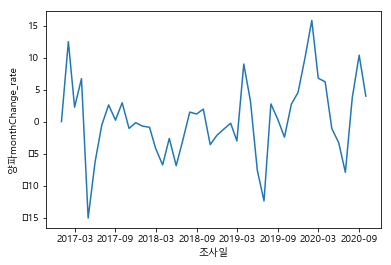

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec


plt.figsize=(500,2000)
sns.lineplot(x="조사일", y="양파monthChange_rate", data=서울품목별가격변동)
# sns.lineplot(x="조사일", y="상추monthChange_rate", data=서울품목별가격변동)
# sns.lineplot(x="조사일", y="무monthChange_rate", data=서울품목별가격변동)
# sns.lineplot(x="조사일", y="배추monthChange_rate", data=서울품목별가격변동)

# sns.lineplot(x="조사일", y="오이monthChange_rate", data=서울품목별가격변동)

plt.show()
%matplotlib inline

# Arima 소비자 가격 예측

In [ ]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [ ]:
import warnings
import itertools # 반복 가능한 데이터 스트림을 처리하는 데 유용한 많은 함수와 제네레이터가 포함
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm #통계분석 기능을 제공하는 파이썬 패키지
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima.model import ARIMAResults
import matplotlib

#차트 기본 크기 설정
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
df = pd.read_excel("C:/Users/Think/Downloads/최종/서울_4년_평균.xlsx")
df.tail()

조사일           시장  마트           서울  지역구  품목
5558 2020-06-01   457.142857 NaN   554.844485  동작구  오이
5559 2020-07-01   462.500000 NaN   751.285479  동작구  오이
5560 2020-08-01   925.000000 NaN   932.565517  동작구  오이
5561 2020-09-01  1166.666667 NaN  1291.811404  동작구  오이
5562 2020-10-01   547.857143 NaN   802.521415  동작구  오이

In [ ]:
강남구 = df[(df['지역구'] == '강남구') & (df['품목'] == '양파')].filter(['조사일','시장'])
강남구.tail()


조사일           시장
41 2020-06-01  4698.750000
42 2020-07-01  4361.250000
43 2020-08-01  4430.000000
44 2020-09-01  4446.666667
45 2020-10-01  4858.571429

In [ ]:
강남구.set_index('조사일', inplace=True)
강남구.head()


시장
조사일                    
2017-01-01  3841.428571
2017-02-01  4350.000000
2017-03-01  4457.333333
2017-04-01  4522.857143
2017-05-01  3771.666667

In [ ]:
강남구_cut = 강남구[0:40]
강남구_cut

시장
조사일                    
2017-01-01  3841.428571
2017-02-01  4350.000000
2017-03-01  4457.333333
2017-04-01  4522.857143
2017-05-01  3771.666667
2017-06-01  3541.875000
2017-07-01  3775.000000
2017-08-01  3790.000000
2017-09-01  3890.000000
2017-10-01  3784.166667
2017-11-01  3952.500000
2017-12-01  3947.142857
2018-01-01  3898.125000
2018-02-01  3952.500000
2018-03-01  3877.500000
2018-04-01  3693.125000
2018-05-01  3789.375000
2018-06-01  3490.000000
2018-07-01  3537.333333
2018-08-01  3437.692308
2018-09-01  3336.428571
2018-10-01  3340.000000
2018-11-01  3327.500000
2018-12-01  3098.750000
2019-01-01  3080.000000
2019-02-01  3146.666667
2019-03-01  3236.875000
2019-04-01  4031.538462
2019-05-01  4078.333333
2019-06-01  3623.750000
2019-07-01  3560.000000
2019-08-01  3120.000000
2019-09-01  3194.285714
2019-10-01  3063.333333
2019-11-01  2945.714286
2019-12-01  3087.142857
2020-01-01  3397.142857
2020-02-01  4263.500000
2020-03-01  4696.500000
2020-04-01  5130.000000

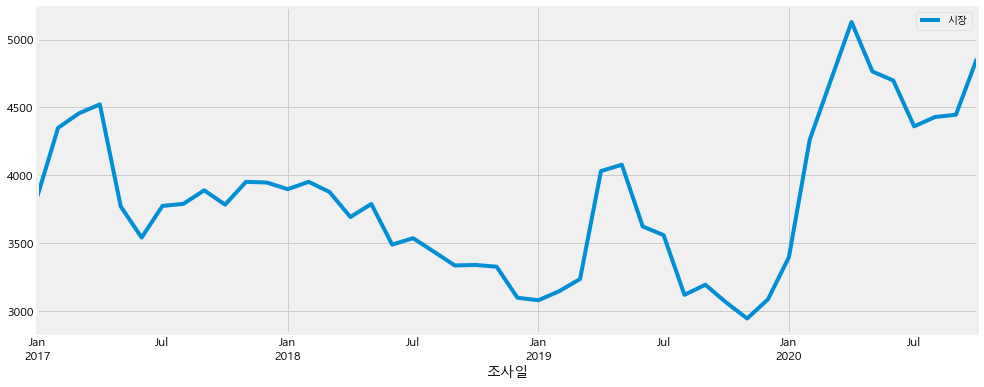

In [ ]:
강남구_cut.plot(figsize = (15,6))
plt.show()

## SARIMAX

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(강남구_cut,
                        order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
# ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:283.5471117964771
# ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:321.0149176650552
# ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0

mod = sm.tsa.statespace.SARIMAX(강남구_cut,
                                order=(0, 0, 0),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        nan           0           0
sigma2      5.141e+05         -0       -inf      0.000    5.14e+05    5.14e+05


C:\Users\Think\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Think\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# results.plot_predict(start='2017-01-01', end='2020-04-01')


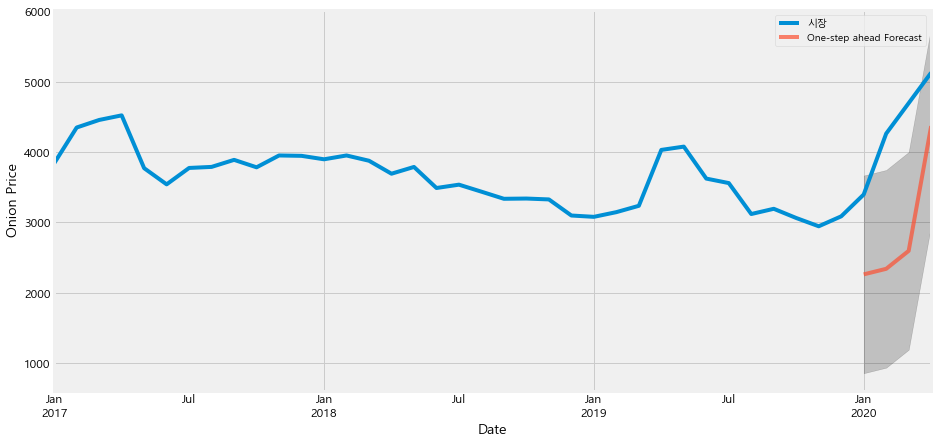

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산
ax = 강남구_cut['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Onion Price')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
# print(y_forecasted)
y_truth = 강남구_cut['2020-01-01':]
# print(y_truth.시장)
mse = ((y_forecasted - y_truth.시장) ** 2).mean()
# print(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2493550.84


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1579.1


               lower 시장     upper 시장
2020-05-01  2962.000736  5772.582597
2020-06-01  2352.209070  5162.790930
2020-07-01  2177.375736  4987.957597


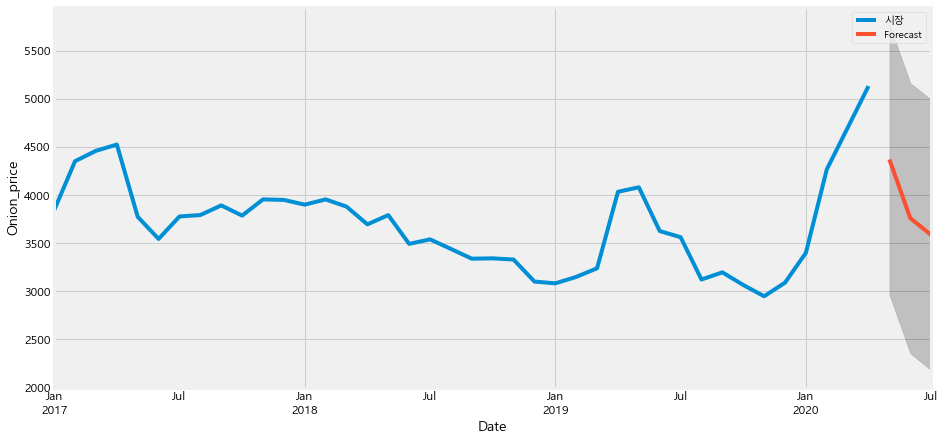

In [ ]:
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
print(pred_ci)
ax = 강남구_cut.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# print(ax)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Onion_price')
plt.legend()
plt.show()

## ARIMA

In [ ]:
# ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:194.65903711927066
# ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:196.2477898508595
# ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0 
# ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0


model = ARIMA(강남구_cut, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12), enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit()
print(model_fit.summary())

# model = sm.tsa.statespace.SARIMAX(강남구_cut, order=(0, 0, 0), seasonal_order=(0, 2, 2, 12), 
#                                   enforce_stationarity=False,
#                                   enforce_invertibility=False)
# results = model.fit()
# print(results.summary().tables[1])

                                    SARIMAX Results                                     
Dep. Variable:                               시장   No. Observations:                   40
Model:             ARIMA(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -100.304
Date:                          Thu, 10 Dec 2020   AIC                            210.608
Time:                                  15:47:56   BIC                            213.803
Sample:                              01-01-2017   HQIC                           210.312
                                   - 04-01-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6854      0.474      1.445      0.149      -0.245       1.615
ma.L1          0.6383      0.467      1.367      0.

C:\Users\Think\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Think\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Think\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.forecasts

array([[   0.        , 1316.38651296, 2149.65618081, 2446.76434237,
        2554.22799804, 2265.09516689, 2092.01784649, 2145.0707349 ,
        2165.3489492 , 2212.93972533, 2180.7150166 , 2243.39128421,
        6360.2797178 , 4336.2214427 , 4090.88651054, 3986.08813807,
        2998.70351112, 3957.16435462, 3432.9561698 , 3642.26085287,
        3489.54627968, 3275.66133388, 3664.9018918 , 3365.21227077,
        3154.54377209, 3349.99580221, 3322.07812277, 3338.85490746,
        4200.59957415, 3598.84131379, 3715.77637732, 3412.90359021,
        3041.77823586, 3350.84141959, 3079.94941066, 2951.96238243,
        3249.9653423 , 3595.54527356, 4509.55777027, 4808.31298031]])

In [ ]:
model_fit.forecast(steps=3)


2020-05-01    4839.127737
2020-06-01    4170.840082
2020-07-01    4022.807499
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
model_fit.forecasts

array([[   0.        , 1316.38651296, 2149.65618081, 2446.76434237,
        2554.22799804, 2265.09516689, 2092.01784649, 2145.0707349 ,
        2165.3489492 , 2212.93972533, 2180.7150166 , 2243.39128421,
        6360.2797178 , 4336.2214427 , 4090.88651054, 3986.08813807,
        2998.70351112, 3957.16435462, 3432.9561698 , 3642.26085287,
        3489.54627968, 3275.66133388, 3664.9018918 , 3365.21227077,
        3154.54377209, 3349.99580221, 3322.07812277, 3338.85490746,
        4200.59957415, 3598.84131379, 3715.77637732, 3412.90359021,
        3041.77823586, 3350.84141959, 3079.94941066, 2951.96238243,
        3249.9653423 , 3595.54527356, 4509.55777027, 4808.31298031]])

In [ ]:
# ARIMA(0, 1, 2) - AIC:642.4303845106289
# 옛 version Arima

from statsmodels.tsa.arima_model import ARIMA as AM
model_AM = AM(강남구, order=(0, 0, 1))
model_AM_fit = model_AM.fit()
print(model_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                               시장   No. Observations:                   40
Model:             ARIMA(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -100.304
Date:                          Thu, 10 Dec 2020   AIC                            210.608
Time:                                  15:49:01   BIC                            213.803
Sample:                              01-01-2017   HQIC                           210.312
                                   - 04-01-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6854      0.474      1.445      0.149      -0.245       1.615
ma.L1          0.6383      0.467      1.367      0.

C:\Users\Think\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


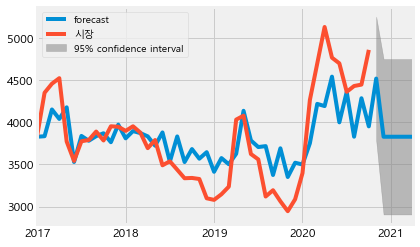

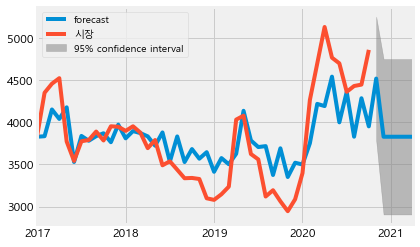

In [ ]:
model_AM_fit.plot_predict(start='2017-01-01', end='2021-04-01')

In [ ]:
df = model_fit.forecast(steps=5)
df

2020-05-01    4839.127737
2020-06-01    4170.840082
2020-07-01    4022.807499
2020-08-01    3655.350165
2020-09-01    3591.415198
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
model_fit.data

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
print(pdq)

for param in pdq:
    try:
        mod = AM(강남구,
                    order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

# Prophet

In [ ]:
import pandas as pd
import numpy as np
import glob
import sys
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 서울_4년_평균.xlsx to 서울_4년_평균.xlsx


In [ ]:
서울_전역=pd.read_excel('/content/서울_4년_평균.xlsx')
서울_전역.head()

조사일           시장           마트           서울  지역구  품목
0 2017-01-01  3841.428571  3680.000000  3377.489237  강남구  양파
1 2017-02-01  4350.000000  4308.571429  3791.027184  강남구  양파
2 2017-03-01  4457.333333  4355.000000  3877.706985  강남구  양파
3 2017-04-01  4522.857143  4642.857143  4127.175542  강남구  양파
4 2017-05-01  3771.666667  3830.000000  3510.247803  강남구  양파

In [ ]:
강남_양파_dt=서울_전역[(서울_전역['지역구']=='강남구')&(서울_전역['품목']=='양파')]
강남_양파_dt.head()

조사일           시장           마트           서울  지역구  품목
0 2017-01-01  3841.428571  3680.000000  3377.489237  강남구  양파
1 2017-02-01  4350.000000  4308.571429  3791.027184  강남구  양파
2 2017-03-01  4457.333333  4355.000000  3877.706985  강남구  양파
3 2017-04-01  4522.857143  4642.857143  4127.175542  강남구  양파
4 2017-05-01  3771.666667  3830.000000  3510.247803  강남구  양파

In [ ]:
강남_양파_dt=강남_양파_dt[['조사일','시장']]
강남_양파_dt.set_index('조사일')

시장
조사일                    
2017-01-01  3841.428571
2017-02-01  4350.000000
2017-03-01  4457.333333
2017-04-01  4522.857143
2017-05-01  3771.666667
2017-06-01  3541.875000
2017-07-01  3775.000000
2017-08-01  3790.000000
2017-09-01  3890.000000
2017-10-01  3784.166667
2017-11-01  3952.500000
2017-12-01  3947.142857
2018-01-01  3898.125000
2018-02-01  3952.500000
2018-03-01  3877.500000
2018-04-01  3693.125000
2018-05-01  3789.375000
2018-06-01  3490.000000
2018-07-01  3537.333333
2018-08-01  3437.692308
2018-09-01  3336.428571
2018-10-01  3340.000000
2018-11-01  3327.500000
2018-12-01  3098.750000
2019-01-01  3080.000000
2019-02-01  3146.666667
2019-03-01  3236.875000
2019-04-01  4031.538462
2019-05-01  4078.333333
2019-06-01  3623.750000
2019-07-01  3560.000000
2019-08-01  3120.000000
2019-09-01  3194.285714
2019-10-01  3063.333333
2019-11-01  2945.714286
2019-12-01  3087.142857
2020-01-01  3397.142857
2020-02-01  4263.500000
2020-03-01  4696.500000
2020-04-01  5130.000000
2020-05-01  4765.714286
2020-06-01  4698.750000
2020-07-01  4361.250000
2020-08-01  4430.000000
2020-09-01  4446.666667
2020-10-01  4858.571429

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

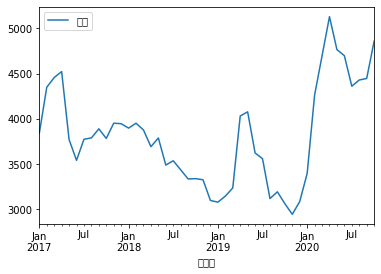

In [ ]:
from matplotlib import pyplot

강남_양파_dt.plot(x='조사일')
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
강남구_양파 = 강남_양파_dt.rename(columns={'조사일': 'ds', '시장': 'y'})
강남구_양파_model = Prophet(interval_width=0.95)
강남구_양파_model.fit(강남구_양파)

강남구_양파_forecast = 강남구_양파_model.make_future_dataframe(periods=6, freq='MS')
강남구_양파_forecast = 강남구_양파_model.predict(강남구_양파_forecast)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

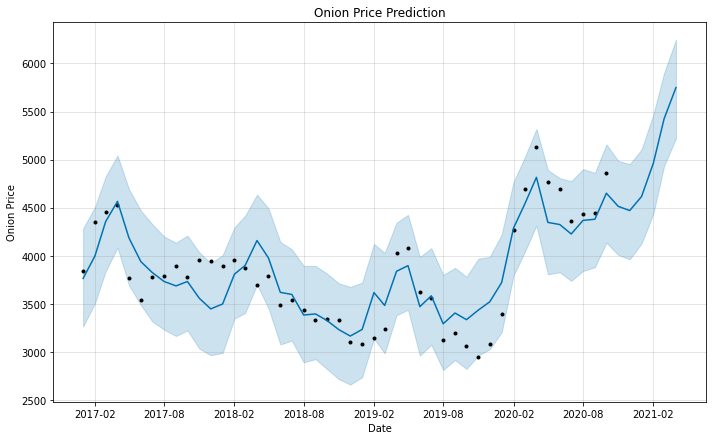

In [ ]:
plt.figure(figsize=(18, 6))
강남구_양파_model.plot(강남구_양파_forecast, xlabel = 'Date', ylabel = 'Onion Price')
plt.title('Onion Price Prediction');

In [ ]:
강남구_양파_model.plot_components()

<bound method Prophet.plot_components of <fbprophet.forecaster.Prophet object at 0x7efda75f4438>>

In [ ]:
print(강남구_양파_forecast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          52 non-null     datetime64[ns]
 1   trend                       52 non-null     float64       
 2   yhat_lower                  52 non-null     float64       
 3   yhat_upper                  52 non-null     float64       
 4   trend_lower                 52 non-null     float64       
 5   trend_upper                 52 non-null     float64       
 6   additive_terms              52 non-null     float64       
 7   additive_terms_lower        52 non-null     float64       
 8   additive_terms_upper        52 non-null     float64       
 9   yearly                      52 non-null     float64       
 10  yearly_lower                52 non-null     float64       
 11  yearly_upper                52 non-null     float64       
 

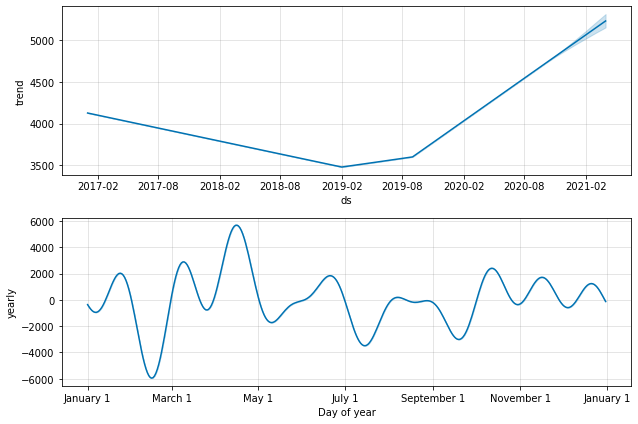

In [ ]:

강남구_양파_model.plot_components(강남구_양파_forecast);

# 경락가, 반입량, 날씨, 유가 데이터 전처리

## 데이터 합치기 및 Excel파일 만들기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 날씨excel 데이터 loading
고추_제천_기상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013~ 기상 데이터/고추_제천20130101_20201031.xlsx')
대파_진도_기상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013~ 기상 데이터/대파_진도20140510_20201031.xlsx')
마늘_서산_기상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013~ 기상 데이터/마늘_서산20130101_20201031.xlsx')
무_홍천_기상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013~ 기상 데이터/무_홍천20130101_20201031.xlsx')
배추_강릉_기상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013~ 기상 데이터/배추_강릉20130101_20201031.xlsx')
양파_해남_기상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013~ 기상 데이터/양파_해남20130101_20201031.xlsx')

# 반입량excel 데이터 loading
고추_반입량 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 반입량/고추 반입량 통합2013-2020.xlsx')
대파_반입량 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 반입량/대파 반입량 통합2013-2020.xlsx')
마늘_반입량 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 반입량/마늘 반입량 통합2013-2020.xlsx')
무_반입량 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 반입량/무 반입량 통합2013-2020.xlsx')
배추_반입량 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 반입량/배추 반입량 통합2013-2020.xlsx')
양파_반입량 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 반입량/양파 반입량 통합2013-2020.xlsx')

    
# 가격excel 데이터 loading

고추_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/고추(상) 경락가 통합2013-2020.xlsx')
고추_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/고추(특) 경락가 통합2013-2020.xlsx')
대파_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/대파(상) 경락가 통합2013-2020.xlsx')
대파_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/대파(특) 경락가 통합2013-2020.xlsx')
마늘_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/마늘(상) 경락가 통합2015-2020(13,14없음).xlsx')
무_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/무(상) 경락가 통합2013-2020.xlsx')
무_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/무(특) 경락가 통합2013-2020.xlsx')
배추_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/배추(상) 경락가 통합2013-2020.xlsx')
배추_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/배추(특) 경락가 통합2013-2020.xlsx')
양파_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/양파(상) 경락가 통합2013-2020.xlsx')
양파_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/양파(특) 경락가 통합2013-2020.xlsx')

In [ ]:
# 반입량 데이터도 일자 변환해주기

in_data = [고추_반입량, 대파_반입량, 마늘_반입량, 무_반입량, 배추_반입량, 양파_반입량]

for i in in_data:
    i['일자'] = i.일자.astype(str)
    i['일자'] = pd.to_datetime(i['일자'])
    
# for i in in_data:
#     i['일자'] = i.일자.astype(str)
#     i['일자'] = pd.to_datetime(i['일자'])

# 기상 데이터도 일자 변환해주기
weather_list = [고추_제천_기상,대파_진도_기상,마늘_서산_기상,무_홍천_기상,배추_강릉_기상,양파_해남_기상]

# print(weather_list)
for i in weather_list:
    i['일시'] = i.일시.astype(str)
    i['일시'] = pd.to_datetime(i['일시'])
    i.rename(columns={'일시' : '일자'}, inplace=True)
    i.drop(['지점', '지점명'], axis=1, inplace=True)


# 가격데이터 일자 컬럼 -> 날짜데이터로 변환
in_data_sang = [고추_상, 대파_상, 마늘_상, 무_상, 배추_상, 양파_상]
in_data_top = [고추_특, 대파_특, 무_특, 배추_특, 양파_특]
for i in in_data_sang:
    i['일자'] = i.일자.astype(str)
    i['일자'] = pd.to_datetime(i['일자'])
    
for i in in_data_top:
    i['일자'] = i.일자.astype(str)
    i['일자'] = pd.to_datetime(i['일자'])
    

In [ ]:
data_name = ['고추_상','대파_상','마늘_상','무_상','배추_상','양파_상']
data_name2 = ['고추_특','대파_특','무_특','배추_특','양파_특']

price_data2 = [고추_반입량, 대파_반입량, 무_반입량, 배추_반입량, 양파_반입량]
weather_list2 = [고추_제천_기상, 대파_진도_기상, 무_홍천_기상, 배추_강릉_기상, 양파_해남_기상]

for a, b, c, d in zip(price_data, in_data_sang, weather_list, range(0, len(price_data))):
    data = pd.merge(pd.merge(a,b, on='일자'),c, on='일자')
    data.to_excel("C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/"+data_name[d]+".xlsx", header=True, index=False)
    
for a, b, c, d in zip( price_data2, in_data_top, weather_list2, range(0, len(price_data2))):
    data = pd.merge(pd.merge(a,b, on='일자'),c, on='일자')
    data.to_excel("C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/"+data_name2[d]+".xlsx", header=True, index=False)

# gochu_sang_merge = pd.merge(pd.merge(gochu_sang, gochu_in, on='일자', ), weather_j, on='일자')
# gochu_top_merge = pd.merge(pd.merge(gochu_top, gochu_in, on='일자', ), weather_j, on='일자')
# garlic_sang_merge = pd.merge(pd.merge(garlic_sabng, garlic_in, on='일자', ), weather_s, on='일자')

## 유가 데이터 추가로 합치기

In [ ]:
고추_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/고추_상.xlsx')
고추_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/고추_특.xlsx')
대파_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/대파_상.xlsx')
대파_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/대파_특.xlsx')
마늘_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/마늘_상.xlsx')
무_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/무_상.xlsx')
무_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/무_특.xlsx')
배추_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/배추_상.xlsx')
배추_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/배추_특.xlsx')
양파_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/양파_상.xlsx')
양파_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_최종/양파_특.xlsx')

In [ ]:
고추_상.drop(['일자'], axis=1, inplace=True)
고추_특.drop(['일자'], axis=1, inplace=True)
대파_상.drop(['일자'], axis=1, inplace=True)
대파_특.drop(['일자'], axis=1, inplace=True)
마늘_상.drop(['일자'], axis=1, inplace=True)
무_상.drop(['일자'], axis=1, inplace=True)
무_특.drop(['일자'], axis=1, inplace=True)
배추_상.drop(['일자'], axis=1, inplace=True)
배추_특.drop(['일자'], axis=1, inplace=True)
양파_상.drop(['일자'], axis=1, inplace=True)
양파_특.drop(['일자'], axis=1, inplace=True)


In [ ]:
대파_특

반입량  평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  \
0     235000   725      10.8      24.0       0.0         3.2        43.1   
1     255000   783      13.5      21.0       4.0         2.4        79.9   
2     202000   818      10.6      25.5       0.0         1.6        73.4   
3     214000   766      13.8      18.1      14.5         1.3        91.3   
4     233000   764      11.2      19.7       0.0         2.7        78.6   
5     219000   745       9.1      23.1       0.0         1.4        71.6   
6     207000   772      11.5      25.7       0.0         1.5        62.6   
7     215000   829      11.1      26.6       0.0         1.5        67.8   
8     207000   856      14.5      19.9      27.0         1.6        92.9   
9     211000   844      12.3      20.4       0.0         1.7        91.1   
10    190000   868      11.5      25.8       0.0         1.0        82.9   
11    186000   867      14.4      22.7       0.0         1.7        84.1   
12    201000   912      13.5      24.1       0.0         1.4        77.8   
13    207000  1059      12.9      25.0       0.0         1.9        74.3   
14    171000  1362      12.9      26.7       0.0         2.1        72.3   
15    190000  1138      17.2      25.3       0.0         2.9        78.5   
16    213000  1116      13.7      27.5       0.0         1.3        80.0   
17    213000  1093      12.2      29.2       0.0         1.6        59.8   
18    193000   973      15.5      29.3       0.0         1.3        76.8   
19    185000  1123      18.2      21.7      42.0         4.2        85.9   
20    174000  1453      18.7      20.5      15.5         2.1        96.4   
21    203000  1223      18.8      25.9      10.0         1.7        87.5   
22    173000  1119      16.9      24.9       0.0         1.4        82.8   
23    201000  1009      16.5      25.3       0.0         1.3        82.3   
24    163000  1153      15.0      25.2       0.0         1.2        86.8   
25    219000  1118      15.6      24.1       0.0         1.3        85.6   
26    234000  1117      19.3      24.9       0.0         1.9        82.9   
27    222000  1011      18.3      25.6       0.1         1.9        82.5   
28    202000   925      17.6      22.7       5.0         2.1        86.4   
29    181000   974      17.7      24.4       0.0         1.9        86.1   
...      ...   ...       ...       ...       ...         ...         ...   
1866  325000  3067      16.7      26.1       0.6         1.8        78.0   
1867  322000  2870      16.0      24.7       0.0         1.8        82.0   
1868  362000  2651      16.1      25.0       0.0         1.2        83.6   
1869  403000  3351      14.4      25.6       0.0         1.2        77.9   
1870  402000  3305      13.6      25.0       0.0         1.8        79.1   
1871  276000  3556      15.7      23.9       0.0         2.3        77.9   
1872  386000  3007      13.7      20.1       0.0         5.1        56.6   
1873  302000  3229      14.2      19.9       0.0         4.3        59.5   
1874  280000  3505      12.7      21.9       0.0         2.1        64.9   
1875  278000  3367      11.6      23.8       0.0         1.9        71.4   
1876  267000  3250       8.7      22.0       0.0         1.5        72.0   
1877  306000  2922       9.9      23.2       0.0         1.3        81.0   
1878  365000  2876      14.4      22.4       0.0         2.8        76.4   
1879  332000  2873      14.2      19.4       0.0         4.0        57.1   
1880  306000  2776      11.1      21.1       0.0         4.0        55.3   
1881  313000  2905      13.0      18.3       0.0         3.6        48.8   
1882  271000  2879       9.5      18.0       0.0         1.4        67.9   
1883  260000  2952       6.9      20.3       0.0         1.7        76.3   
1884  297000  3349       9.2      20.3       0.0         2.4        70.1   
1885  305000  2942       6.7      22.4       0.0         1.0        77.6   
1886  288000  2967      10.9      18.4      24.4         

In [ ]:
유가 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/주유소_평균판매가격.xlsx')

In [ ]:
abc_list2 = ['고추_상', '고추_특', '대파_상', '대파_특', '마늘_상', '무_상', '무_특', '배추_상', '배추_특', '양파_상', '양파_특']
abc_list = [고추_상, 고추_특, 대파_상, 대파_특, 마늘_상, 무_상, 무_특, 배추_상, 배추_특, 양파_상, 양파_특]

In [ ]:
유가['일자'] = 유가.일자.astype(str)
유가['일자'] = pd.to_datetime(유가['일자'])



In [ ]:
고추_상

일자    반입량    평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  \
0    2013-01-03  45380   76836     -23.4     -10.9       0.0         1.4   
1    2013-01-04  22930   73930     -25.6      -7.3       0.0         0.6   
2    2013-01-05  24350   68310     -24.2      -0.9       0.0         0.8   
3    2013-01-07  34110   67429     -18.0      -1.1       0.0         0.8   
4    2013-01-08  12780   61331     -16.7      -0.9       0.0         1.1   
5    2013-01-09  15960   56529     -17.5      -5.4       0.0         2.2   
6    2013-01-10  20070   52675     -22.5      -4.7       0.0         1.1   
7    2013-01-11  11970   56553     -20.0      -0.8       0.0         0.6   
8    2013-01-12  20000   54659     -12.9       2.3       0.0         0.9   
9    2013-01-14  28520   56182     -14.4       2.9       0.0         1.2   
10   2013-01-15  20610   53639     -14.2       4.4       0.0         0.5   
11   2013-01-16  25760   52902     -12.7       0.2       0.0         1.2   
12   2013-01-17  18120   52461      -7.4      -2.8       0.0         2.1   
13   2013-01-18  13660   55174     -13.2      -2.0       0.0         1.3   
14   2013-01-19  18240   55322     -12.9       2.5       0.0         0.9   
15   2013-01-21  26200   58704      -0.4       1.5      31.0         1.3   
16   2013-01-22  15160   61683       0.4       3.7       1.5         1.1   
17   2013-01-23  20710   64702       0.0       1.8       1.5         1.2   
18   2013-01-24  19610   66987      -7.0       0.5       2.0         2.8   
19   2013-01-25  14970   72895     -11.3      -6.1       0.0         4.0   
20   2013-01-26  15970   81903     -15.0      -5.2       0.0         2.6   
21   2013-01-28  27630   88697     -16.6       0.3       0.0         0.8   
22   2013-01-29  18920   94554      -3.4       4.0       0.0         0.3   
23   2013-01-30  22920   92619      -1.2       9.5       0.0         0.4   
24   2013-01-31  21030   95577      -4.5      11.3       0.0         0.6   
25   2013-02-01  23730   93550       2.0       8.3      41.0         1.8   
26   2013-02-02  23590   90561      -4.7       6.3       0.0         3.3   
27   2013-02-04  33560   93963      -7.6       2.9       7.0         1.6   
28   2013-02-05  31130   97828      -9.1       1.2       1.5         0.6   
29   2013-02-06  31050   88096      -3.9       0.5       3.5         2.3   
...         ...    ...     ...       ...       ...       ...         ...   
2064 2020-06-08   1000   35586      16.8      31.3       0.0         1.1   
2065 2020-06-11   1000   29811      20.2      31.3       5.2         1.2   
2066 2020-06-19   1000   37349      16.6      27.6       0.0         1.1   
2067 2020-07-15   1000   47361      16.5      25.4       1.1         0.9   
2068 2020-07-27   1000   30997      20.3      26.0       4.4         0.9   
2069 2020-08-26   1000   59330      22.8      31.9       0.7         2.3   
2070 2020-09-28   1000  139610       8.9      24.3       0.0         0.8   
2071 2020-10-06   1000   59890       2.5      18.7       0.0         1.0   
2072 2020-10-07   1000   46554       6.4      20.2       0.0         1.5   
2073 2020-10-08   2000   36467       5.6      20.3       0.0         1.7   
2074 2020-10-09   1000   36318       7.5      21.0       0.0         2.3   
2075 2020-10-10   2000   34157       5.8      19.4       0.0         1.1   
2076 2020-10-12   1000   41840       9.2      20.6       0.0         0.7   
2077 2020-10-13   1000   41343       5.5      17.8       0.0         0.8   
2078 2020-10-14   1000   42736       3.9      18.1       0.0         0.6   
2079 2020-10-15   1000   38085       3.3      17.7       0.0         0.5   
2080 2020-10-16   1000   44420       2.2      15.4       0.0         0.6   
2081 2020-10-17   1000   38632       2.8      17.9       0.0         0.8   
2082 2020-10-19   3000   57551       2.3      20.2       0.0         0.6   
2083 2020-10-20   1000   43293       2.2      21.0       0.0         0.5   
2084 2020-10-21   1000   35682       4.8      14.5       0.0 

In [ ]:
for i in range(0, len(abc_list)):
    일교차_list = []
    abc = abc_list[i]
    for a, b in zip(abc['최고기온(°C)'], abc['최저기온(°C)']):
        일교차 = abs(a-b)
        일교차_list.append(round(일교차, 2))
        if len(일교차_list) == len(abc):
            abc['일교차'] = 일교차_list
            print(abc)
        else:
            continue



             일자    반입량    평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  \
0    2013-01-03  45380   76836     -23.4     -10.9       0.0         1.4   
1    2013-01-04  22930   73930     -25.6      -7.3       0.0         0.6   
2    2013-01-05  24350   68310     -24.2      -0.9       0.0         0.8   
3    2013-01-07  34110   67429     -18.0      -1.1       0.0         0.8   
4    2013-01-08  12780   61331     -16.7      -0.9       0.0         1.1   
5    2013-01-09  15960   56529     -17.5      -5.4       0.0         2.2   
6    2013-01-10  20070   52675     -22.5      -4.7       0.0         1.1   
7    2013-01-11  11970   56553     -20.0      -0.8       0.0         0.6   
8    2013-01-12  20000   54659     -12.9       2.3       0.0         0.9   
9    2013-01-14  28520   56182     -14.4       2.9       0.0         1.2   
10   2013-01-15  20610   53639     -14.2       4.4       0.0         0.5   
11   2013-01-16  25760   52902     -12.7       0.2       0.0         1.2   
12   2013-01

일자     반입량  평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  \
0    2014-05-10  235000   634      10.8      24.0       0.0         3.2   
1    2014-05-12  255000   735      13.5      21.0       4.0         2.4   
2    2014-05-13  202000   766      10.6      25.5       0.0         1.6   
3    2014-05-14  214000   711      13.8      18.1      14.5         1.3   
4    2014-05-15  233000   684      11.2      19.7       0.0         2.7   
5    2014-05-16  219000   682       9.1      23.1       0.0         1.4   
6    2014-05-17  207000   695      11.5      25.7       0.0         1.5   
7    2014-05-19  215000   764      11.1      26.6       0.0         1.5   
8    2014-05-20  207000   807      14.5      19.9      27.0         1.6   
9    2014-05-21  211000   782      12.3      20.4       0.0         1.7   
10   2014-05-22  190000   835      11.5      25.8       0.0         1.0   
11   2014-05-23  186000   776      14.4      22.7       0.0         1.7   
12   2014-05-24  201000   827      13.5      24.1       0.0         1.4   
13   2014-05-26  207000   966      12.9      25.0       0.0         1.9   
14   2014-05-27  171000  1286      12.9      26.7       0.0         2.1   
15   2014-05-28  190000   999      17.2      25.3       0.0         2.9   
16   2014-05-29  213000   910      13.7      27.5       0.0         1.3   
17   2014-05-30  213000   824      12.2      29.2       0.0         1.6   
18   2014-05-31  193000   711      15.5      29.3       0.0         1.3   
19   2014-06-02  185000   896      18.2      21.7      42.0         4.2   
20   2014-06-03  174000  1331      18.7      20.5      15.5         2.1   
21   2014-06-04  203000  1091      18.8      25.9      10.0         1.7   
22   2014-06-05  173000   962      16.9      24.9       0.0         1.4   
23   2014-06-06  201000   846      16.5      25.3       0.0         1.3   
24   2014-06-07  163000  1051      15.0      25.2       0.0         1.2   
25   2014-06-09  219000  1044      15.6      24.1       0.0         1.3   
26   2014-06-10  234000   969      19.3      24.9       0.0         1.9   
27   2014-06-11  222000   881      18.3      25.6       0.1         1.9   
28   2014-06-12  202000   796      17.6      22.7       5.0         2.1   
29   2014-06-13  181000   789      17.7      24.4       0.0         1.9   
...         ...     ...   ...       ...       ...       ...         ...   
1866 2020-09-24  325000  2861      16.7      26.1       0.6         1.8   
1867 2020-09-25  322000  2581      16.0      24.7       0.0         1.8   
1868 2020-09-26  362000  2335      16.1      25.0       0.0         1.2   
1869 2020-09-28  403000  3024      14.4      25.6       0.0         1.2   
1870 2020-09-29  402000  3007      13.6      25.0       0.0         1.8   
1871 2020-09-30  276000  3187      15.7      23.9       0.0         2.3   
1872 2020-10-05  386000  2729      13.7      20.1       0.0         5.1   
1873 2020-10-06  302000  2933      14.2      19.9       0.0         4.3   
1874 2020-10-07  280000  3252      12.7      21.9       0.0         2.1   
1875 2020-10-08  278000  3113      11.6      23.8       0.0         1.9   
1876 2020-10-09  267000  2823       8.7      22.0       0.0         1.5   
1877 2020-10-10  306000  2580       9.9      23.2       0.0         1.3   
1878 2020-10-12  365000  2482      14.4      22.4       0.0         2.8   
1879 2020-10-13  332000  2338      14.2      19.4       0.0         4.0   
1880 2020-10-14  306000  2146      11.1      21.1       0.0         4.0   
1881 2020-10-15  313000  2319      13.0      18.3       0.0         3.6   
1882 2020-10-16  271000  2467       9.5      18.0       0.0         1.4   
1883 2020-10-17  260000  2714       6.9      20.3       0.0         1.7   
1884 2020-10-19  297000  3112       9.2      20.3       0.0         2.4   
1885 2020-10-20  305000  2666       6.7      22.4       0.0         1.0   
1886 2020-10-21  288000  2660      10.9      18.4      24.4         1.0   
1887 2020-10-22  289000  2658      11.

In [ ]:
for i in range(0, len(abc_list)):
    data = pd.merge(abc_list[i], 유가, on='일자')
    data.to_excel("C:/Users/Think/Downloads/반입량 데이터/유가_최종/"+abc_list2[i]+".xlsx", header=True, index=False)

# 경락가 EDA

In [ ]:
import pandas as pd
import numpy as np
import time
import itertools
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt


In [ ]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [ ]:
# 경락가_반입량_기상_유가 데이터
배추_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/배추_상.xlsx')
배추_특 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/배추_특.xlsx')
고추_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/고추_상.xlsx')
고추_특 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/고추_특.xlsx')


In [ ]:
대파_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013_2020_유가_최종/대파_특.xlsx')

In [ ]:
대파_특['일교차'] = ""
일교차_list = []
대파_특_list = []
for a, b in zip(대파_특['최고기온(°C)'], 대파_특['최저기온(°C)']):
    일교차 = abs(a-b)
    일교차_list.append(round(일교차, 2))
    
대파_특['일교차'] = 일교차_list

In [ ]:
배추_상['일교차'] = ""
배추_특['일교차'] = ""
일교차_list = []
특_일교차_list = []
for a, b in zip(배추_상['최고기온(°C)'], 배추_상['최저기온(°C)']):
    일교차 = abs(a-b)
    일교차_list.append(round(일교차, 2))
    
for a, b in zip(배추_특['최고기온(°C)'], 배추_상['최저기온(°C)']):
    일교차 = abs(a-b)
    특_일교차_list.append(round(일교차, 2))

# print(일교차_list)

배추_상['일교차'] = 일교차_list
배추_특['일교차'] = 특_일교차_list

In [ ]:
배추_상.head()

일자     반입량   평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  \
0 2013-01-03  805000  10515     -11.1      -0.7       0.0         4.0   
1 2013-01-04  564000  10454     -10.6       1.8       0.0         3.2   
2 2013-01-05  474000   9250      -5.4       2.8       0.0         4.3   
3 2013-01-07  549000   9961      -4.1       5.5       0.0         3.2   
4 2013-01-08  434000  10962      -3.5       5.4       0.0         3.1   

   평균 상대습도(%)  합계 일조시간(hr)  합계 일사량(MJ/m2)  평균 지면온도(°C)  평균 5cm 지중온도(°C)  \
0        25.8          9.0          11.66         -4.4             -1.9   
1        31.1          9.0          11.57         -4.3             -2.2   
2        30.4          8.9          11.31         -3.0             -1.7   
3        25.4          5.1           9.10         -1.2             -1.0   
4        29.8          8.1          10.58         -1.8             -0.7   

     유가 전국평균가격   일교차  
0  1927.557647  10.4  
1  1928.578235  12.4  
2  1928.207647   8.2  
3  1927.256471   9.6  
4  1928.202353   8.9

## 컬럼 데이터 개수

In [ ]:
# -   컬럼 데이터 개수(고추데이터 1000개, 마늘 3000개 등등) 2375개 동일
대파_특.count()

일자             1896
반입량            1896
평균가격           1896
최저기온(°C)       1896
최고기온(°C)       1896
일강수량(mm)       1896
평균 풍속(m/s)     1896
평균 상대습도(%)     1896
합계 일조시간(hr)    1896
평균 지면온도(°C)    1896
유가 전국평균가격      1896
일교차            1896
dtype: int64

## 요일별 채소 평균가격 확인

In [ ]:
# 요일별 채소 평균가격 체크
import datetime
대파_특_avg_price_day = 대파_특[['일자', '평균가격']]
대파_특_avg_price_day['요일'] = ""
DayL = ['월','화','수','목','금','토','일']
date_list = []
for day in 대파_특_avg_price_day['일자']:
    date = DayL[datetime.date(day.year,day.month,day.day).weekday()]
    date_list.append(date)

C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# -   요일별 채소 평균가격
import datetime
배추_상_avg_price_day = 배추_상[['일자', '평균가격']]
배추_특_avg_price_day = 배추_특[['일자', '평균가격']]
배추_상_avg_price_day['요일'] = ""
배추_특_avg_price_day['요일'] = ""
DayL = ['월','화','수','목','금','토','일']
date_list = []
date_list2 = []
for day in 배추_상_avg_price_day['일자']:
    date = DayL[datetime.date(day.year,day.month,day.day).weekday()]
    date_list.append(date)
    
for day in 배추_특_avg_price_day['일자']:
    date = DayL[datetime.date(day.year,day.month,day.day).weekday()]
    date_list2.append(date)


C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 배추_상_avg_price_day['요일'] = date_list
# 배추_상_avg_price_day

# 배추_특_avg_price_day['요일'] = date_list2
# 배추_특_avg_price_day

대파_특_avg_price_day['요일'] = date_list
대파_특_avg_price_day

C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


일자  평균가격 요일
0    2014-05-10   725  토
1    2014-05-12   783  월
2    2014-05-13   818  화
3    2014-05-14   766  수
4    2014-05-15   764  목
...         ...   ... ..
1891 2020-10-27  3377  화
1892 2020-10-28  3210  수
1893 2020-10-29  3305  목
1894 2020-10-30  3391  금
1895 2020-10-31  3028  토

[1896 rows x 3 columns]

In [ ]:
# 배추_상_avg_price_day = 배추_상_avg_price_day.set_index('일자')
대파_특_day_avg = pd.DataFrame(대파_특_avg_price_day.groupby('요일')['평균가격'].mean())
대파_특_day_avg
# 배추_특_day_avg = pd.DataFrame(배추_특_avg_price_day.groupby('요일')['평균가격'].mean())
# 배추_특_day_avg

평균가격
요일             
금   1880.328076
목   1896.883281
수   1899.627760
월   1910.770440
토   1852.136808
화   1930.365625

## 채소 가격 Histogram

<AxesSubplot:ylabel='Count'>

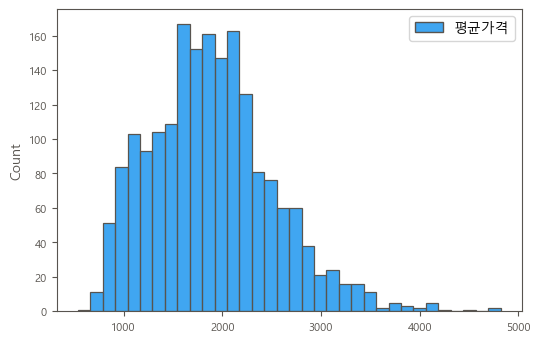

In [ ]:
sns.histplot(data=대파_특_avg_price_day)

(array([721., 670., 573., 188.,  89.,  62.,  30.,  23.,  15.,   4.]),
 array([ 1941. ,  4635.8,  7330.6, 10025.4, 12720.2, 15415. , 18109.8,
        20804.6, 23499.4, 26194.2, 28889. ]),
 <BarContainer object of 10 artists>)

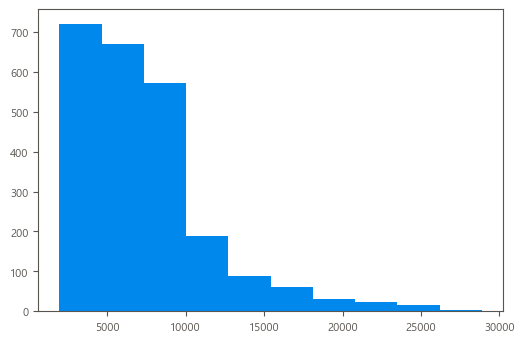

In [ ]:
plt.hist(배추_상_avg_price_day['평균가격'])

<AxesSubplot:ylabel='Count'>

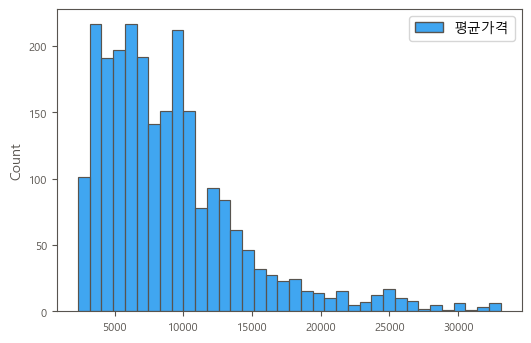

In [ ]:
sns.histplot(data=배추_특_avg_price_day)

(array([620., 673., 537., 271., 113.,  56.,  34.,  46.,  10.,  15.]),
 array([ 2320.,  5397.,  8474., 11551., 14628., 17705., 20782., 23859.,
        26936., 30013., 33090.]),
 <BarContainer object of 10 artists>)

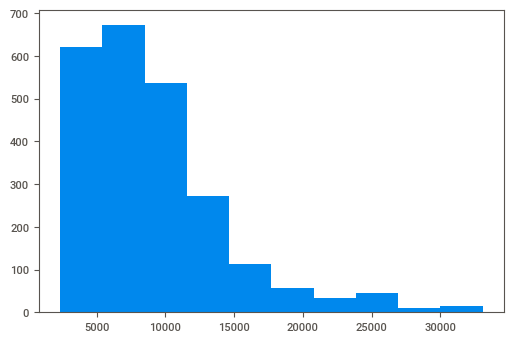

In [ ]:
plt.hist(배추_특_avg_price_day['평균가격'])

## 기후 데이터간 상관관계 분석

In [ ]:
# 배추_상.columns
# 배추_상_weather = 배추_상.drop(['일자', '반입량','평균가격','유가 전국평균가격'], axis=1)
# 배추_상_weather.head()

# 배추_특.columns
# 배추_특_weather = 배추_특.drop(['일자', '반입량','평균가격','유가 전국평균가격'], axis=1)
# 배추_특_weather.head()

대파_특.columns
대파_특_weather = 배추_특.drop(['일자', '반입량','평균가격','유가 전국평균가격'], axis=1)
대파_특_weather.head()

최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0     -11.1      -0.7       0.0         4.0        25.8          9.0   
1     -10.6       1.8       0.0         3.2        31.1          9.0   
2      -5.4       2.8       0.0         4.3        30.4          8.9   
3      -4.1       5.5       0.0         3.2        25.4          5.1   
4      -3.5       5.4       0.0         3.1        29.8          8.1   

   합계 일사량(MJ/m2)  평균 지면온도(°C)  평균 5cm 지중온도(°C)   일교차  
0          11.66         -4.4             -1.9  10.4  
1          11.57         -4.3             -2.2  12.4  
2          11.31         -3.0             -1.7   8.2  
3           9.10         -1.2             -1.0   9.6  
4          10.58         -1.8             -0.7   8.9

In [ ]:
corr1 = 배추_상_weather.corr(method = 'pearson')
corr1

corr2 = 배추_특_weather.corr(method = 'pearson')
corr2

corr3 = 대파_특_weather.corr(method='pearson')
corr3

최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  \
최저기온(°C)         1.000000  0.948106  0.126450   -0.357471    0.461000   
최고기온(°C)         0.948106  1.000000  0.035596   -0.266429    0.292176   
일강수량(mm)         0.126450  0.035596  1.000000   -0.112735    0.364516   
평균 풍속(m/s)      -0.357471 -0.266429 -0.112735    1.000000   -0.734415   
평균 상대습도(%)       0.461000  0.292176  0.364516   -0.734415    1.000000   
합계 일조시간(hr)     -0.079882  0.130408 -0.358001    0.413211   -0.626574   
합계 일사량(MJ/m2)    0.335275  0.512643 -0.293717    0.152090   -0.314622   
평균 지면온도(°C)      0.954026  0.959527  0.063500   -0.350858    0.394253   
평균 5cm 지중온도(°C)  0.969055  0.951236  0.100479   -0.383817    0.459258   
일교차             -0.209905  0.111858 -0.285744    0.297950   -0.542342   

                 합계 일조시간(hr)  합계 일사량(MJ/m2)  평균 지면온도(°C)  평균 5cm 지중온도(°C)  \
최저기온(°C)           -0.079882       0.335275     0.954026         0.969055   
최고기온(°C)            0.130408       0.512643     0.959527         0.951236   
일강수량(mm)           -0.358001      -0.293717     0.063500         0.100479   
평균 풍속(m/s)          0.413211       0.152090    -0.350858        -0.383817   
평균 상대습도(%)         -0.626574      -0.314622     0.394253         0.459258   
합계 일조시간(hr)         1.000000       0.805411     0.079042         0.007270   
합계 일사량(MJ/m2)       0.805411       1.000000     0.515625         0.436953   
평균 지면온도(°C)         0.079042       0.515625     1.000000         0.983215   
평균 5cm 지중온도(°C)     0.007270       0.436953     0.983215         1.000000   
일교차                 0.650673       0.528541    -0.031101        -0.103566   

                      일교차  
최저기온(°C)        -0.209905  
최고기온(°C)         0.111858  
일강수량(mm)        -0.285744  
평균 풍속(m/s)       0.297950  
평균 상대습도(%)      -0.542342  
합계 일조시간(hr)      0.650673  
합계 일사량(MJ/m2)    0.528541  
평균 지면온도(°C)     -0.031101  
평균 5cm 지중온도(°C) -0.103566  
일교차              1.000000

C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


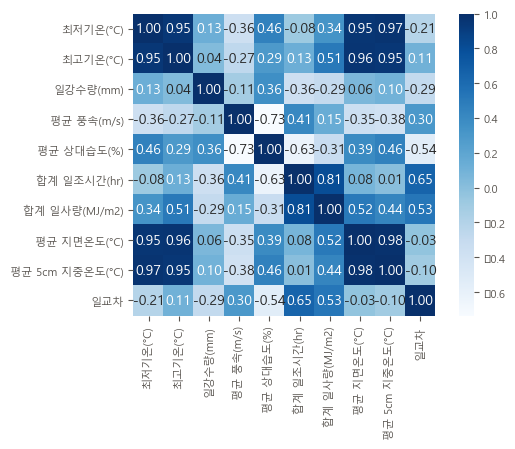

In [ ]:
# 배추_상_weather_heatmap = sns.heatmap(corr1, cbar = True, annot = True, fmt = '.2f', square = True, cmap = 'Blues')
# 배추_특_weather_heatmap = sns.heatmap(corr2, cbar = True, annot = True, fmt = '.2f', square = True, cmap = 'Blues')
대파_특_weather_heatmap = sns.heatmap(corr3, cbar = True, annot = True, fmt = '.2f', square = True, cmap = 'Blues')




### 기후데이터 상관분석
- 최저기온 : 최고기온 0.95, 평균지면온도 0.95, 평균 5cm 지중온도 0.97, 평균 상대습도 0.46
- 최고기온 : 최저기온 0.95  평균지면온도 0.96, 평균 5cm 지중온도 0.95, 합계 일사량 0.51
- 일강수량 : 평균 상대습도 0.36, 합계 일조량 -0.36
- 평균풍속 : 평균 상대습도 -0.73, 합계 일조시간 0.41
- 평균 상대습도 : 평균풍속 -0.73, 합계 일조시간 -0.63, 최저기온 0.46, 평균 5cm 지중온도 0.46, 일교차 -0.54
- 합계 일조시간 : 평균상대습도 -0.63, 합계 일사량 0.81, 일교차 0.65
- 합계 일사량 : 최고기온 0.51, 합계 일조시간 0.81, 평균 지면온도 : 0.52, 일교차 0.53
- 평균 지면온도 : 최저기온 0.95, 최고기온 0.96, 합계 일사량 0.52, 평균 5cm 지중온도 0.98
- 평균 5cm 지중온도 : 최저기온 0.97, 최고기온 0.95, 평균상대습도 0.46, 평균 지면온도 0.98
- 일교차 : 평균 상대습도 -0.54, 합계 일조시간 0.65, 합계 일사량 0.53 

## 평균가격과 기후데이터 산점도 그래프

In [ ]:
# 평균가격과 각 기후데이터 산점도 그래프
배추_상.columns
배추_상_avg_price_weather = 배추_상.drop(['일자', '반입량', '유가 전국평균가격'], axis=1)
배추_상_avg_price_weather

배추_특.columns
배추_특_avg_price_weather = 배추_특.drop(['일자', '반입량', '유가 전국평균가격'], axis=1)
배추_특_avg_price_weather

대파_특.columns
대파_특_avg_price_weather = 대파_특.drop(['일자', '반입량', '유가 전국평균가격'], axis=1)
대파_특_avg_price_weather

평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0      725      10.8      24.0       0.0         3.2        43.1          8.6   
1      783      13.5      21.0       4.0         2.4        79.9          9.0   
2      818      10.6      25.5       0.0         1.6        73.4         12.0   
3      766      13.8      18.1      14.5         1.3        91.3          0.0   
4      764      11.2      19.7       0.0         2.7        78.6         10.3   
...    ...       ...       ...       ...         ...         ...          ...   
1891  3377       6.1      20.6       0.0         1.4        79.6          7.8   
1892  3210      13.5      18.3       0.0         3.1        76.0          2.0   
1893  3305      11.2      16.6       0.0         4.3        49.5          9.0   
1894  3391       6.1      17.0       0.0         2.8        60.8          9.3   
1895  3028       5.1      18.7       0.0         1.8        70.0          9.1   

      평균 지면온도(°C)   일교차  
0            23.5  13.2  
1            22.0   7.5  
2            23.6  14.9  
3            17.3   4.3  
4            21.0   8.5  
...           ...   ...  
1891         14.0  14.5  
1892         15.5   4.8  
1893         13.4   5.4  
1894         12.9  10.9  
1895         13.1  13.6  

[1896 rows x 9 columns]

In [ ]:
display(배추_특_avg_price_weather.head())
display(배추_상_avg_price_weather.head())
display(대파_특_avg_price_weather.head())

평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0  13279     -11.1      -0.7       0.0         4.0        25.8          9.0   
1  13324     -10.6       1.8       0.0         3.2        31.1          9.0   
2  11407      -5.4       2.8       0.0         4.3        30.4          8.9   
3  11607      -4.1       5.5       0.0         3.2        25.4          5.1   
4  13502      -3.5       5.4       0.0         3.1        29.8          8.1   

   합계 일사량(MJ/m2)  평균 지면온도(°C)  평균 5cm 지중온도(°C)   일교차  
0          11.66         -4.4             -1.9  10.4  
1          11.57         -4.3             -2.2  12.4  
2          11.31         -3.0             -1.7   8.2  
3           9.10         -1.2             -1.0   9.6  
4          10.58         -1.8             -0.7   8.9

평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0  10515     -11.1      -0.7       0.0         4.0        25.8          9.0   
1  10454     -10.6       1.8       0.0         3.2        31.1          9.0   
2   9250      -5.4       2.8       0.0         4.3        30.4          8.9   
3   9961      -4.1       5.5       0.0         3.2        25.4          5.1   
4  10962      -3.5       5.4       0.0         3.1        29.8          8.1   

   합계 일사량(MJ/m2)  평균 지면온도(°C)  평균 5cm 지중온도(°C)   일교차  
0          11.66         -4.4             -1.9  10.4  
1          11.57         -4.3             -2.2  12.4  
2          11.31         -3.0             -1.7   8.2  
3           9.10         -1.2             -1.0   9.6  
4          10.58         -1.8             -0.7   8.9

평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0   725      10.8      24.0       0.0         3.2        43.1          8.6   
1   783      13.5      21.0       4.0         2.4        79.9          9.0   
2   818      10.6      25.5       0.0         1.6        73.4         12.0   
3   766      13.8      18.1      14.5         1.3        91.3          0.0   
4   764      11.2      19.7       0.0         2.7        78.6         10.3   

   평균 지면온도(°C)   일교차  
0         23.5  13.2  
1         22.0   7.5  
2         23.6  14.9  
3         17.3   4.3  
4         21.0   8.5

- 대파

C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


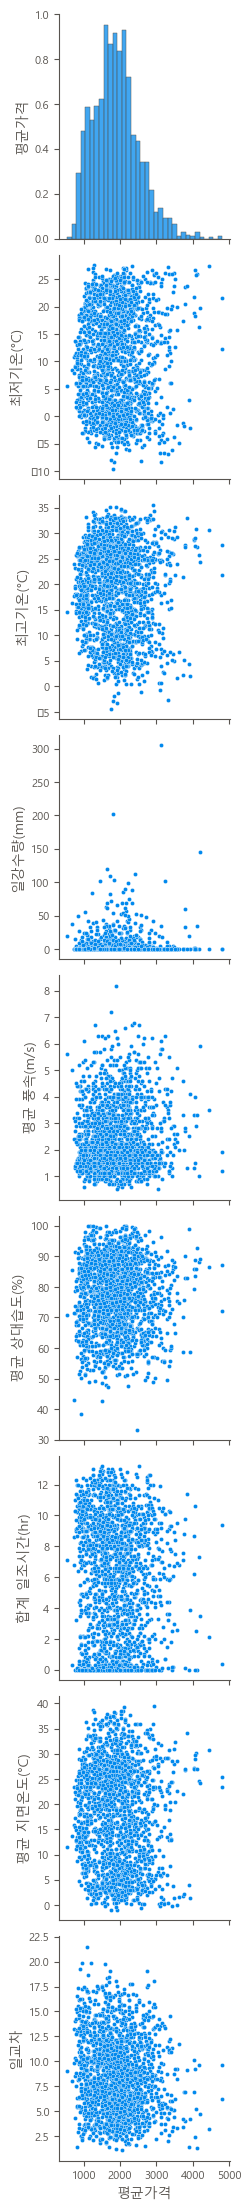

In [ ]:
# 대파 평균가격과 날씨변수의 scatter
sns.pairplot(x_vars='평균가격', data=대파_특_avg_price_weather)
# plt.scatter(x='평균가격', y=y_vars)
plt.show()

- 배추_상

C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


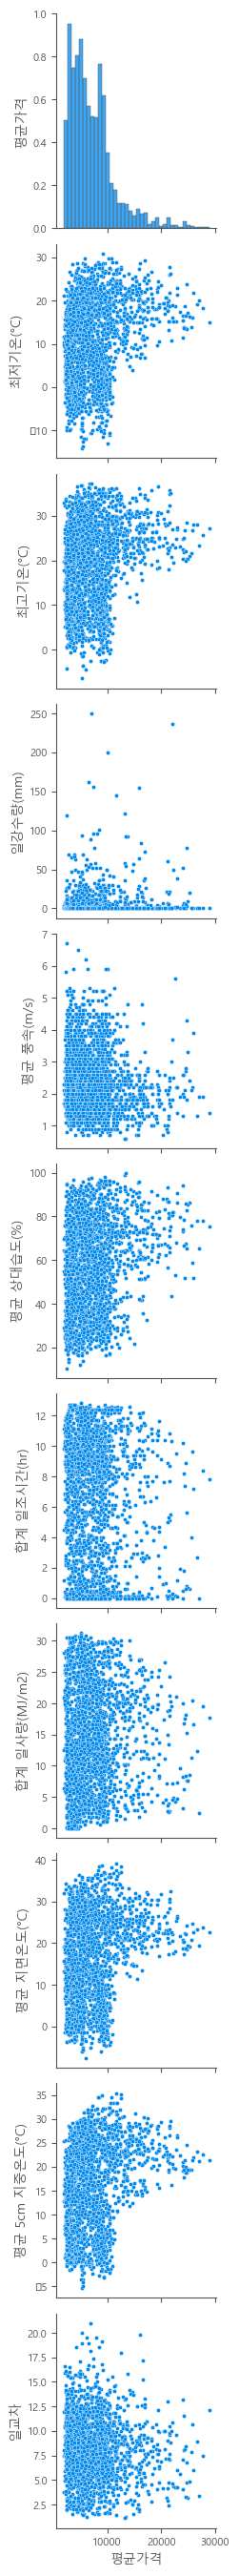

In [ ]:
# 배추_상 평균가격과 날씨변수의 scatter 
# y_vars = ['최저기온(°C)','최고기온(°C)','일강수량(mm)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 지면온도(°C)','평균 5cm 지중온도(°C)','일교차']
sns.pairplot(x_vars='평균가격', data=배추_상_avg_price_weather)
# plt.scatter(x='평균가격', y=y_vars)
plt.show()

- 배추_특

C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


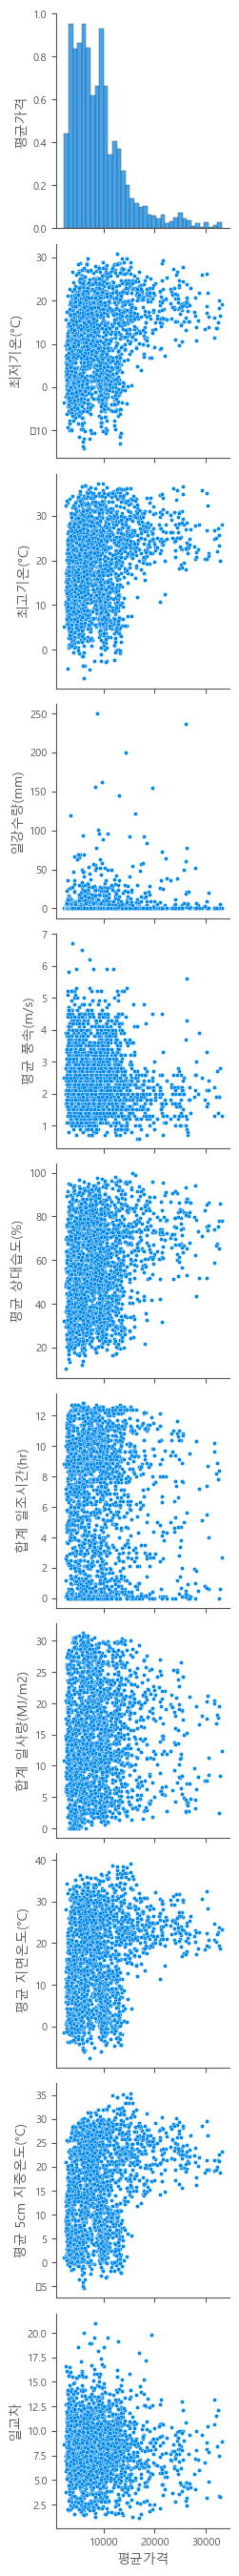

In [ ]:
# 배추_특 평균가격과 날씨변수의 scatter
sns.pairplot(x_vars='평균가격', data=배추_특_avg_price_weather)
plt.show()

## 반입량과 기후데이터 산점도 그래프

In [ ]:
# 반입량과 각 기후데이터 산점도 그래프
대파_특_in_weather = 대파_특.drop(['일자', '평균가격', '유가 전국평균가격'], axis=1)
대파_특_in_weather.head()

반입량  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0  235000      10.8      24.0       0.0         3.2        43.1          8.6   
1  255000      13.5      21.0       4.0         2.4        79.9          9.0   
2  202000      10.6      25.5       0.0         1.6        73.4         12.0   
3  214000      13.8      18.1      14.5         1.3        91.3          0.0   
4  233000      11.2      19.7       0.0         2.7        78.6         10.3   

   평균 지면온도(°C)   일교차  
0         23.5  13.2  
1         22.0   7.5  
2         23.6  14.9  
3         17.3   4.3  
4         21.0   8.5

In [ ]:
# 반입량과 각 기후데이터 산점도 그래프
배추_상_in_weather = 배추_상.drop(['일자', '평균가격', '유가 전국평균가격'], axis=1)
배추_상_in_weather.head()

배추_특_in_weather = 배추_특.drop(['일자', '평균가격', '유가 전국평균가격'], axis=1)
배추_특_in_weather.head()

반입량  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0  805000     -11.1      -0.7       0.0         4.0        25.8          9.0   
1  564000     -10.6       1.8       0.0         3.2        31.1          9.0   
2  474000      -5.4       2.8       0.0         4.3        30.4          8.9   
3  549000      -4.1       5.5       0.0         3.2        25.4          5.1   
4  434000      -3.5       5.4       0.0         3.1        29.8          8.1   

   합계 일사량(MJ/m2)  평균 지면온도(°C)  평균 5cm 지중온도(°C)   일교차  
0          11.66         -4.4             -1.9  10.4  
1          11.57         -4.3             -2.2  12.4  
2          11.31         -3.0             -1.7   8.2  
3           9.10         -1.2             -1.0   9.6  
4          10.58         -1.8             -0.7   8.9

- 대파_특

C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


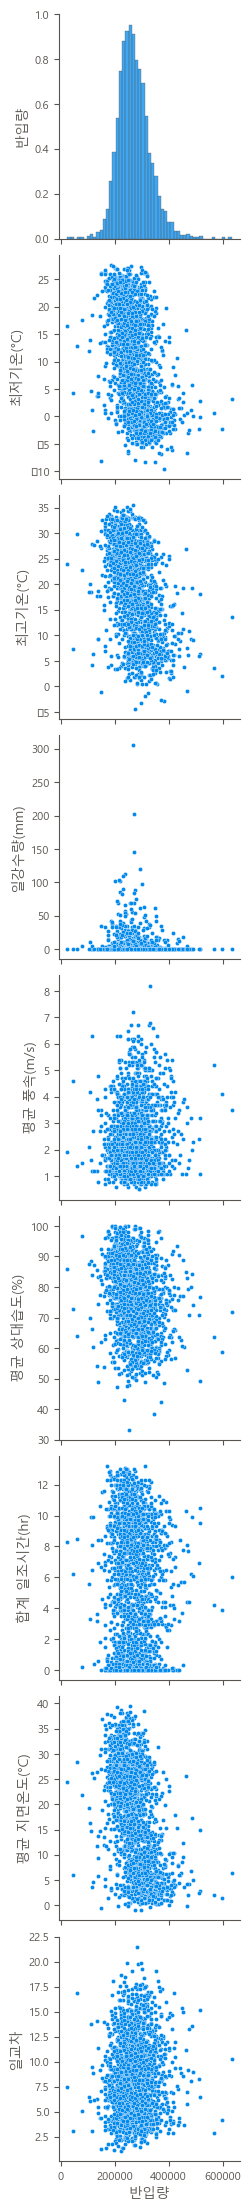

In [ ]:
sns.pairplot(x_vars='반입량', data=대파_특_in_weather)
plt.show()

- 배추_상

C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


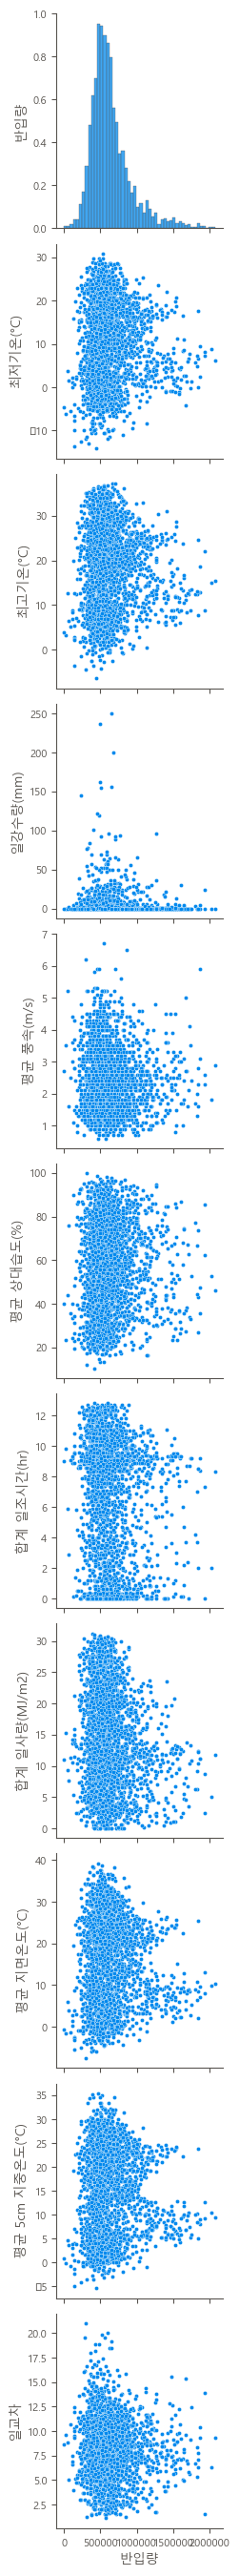

In [ ]:
sns.pairplot(x_vars='반입량', data=배추_상_in_weather)
plt.show()

- 배추_특

C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Think\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


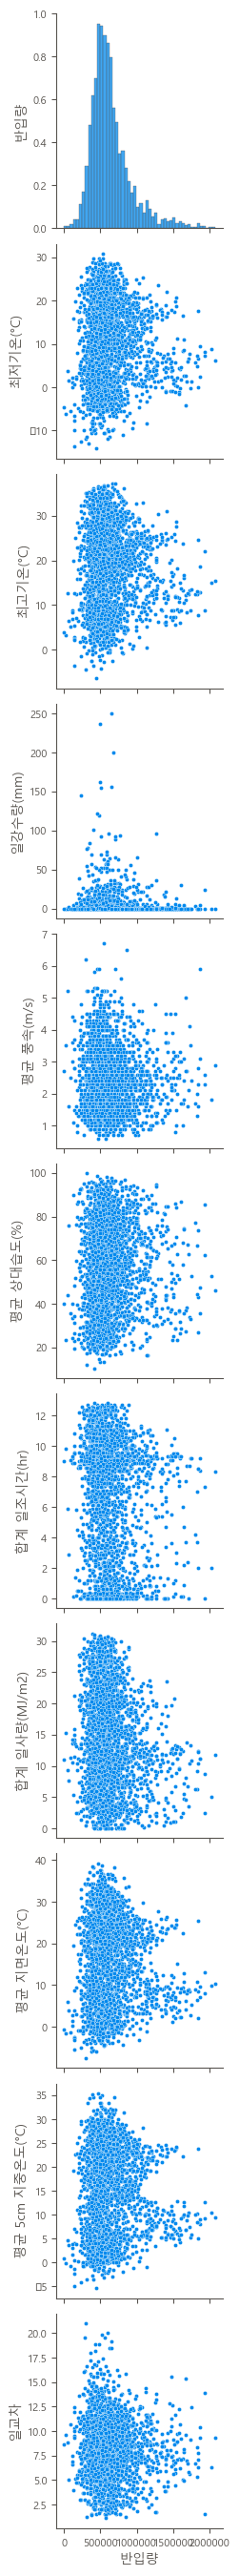

In [ ]:
sns.pairplot(x_vars='반입량', data=배추_특_in_weather)
plt.show()

## 반입량과 평균가격 산점도 그래프

In [ ]:
# 반입량과 평균가격 산점도 그래프 (x : 평균가격, y : 반입량)

반입량_평균가격 = 배추_상[['반입량', '평균가격']]
반입량_평균가격.head()

특_반입량_평균가격 = 배추_특[['반입량', '평균가격']]
특_반입량_평균가격.head()

대파_반입량_평균가격 = 대파_특[['반입량', '평균가격']]
대파_반입량_평균가격.head()

반입량  평균가격
0  235000   725
1  255000   783
2  202000   818
3  214000   766
4  233000   764

- 대파

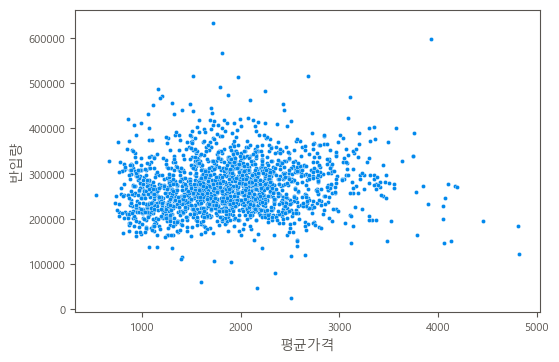

In [ ]:
sns.scatterplot(x='평균가격', y='반입량', data=대파_반입량_평균가격)
plt.show()

- 배추_상

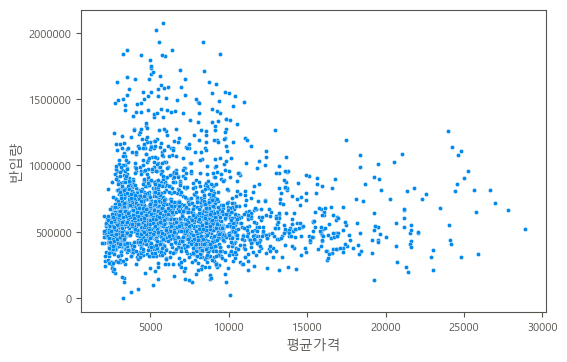

In [ ]:
sns.scatterplot(x='평균가격', y='반입량', data=반입량_평균가격)
plt.show()

- 배추_특

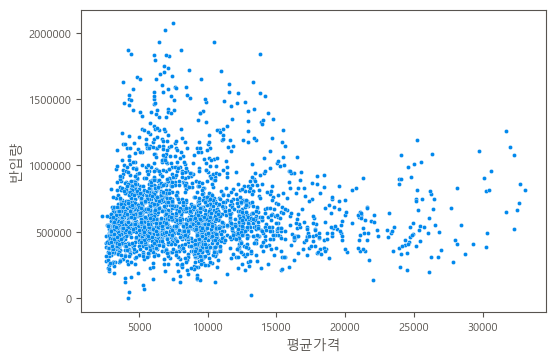

In [ ]:
sns.scatterplot(x='평균가격', y='반입량', data=특_반입량_평균가격)
plt.show()

## 반입량과 평균가격 추세 그래프

- 배추_상

In [ ]:
# 반입량과 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 반입량, 평균가격 월 평균)
반입량_평균가격_추세 = 배추_상[['일자','반입량','평균가격']]
반입량_평균가격_추세 = 반입량_평균가격_추세.set_index('일자')
반입량_추세_평균 = 반입량_평균가격_추세['반입량'].resample('MS').mean()
평균가격_추세_평균 = 반입량_평균가격_추세['평균가격'].resample('MS').mean()

반입량_평균가격_평균추세 = pd.merge(반입량_추세_평균, 평균가격_추세_평균, on='일자')
반입량_평균가격_평균추세



반입량          평균가격
일자                                     
2013-01-01  560920.000000   9417.760000
2013-02-01  592909.090909   9376.727273
2013-03-01  667230.769231   8801.307692
2013-04-01  676423.076923   8524.346154
2013-05-01  623769.230769   6038.269231
...                   ...           ...
2020-06-01  512640.000000   7476.680000
2020-07-01  485370.370370  10420.740741
2020-08-01  496560.000000  16315.040000
2020-09-01  678923.076923  23232.115385
2020-10-01  814541.666667   9480.750000

[94 rows x 2 columns]

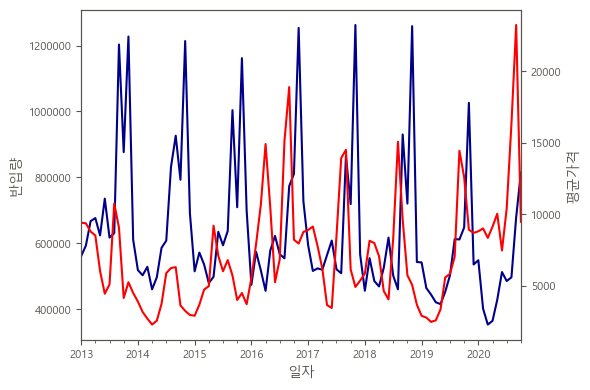

In [ ]:
# 반입량_평균가격_평균추세.plot.line()

a=np.linspace(0,5,200)

ax=반입량_추세_평균.plot(kind='line', x='일자', y='반입량', color='DarkBlue')

ax2=평균가격_추세_평균.plot(kind='line', x='일자', y='평균가격', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('반입량')
ax2.set_ylabel('평균가격')
plt.tight_layout()
plt.show()



- 배추_특

In [ ]:
# 특 반입량과 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 반입량, 평균가격 월 평균)
특_반입량_평균가격_추세 = 배추_특[['일자','반입량','평균가격']]
특_반입량_평균가격_추세 = 특_반입량_평균가격_추세.set_index('일자')
특_반입량_추세_평균 = 특_반입량_평균가격_추세['반입량'].resample('MS').mean()
특_평균가격_추세_평균 = 특_반입량_평균가격_추세['평균가격'].resample('MS').mean()


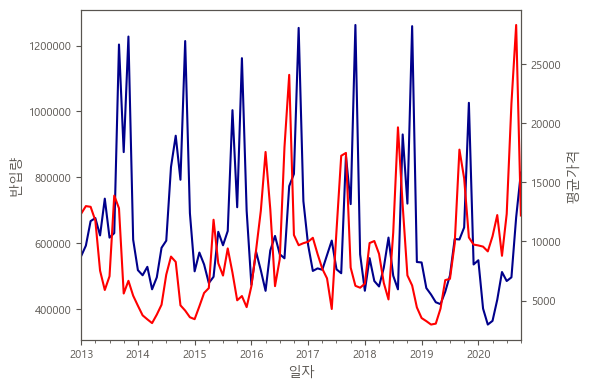

In [ ]:
# 반입량_평균가격_평균추세.plot.line()

a=np.linspace(0,5,200)

ax=특_반입량_추세_평균.plot(kind='line', x='일자', y='반입량', color='DarkBlue')

ax2=특_평균가격_추세_평균.plot(kind='line', x='일자', y='평균가격', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('반입량')
ax2.set_ylabel('평균가격')
plt.tight_layout()
plt.show()



- 대파_특

In [ ]:
대파_반입량_평균가격_추세 = 대파_특[['일자','반입량','평균가격']]
대파_반입량_평균가격_추세 = 대파_반입량_평균가격_추세.set_index('일자')
대파_반입량_추세_평균 = 대파_반입량_평균가격_추세['반입량'].resample('MS').mean()
대파_평균가격_추세_평균 = 대파_반입량_평균가격_추세['평균가격'].resample('MS').mean()

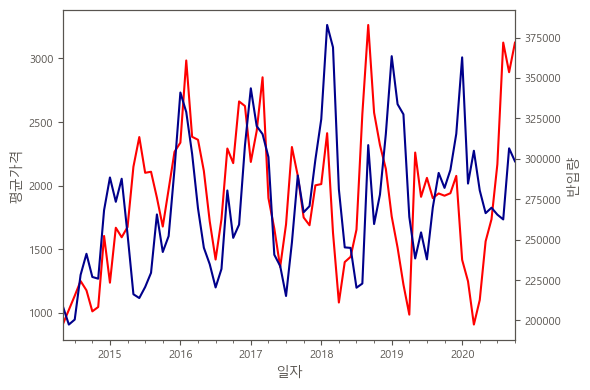

In [ ]:
# 반입량_평균가격_평균추세.plot.line()

a=np.linspace(0,5,200)

ax=대파_평균가격_추세_평균.plot(kind='line', x='일자', y='평균가격',color='Red')

ax2=대파_반입량_추세_평균.plot(kind='line', x='일자', y='반입량', secondary_y=True, color='DarkBlue', ax=ax)

ax.set_ylabel('평균가격')
ax2.set_ylabel('반입량')
plt.tight_layout()
plt.show()



In [ ]:
# -   유가와 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 유가, 평균가격 월 평균)

## 유가와 평균가격 추세 그래프

- 배추_상

In [ ]:
배추_상.columns
유가_평균가격 = 배추_상[['일자', '유가 전국평균가격', '평균가격']]
유가_평균가격.head()

일자    유가 전국평균가격   평균가격
0 2013-01-03  1927.557647  10515
1 2013-01-04  1928.578235  10454
2 2013-01-05  1928.207647   9250
3 2013-01-07  1927.256471   9961
4 2013-01-08  1928.202353  10962

In [ ]:
유가_평균가격 = 유가_평균가격.set_index('일자')
유가_추세_평균 = 유가_평균가격['유가 전국평균가격'].resample('MS').mean()
평균가격_추세_평균 = 유가_평균가격['평균가격'].resample('MS').mean()




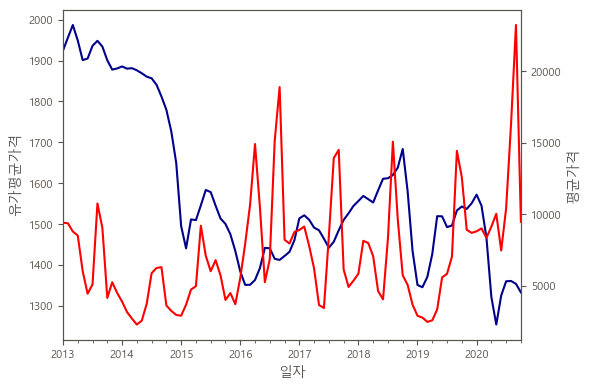

In [ ]:
a=np.linspace(0,5,200)

ax=유가_추세_평균.plot(kind='line', x='일자', y='유가평균가격', color='DarkBlue')

ax2=평균가격_추세_평균.plot(kind='line', x='일자', y='평균가격', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('유가평균가격')
ax2.set_ylabel('평균가격')
plt.tight_layout()
plt.show()

- 배추_특

In [ ]:
# -   유가와 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 유가, 평균가격 월 평균)

In [ ]:
배추_특.columns
특_유가_평균가격 = 배추_특[['일자', '유가 전국평균가격', '평균가격']]
특_유가_평균가격.head()

일자    유가 전국평균가격   평균가격
0 2013-01-03  1927.557647  13279
1 2013-01-04  1928.578235  13324
2 2013-01-05  1928.207647  11407
3 2013-01-07  1927.256471  11607
4 2013-01-08  1928.202353  13502

In [ ]:
특_유가_평균가격 = 특_유가_평균가격.set_index('일자')
특_유가_추세_평균 = 특_유가_평균가격['유가 전국평균가격'].resample('MS').mean()
특_평균가격_추세_평균 = 특_유가_평균가격['평균가격'].resample('MS').mean()




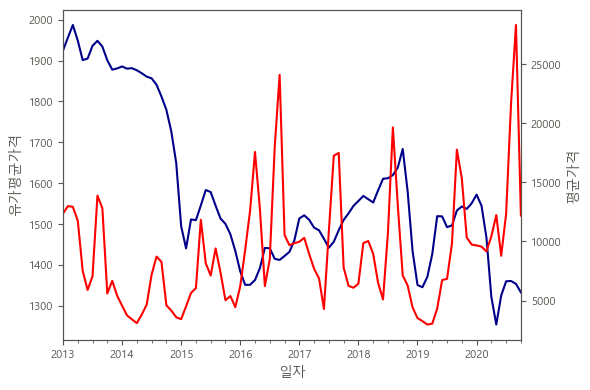

In [ ]:
a=np.linspace(0,5,200)

ax=특_유가_추세_평균.plot(kind='line', x='일자', y='유가평균가격', color='DarkBlue')

ax2=특_평균가격_추세_평균.plot(kind='line', x='일자', y='평균가격', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('유가평균가격')
ax2.set_ylabel('평균가격')
plt.tight_layout()
plt.show()

In [ ]:
특_평균가격_추세_평균

일자
2013-01-01    12353.480000
2013-02-01    12992.954545
2013-03-01    12933.153846
2013-04-01    11774.307692
2013-05-01     7533.538462
                  ...     
2020-06-01     8791.360000
2020-07-01    12333.851852
2020-08-01    21672.680000
2020-09-01    28309.769231
2020-10-01    12199.208333
Freq: MS, Name: 평균가격, Length: 94, dtype: float64

In [ ]:
평균가격_추세_평균

일자
2013-01-01     9417.760000
2013-02-01     9376.727273
2013-03-01     8801.307692
2013-04-01     8524.346154
2013-05-01     6038.269231
                  ...     
2020-06-01     7476.680000
2020-07-01    10420.740741
2020-08-01    16315.040000
2020-09-01    23232.115385
2020-10-01     9480.750000
Freq: MS, Name: 평균가격, Length: 94, dtype: float64

- 대파_특

In [ ]:
대파_특.columns
대파_유가_평균가격 = 대파_특[['일자', '유가 전국평균가격', '평균가격']]

대파_유가_평균가격 = 대파_유가_평균가격.set_index('일자')
대파_유가_추세_평균 = 대파_유가_평균가격['유가 전국평균가격'].resample('MS').mean()
대파_평균가격_추세_평균 = 대파_유가_평균가격['평균가격'].resample('MS').mean()


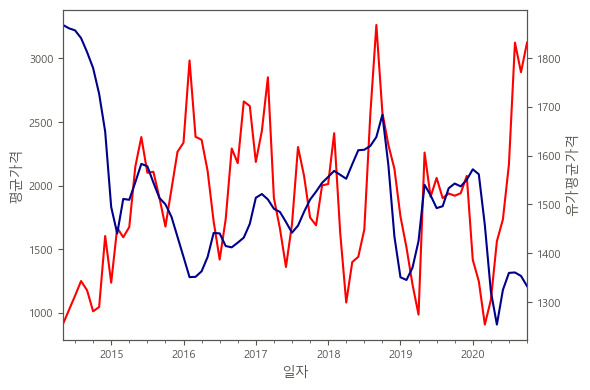

In [ ]:
a=np.linspace(0,5,200)

ax=대파_평균가격_추세_평균.plot(kind='line', x='일자', y='평균가격', color='Red')

ax2=대파_유가_추세_평균.plot(kind='line', x='일자', y='유가평균가격', secondary_y=True, color='DarkBlue', ax=ax)

ax.set_ylabel('평균가격')
ax2.set_ylabel('유가평균가격')
plt.tight_layout()
plt.show()

In [ ]:
대파_특_상관 = 대파_특[['일자','유가 전국평균가격','평균가격']]
대파_특_상관 = 대파_특_상관.set_index('일자')
대파_특_상관 = 대파_특_상관[['유가 전국평균가격', '평균가격']].resample('MS').mean()
대파_특_상관.corr()

유가 전국평균가격      평균가격
유가 전국평균가격   1.000000 -0.359399
평균가격       -0.359399  1.000000

In [ ]:
배추_특_상관 = 배추_특[['일자','유가 전국평균가격','평균가격']]
배추_특_상관 = 배추_특_상관.set_index('일자')
배추_특_상관 = 배추_특_상관[['유가 전국평균가격', '평균가격']].resample('MS').mean()
배추_특_상관.corr()

유가 전국평균가격      평균가격
유가 전국평균가격   1.000000 -0.204599
평균가격       -0.204599  1.000000

In [ ]:
배추_상_상관 = 배추_상[['유가 전국평균가격','평균가격']]
배추_상_상관.corr()

유가 전국평균가격      평균가격
유가 전국평균가격   1.000000 -0.250065
평균가격       -0.250065  1.000000

In [ ]:
고추_상_상관 = 고추_상[['일자','유가 전국평균가격','평균가격']]
고추_상_상관 = 고추_상_상관.set_index('일자')
고추_상_상관 = 고추_상_상관[['유가 전국평균가격', '평균가격']].resample('MS').mean()
고추_상_상관.corr()

유가 전국평균가격      평균가격
유가 전국평균가격   1.000000 -0.031123
평균가격       -0.031123  1.000000

In [ ]:
고추_특_상관 = 고추_특[['일자','유가 전국평균가격','평균가격']]
고추_특_상관 = 고추_특_상관.set_index('일자')
고추_특_상관 = 고추_특_상관[['유가 전국평균가격', '평균가격']].resample('MS').mean()
고추_특_상관.corr()

유가 전국평균가격      평균가격
유가 전국평균가격   1.000000 -0.100951
평균가격       -0.100951  1.000000

# 변수선택법 & 다중회귀분석

In [ ]:
import pandas as pd
import numpy as np
import time
import itertools
import scipy
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
고추_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/고추_상.xlsx')
고추_특 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/고추_특.xlsx')
대파_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/대파_상.xlsx')
마늘_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/마늘_상.xlsx')
무_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/무_상.xlsx')
무_특 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/무_특.xlsx')
배추_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/배추_상.xlsx')
배추_특 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/배추_특.xlsx')
양파_상 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/양파_상.xlsx')
양파_특 = pd.read_excel('C:/Users/Think/Downloads/최종/경락_반입_기상/경락_반입_기상_유가/양파_특.xlsx')

In [ ]:
고추_상.drop(['일자'], axis=1, inplace=True)
고추_특.drop(['일자'], axis=1, inplace=True)
대파_상.drop(['일자'], axis=1, inplace=True)
마늘_상.drop(['일자'], axis=1, inplace=True)
무_상.drop(['일자'], axis=1, inplace=True)
무_특.drop(['일자'], axis=1, inplace=True)
배추_상.drop(['일자'], axis=1, inplace=True)
배추_특.drop(['일자'], axis=1, inplace=True)
양파_상.drop(['일자'], axis=1, inplace=True)
양파_특.drop(['일자'], axis=1, inplace=True)

In [ ]:
배추_상.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
반입량                2375 non-null int64
평균가격               2375 non-null int64
최저기온(°C)           2375 non-null float64
최고기온(°C)           2375 non-null float64
일강수량(mm)           2375 non-null float64
평균 풍속(m/s)         2375 non-null float64
평균 상대습도(%)         2375 non-null float64
합계 일조시간(hr)        2375 non-null float64
합계 일사량(MJ/m2)      2375 non-null float64
평균 지면온도(°C)        2375 non-null float64
평균 5cm 지중온도(°C)    2375 non-null float64
유가 전국평균가격          2375 non-null float64
dtypes: float64(10), int64(2)
memory usage: 222.7 KB


In [ ]:
# 예측할 평균가격 빼고 나머지 리스트들 목록 뽑기!
# 배추_상_columns = list(배추_상.columns.difference(['평균가격']))

# # train set / test set 나누기
# X = 배추_상[배추_상_columns]
# y = 배추_상.평균가격
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1662, 6) (713, 6) (1662,) (713,)


### 변수선택법

In [ ]:
# 변수선택법 
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # modeling
    regr = model.fit() # 모델 학습
    AIC = regr.aic # 모델의 AIC
    return {'model' : regr, 'AIC' : AIC}


# print(processSubset(X=train_x, y = train_y, feature_set = gochu_top_columns[0:5]))

### 전진선택법

In [ ]:
# 전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['반입량']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['반입량']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].idxmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names, ' AIC:',best_model[0])
    return best_model

In [ ]:
# 전진선택법 모델
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0 ~ 9  -> 1 ~ 10
    for i in range(1, len(X.columns.difference(['반입량'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != '반입량']
    toc = time.time()
    print("Total elapsed time : ", (toc - tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [ ]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  5 models on 1 predictors in 0.015615463256835938
Selected predictors: ['평균 상대습도(%)', '반입량']  AIC: 32499.343748892134
Processed  4 models on 2 predictors in 0.019521236419677734
Selected predictors: ['평균 상대습도(%)', '평균 풍속(m/s)', '반입량']  AIC: 32315.699634020053
Processed  3 models on 3 predictors in 0.011710643768310547
Selected predictors: ['평균 상대습도(%)', '평균 풍속(m/s)', '최저기온(°C)', '반입량']  AIC: 32270.71076731296
Processed  2 models on 4 predictors in 0.00780940055847168
Selected predictors: ['평균 상대습도(%)', '평균 풍속(m/s)', '최저기온(°C)', '합계 일조시간(hr)', '반입량']  AIC: 32263.75900856362
Processed  1 models on 5 predictors in 0.0039033889770507812
Selected predictors: ['평균 상대습도(%)', '평균 풍속(m/s)', '최저기온(°C)', '합계 일조시간(hr)', '일강수량(mm)', '반입량']  AIC: 32263.590776282614
Total elapsed time :  0.0790555477142334 seconds.


In [ ]:
Forward_best_model.aic

32263.590776282614

In [ ]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   평균가격   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                              939.5
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:16:16   Log-Likelihood:                         -16126.
No. Observations:                1662   AIC:                                  3.226e+04
Df Residuals:                    1656   BIC:                                  3.230e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 상대습도(%)     71.8171      4.216     17.035      0.000      63.548      80.086
평균 풍속(m/s)    828.2678     98.153      8.439      0.000     635.751    1020.784
최저기온(°C)       71.5860     12.180      5.877      0.000      47.695      95.477
합계 일조시간(hr)    93.5763     28.422      3.292      0.001      37.829     149.324
일강수량(mm)        9.8077      6.670      1.470      0.142      -3.276      22.891
반입량            -0.0005      0.000     -1.554      0.120      -0.001       0.000
==============================================================================
Omnibus:                      360.175   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.426
Skew:                           1.246   Prob(JB):                    5.00e-163
Kurtosis:                       5.140   Cond. No.                     7.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.columns

Index(['반입량', '일강수량(mm)', '최저기온(°C)', '평균 상대습도(%)', '평균 풍속(m/s)',
       '합계 일조시간(hr)'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor     features
0    5.840495          반입량
1    1.308069     일강수량(mm)
2    2.993766     최저기온(°C)
3    7.031886   평균 상대습도(%)
4    6.765499   평균 풍속(m/s)
5    5.142544  합계 일조시간(hr)

In [ ]:
# 공선성 높은 항목들 하나씩 비교해가며 제거

# X.drop(['평균 5cm 지중온도(°C)'], axis=1, inplace=True)
# X.drop(['최고기온(°C)'], axis=1, inplace=True)
# 배추_상.drop(['평균 상대습도(%)'], axis=1, inplace=True)
# 배추_상.drop(['평균 상대습도(%)'], axis=1, inplace=True)
# X.drop(['유가 전국평균가격'], axis=1, inplace=True)
# X.drop(['평균 지면온도(°C)'], axis=1, inplace=True)
# 배추_상.drop(['합계 일조시간(hr)'], axis=1, inplace=True)
X.drop(['합계 일사량(MJ/m2)'], axis=1, inplace=True)

C:\Users\Think\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
X.head()

반입량  일강수량(mm)  최저기온(°C)  평균 상대습도(%)  평균 풍속(m/s)  합계 일조시간(hr)
0  805000       0.0     -11.1        25.8         4.0          9.0
1  564000       0.0     -10.6        31.1         3.2          9.0
2  474000       0.0      -5.4        30.4         4.3          8.9
3  549000       0.0      -4.1        25.4         3.2          5.1
4  434000       0.0      -3.5        29.8         3.1          8.1

### 후진소거법

In [ ]:
# 후진선택법(step=1)
def backward(X, y, predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['반입량']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC 를 가진 모델을 선택
    best_model = models.loc[models['AIC'].idxmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names, ' AIC:',best_model[0])
    return best_model

In [ ]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=['AID', 'model'], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['반입량'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y=train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != '반입량']
        
    toc = time.time()
    print("Total elapsed time : ", (toc - tic), "seconds.")
    
    return (Bmodels['model'].dropna().iloc[0])
    

In [ ]:
Backward_best_model = backward_model(X=train_x, y=train_y)

Processed  4 models on 5 predictors in 0.00929117202758789
Selected predictors: ['최저기온(°C)', '평균 풍속(m/s)', '합계 일조시간(hr)', '반입량']  AIC: 24992.274792727127
Processed  3 models on 4 predictors in 0.011713504791259766
Selected predictors: ['평균 풍속(m/s)', '합계 일조시간(hr)', '반입량']  AIC: 25006.930169065403
Total elapsed time :  0.027805805206298828 seconds.


In [ ]:
Backward_best_model.aic

24992.274792727127

In [ ]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   평균가격   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              1619.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                        0.00
Time:                        11:25:04   Log-Likelihood:                         -12492.
No. Observations:                1656   AIC:                                  2.499e+04
Df Residuals:                    1652   BIC:                                  2.501e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
최저기온(°C)       -4.6496      1.138     -4.086      0.000      -6.881      -2.418
평균 풍속(m/s)    152.8412      9.855     15.509      0.000     133.511     172.171
합계 일조시간(hr)    19.3546      2.677      7.231      0.000      14.104      24.605
반입량             0.0007   3.92e-05     16.945      0.000       0.001       0.001
==============================================================================
Omnibus:                      123.372   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.988
Skew:                           0.641   Prob(JB):                     4.05e-36
Kurtosis:                       3.848   Cond. No.                     6.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 단계적 선택법

In [ ]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['반입량'])['AIC']
    # 변수 1 ~ 10개 : 0 ~ 9 -> 1 ~ 10
    for i in range(1, len(X.columns.difference(['반입량'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != '반입량']
        Backward_result = backward(X=X, y=y, predictors= predictors)
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result['AIC']
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != '반입량']
            print('backward')
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [ ]:
Stepwise_best_model = Stepwise_model(X=train_x, y=train_y)


Processed  4 models on 1 predictors in 0.009761571884155273
Selected predictors: ['평균 풍속(m/s)', '반입량']  AIC: 25063.56075682606
forward
Processed  1 models on 2 predictors in 0.0019533634185791016
Selected predictors: ['반입량']  AIC: 25255.148595452803
Processed  3 models on 2 predictors in 0.00976109504699707
Selected predictors: ['평균 풍속(m/s)', '합계 일조시간(hr)', '반입량']  AIC: 25006.930169065403
forward
Processed  2 models on 3 predictors in 0.004879951477050781
Selected predictors: ['평균 풍속(m/s)', '반입량']  AIC: 25063.56075682606
Processed  2 models on 3 predictors in 0.00683140754699707
Selected predictors: ['평균 풍속(m/s)', '합계 일조시간(hr)', '최저기온(°C)', '반입량']  AIC: 24992.274792727127
forward
Processed  3 models on 4 predictors in 0.009760141372680664
Selected predictors: ['평균 풍속(m/s)', '합계 일조시간(hr)', '반입량']  AIC: 25006.930169065403
Processed  1 models on 4 predictors in 0.003903627395629883
Selected predictors: ['평균 풍속(m/s)', '합계 일조시간(hr)', '최저기온(°C)', '일강수량(mm)', '반입량']  AIC: 24993.43734991682
fo

In [ ]:
Stepwise_best_model.aic

24992.274792727127

In [ ]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   평균가격   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              1619.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                        0.00
Time:                        11:25:09   Log-Likelihood:                         -12492.
No. Observations:                1656   AIC:                                  2.499e+04
Df Residuals:                    1652   BIC:                                  2.501e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)    152.8412      9.855     15.509      0.000     133.511     172.171
합계 일조시간(hr)    19.3546      2.677      7.231      0.000      14.104      24.605
최저기온(°C)       -4.6496      1.138     -4.086      0.000      -6.881      -2.418
반입량             0.0007   3.92e-05     16.945      0.000       0.001       0.001
==============================================================================
Omnibus:                      123.372   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.988
Skew:                           0.641   Prob(JB):                     4.05e-36
Kurtosis:                       3.848   Cond. No.                     6.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 성능평가

In [ ]:
# # the number of params
# print(Forward_best_model.params.shape, Backward_best_model.params.shape,
#       Stepwise_best_model.params.shape)

(4,) (4,) (4,)


In [ ]:
# # 모델에 의해 예측된/추정된 값 <->  test_y
# # pred_y_full = fitted_full_model.predict(test_x)
# pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
# pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
# pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])


In [ ]:
# perf_mat = pd.DataFrame(columns = ["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
#                         index = ['MSE', 'RMSE', 'MAE', 'MAPE'])

In [ ]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# from sklearn import metrics


In [ ]:
# # 성능지표
# # perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y, pred_y_full)
# perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y, pred_y_forward)
# perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y, pred_y_backward)
# perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y, pred_y_stepwise)

# # perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
# perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
# perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
# perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

# # perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
# perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
# perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
# perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

# # perf_mat.loc['MAPE']['ALL'] = metrics.absolute_percentage_error(test_y, pred_y_full)
# perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
# perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
# perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

# print(perf_mat)

      ALL  FORWARD BACKWARD STEPWISE
MSE   NaN   220602   220602   220602
RMSE  NaN  469.683  469.683  469.683
MAE   NaN  358.318  358.318  358.318
MAPE  NaN   39.275   39.275   39.275


In [ ]:
# # print(len(fitted_full_model.params))
# print(len(Forward_best_model.params))
# print(len(Backward_best_model.params))
# print(len(Stepwise_best_model.params))

4
4
4


### Sklearn Linear Regression

In [ ]:
# 여기부터는 regression할려고 하는 부분
양파_상.head()

반입량  평균가격  최저기온(°C)  일강수량(mm)  평균 풍속(m/s)  합계 일조시간(hr)
0  709000  1379      -7.0       0.0         2.6          5.4
1  549000  1417      -7.0       0.0         2.8          9.3
2  553000  1433      -6.8       0.0         1.8          8.4
3  624000  1429      -4.5       0.0         2.3          7.6
4  579000  1469      -6.3       0.0         2.3          9.0

In [ ]:
# garlict_sang.drop(['일자', '최고가격', '최저가격', '일강수량(mm)','합계 일조시간(hr)', '평균 지면온도(°C)','평균 풍속(m/s)','합계 일사량(MJ/m2)','평균 지면온도(°C)','평균 5cm 지중온도(°C)'], axis=1, inplace=True)
# 최고기온 최저기온 평균 상대습도 평균 풍속 반입량
고추_특.head()

반입량   평균가격  최고기온(°C)  평균풍속(m/s)
0  45380  82730     -10.9        1.4
1  22930  81353      -7.3        0.6
2  24350  74630      -0.9        0.8
3  34110  78285      -1.1        0.8
4  12780  68329      -0.9        1.1

In [ ]:
print(양파_상)
print("="*30)
std_data = (양파_상 - np.mean(양파_상,axis = 0))/ np.std(양파_상,axis = 0)
print(std_data.tail())

          반입량  평균가격  최저기온(°C)  일강수량(mm)  평균 풍속(m/s)  합계 일조시간(hr)
0      709000  1379      -7.0       0.0         2.6          5.4
1      549000  1417      -7.0       0.0         2.8          9.3
2      553000  1433      -6.8       0.0         1.8          8.4
3      624000  1429      -4.5       0.0         2.3          7.6
4      579000  1469      -6.3       0.0         2.3          9.0
5      677000  1432      -6.0       0.0         2.6          3.4
6      541000  1400      -7.9       0.0         2.4          9.5
7      537000  1377     -12.1       0.0         1.0          8.5
8      134000  1398      -5.3       0.0         1.2          6.7
9      364000  1457      -6.0       0.0         2.3          6.5
10     396000  1474      -7.5       0.0         1.0          8.5
11     570000  1480      -5.9       0.0         1.7          0.0
12     557000  1462      -2.3       0.0         2.7          1.5
13     392000  1482      -6.2       0.0         1.9          8.7
14     403000  1475      

In [ ]:
# 공선성 검사 후 나온 변수들로만 다시 train / test나누기
std_data_columns = list(std_data.columns.difference(['평균가격']))


X = std_data[std_data_columns]
y = std_data.평균가격
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1656, 5) (710, 5) (1656,) (710,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(X = train_x, y = train_y) 


LinearRegression()

In [ ]:
y_pred = model.predict(X=test_x) # 예측치 
y_true = test_y # 정답 

In [ ]:
# 6. 모델 평가 : mse, corr 
mse = metrics.mean_squared_error(y_true, y_pred) 
mse # 0.06450147901219713 

rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
rmse

print('MSE : ', mse)
print('RMSE : ', rmse)

import pandas as pd 
df = pd.DataFrame({'y_pred' : y_pred, 'y_true' : y_true}) 


cor = df['y_pred'].corr(df['y_true']) 
print('COR : ', cor)



MSE :  1.019216924873209
RMSE :  1.0095627394437698
COR :  0.31350280251261475


In [ ]:
std_data.head()

반입량      평균가격  최저기온(°C)  평균 풍속(m/s)  합계 일조시간(hr)
0 -0.101541  1.115949 -1.567646    0.521463    -0.147786
1 -0.959203  1.212639 -1.567646    0.720525     0.808442
2 -0.937762  1.253351 -1.547619   -0.274782     0.587774
3 -0.557174  1.243173 -1.317306    0.222871     0.391625
4 -0.798392  1.344952 -1.497551    0.222871     0.734886

### K-fold로 진행

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

std_data_columns = list(std_data.columns.difference(['평균가격']))
# gochu_sang_columns = list(gochu_sang.columns.difference(['평균가격']))
# garlict_sang_columns = list(garlict_sang.columns.difference(['평균가격']))
X = std_data[std_data_columns]
# print(X)
y = std_data.평균가격
# print(y)
model = LinearRegression() 
mse_list = []
rmse_list = []
r_square_list = []
a = 1
kf = KFold(n_splits=5)

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X=X_test) # 예측치 
    y_true = y_test # 정답 
    
    r_square = model.score(X_test, y_test)
    
    mse = metrics.mean_squared_error(y_true, y_pred) 
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    mse_list.append(mse)
    rmse_list.append(rmse)
    r_square_list.append(r_square)
    
    print("{} 번째 ".format(a))
    print('MSE : ', mse)
    print('RMSE : ', rmse)
    print('결정계수 : ', r_square)
    
print('\n평균 mse : {} \n평균 rmse : {}\n평균 결정계수 : {} \n'.format(np.mean(mse_list),
                                                       np.mean(rmse_list), np.mean(r_square_list)))



1 번째 
MSE :  1.921545425308251
RMSE :  1.386198191207971
결정계수 :  0.07421515464979955
1 번째 
MSE :  1.2864606420659321
RMSE :  1.1342224834951615
결정계수 :  -0.07427862973500332
1 번째 
MSE :  0.6136406184290915
RMSE :  0.7833521675651963
결정계수 :  -0.1618657605718492
1 번째 
MSE :  0.46633733645486003
RMSE :  0.6828889634888383
결정계수 :  -0.5855539456804455
1 번째 
MSE :  0.6154640044083445
RMSE :  0.7845151396935208
결정계수 :  -0.25946242252730656

평균 mse : 0.9806896053332956 
평균 rmse : 0.9542353890901376
평균 결정계수 : -0.201389120772961 



In [ ]:
# coefs = pd.DataFrame(zip(train_x.columns,model.coef_), columns = ['features', 'coefficients'])
# coefs

Text(0.5,1,'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

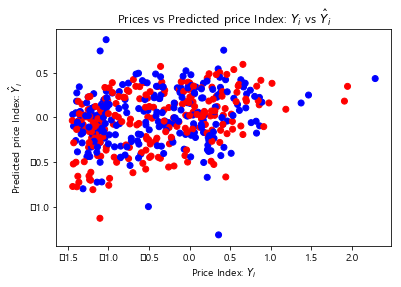

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = model.predict(X_test)

plt.scatter(y_test, Y_pred, c=("red","blue"))
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [ ]:
y_pred = model.predict(X)
df = pd.DataFrame({
    '예측값' : y_pred,
    '실제y' : y
})
df.head()

예측값       실제y
0  0.381288  1.115949
1  0.626445  1.212639
2  0.552680  1.253351
3  0.447466  1.243173
4  0.543575  1.344952

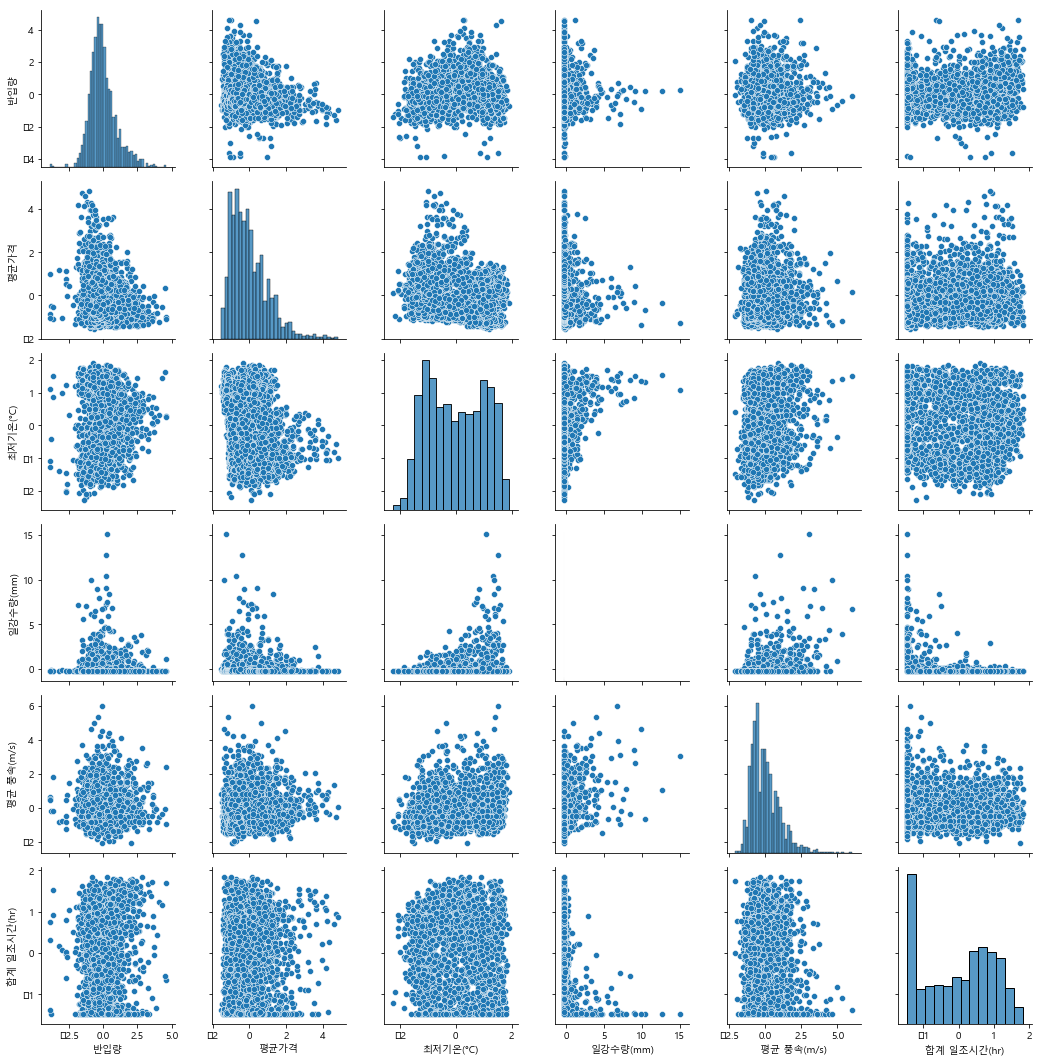

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.pairplot(std_data)
plt.show()

## Tensorflow 다중회귀

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_excel('/content/고추_특.xlsx')
data.head()

일자    반입량   평균가격  ...  합계 일조시간(hr)  평균 지면온도(°C)    유가 전국평균가격
0 2013-01-03  45380  82730  ...          8.9         -2.9  1927.557647
1 2013-01-04  22930  81353  ...          8.9         -3.5  1928.578235
2 2013-01-05  24350  74630  ...          6.9         -3.5  1928.207647
3 2013-01-07  34110  78285  ...          5.6         -3.1  1927.256471
4 2013-01-08  12780  68329  ...          7.8         -3.1  1928.202353

[5 rows x 11 columns]

In [ ]:
# data = data.filter(['반입량', '평균가격', '일강수량(mm)', '최저기온(°C)', '평균 상대습도(%)', '평균 풍속(m/s)', '합계 일조시간(hr)'])
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
# train_dataset.drop(['일자','합계 일조시간(hr)', '평균 5cm 지중온도(°C)', '유가 전국평균가격', '평균 지면온도(°C)','최고기온(°C)'], axis=1, inplace=True)
# test_dataset.drop(['일자','합계 일조시간(hr)', '평균 5cm 지중온도(°C)', '유가 전국평균가격', '평균 지면온도(°C)','최고기온(°C)'], axis=1, inplace=True)
train_dataset.drop(['일자'], axis=1, inplace=True)
test_dataset.drop(['일자'], axis=1, inplace=True)


In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("평균가격")
train_stats = train_stats.transpose()
train_stats

count          mean  ...           75%           max
반입량          1675.0  23440.629254  ...  31875.000000  91251.000000
최저기온(°C)     1675.0      4.796179  ...     14.900000     25.900000
최고기온(°C)     1675.0     17.458030  ...     26.650000     39.400000
일강수량(mm)     1675.0      2.999642  ...      0.500000    130.000000
평균 풍속(m/s)   1675.0      1.513552  ...      1.900000      6.200000
평균 상대습도(%)   1675.0     68.301493  ...     77.800000     95.500000
합계 일조시간(hr)  1675.0      6.002627  ...      9.100000     12.900000
평균 지면온도(°C)  1675.0     13.434269  ...     23.400000     39.500000
유가 전국평균가격    1675.0   1605.593287  ...   1821.004412   1995.734706

[9 rows x 8 columns]

In [ ]:
train_labels = train_dataset.pop('평균가격')
test_labels = test_dataset.pop('평균가격')

In [ ]:
# 
normed_train_data = (train_dataset - np.mean(train_dataset,axis = 0))/ np.std(train_dataset,axis = 0)
normed_test_data = (test_dataset - np.mean(test_dataset,axis = 0))/ np.std(test_dataset,axis = 0)
# train_labels = (train_labels - np.mean(train_labels,axis = 0))/ np.std(train_labels,axis = 0)
# test_labels = (test_labels - np.mean(test_labels,axis = 0))/ np.std(test_labels,axis = 0)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.35638213],
       [ 0.11991191],
       [ 0.32123768],
       [ 0.02893528],
       [ 0.13483357],
       [ 0.15122367],
       [ 0.28796923],
       [-0.03255807],
       [ 0.34295678],
       [ 0.2855476 ]], dtype=float32)

In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss           mae          mse  ...       val_mae      val_mse  epoch
995  442351456.0  15426.386719  442351456.0  ...  16664.634766  491332288.0    995
996  442363264.0  15389.615234  442363264.0  ...  16665.865234  491299136.0    996
997  442281344.0  15399.604492  442281344.0  ...  16662.208984  491333472.0    997
998  442344000.0  15396.231445  442344000.0  ...  16662.980469  491290176.0    998
999  442270688.0  15369.504883  442270688.0  ...  16665.544922  491145024.0    999

[5 rows x 7 columns]

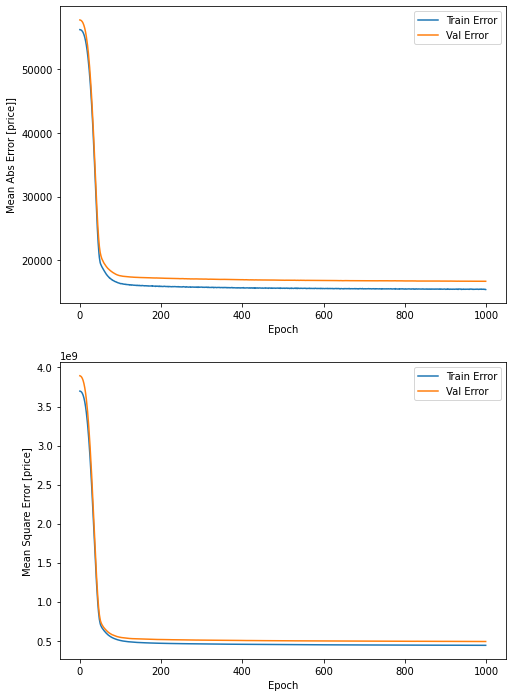

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [price]]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  # plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [price]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  # plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

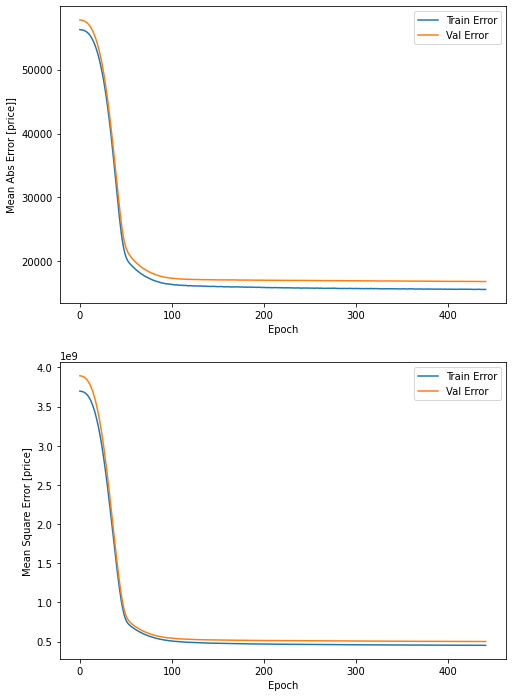

In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} 평균가격".format(mae))

14/14 - 0s - loss: 417857824.0000 - mae: 15610.5088 - mse: 417857824.0000
테스트 세트의 평균 절대 오차: 15610.51 평균가격


In [ ]:
normed_test_data

반입량  최저기온(°C)  최고기온(°C)  ...  합계 일조시간(hr)  평균 지면온도(°C)  유가 전국평균가격
11    0.233565 -1.642139 -1.737980  ...    -1.502662    -1.560754   1.790339
23    0.018874 -0.620533 -0.862157  ...    -0.791560    -1.299590   1.759892
24   -0.124001 -0.913689 -0.692643  ...     0.472623    -1.236550   1.758810
25    0.080106 -0.336260 -0.975166  ...    -1.634348    -1.047431   1.758841
32   -1.316137 -2.210684 -2.152347  ...     0.946691    -1.632800   1.849844
...        ...       ...       ...  ...          ...          ...        ...
2076 -1.638173  0.303355  0.183179  ...    -0.633537     0.105295  -1.374974
2079 -1.638173 -0.220774 -0.089926  ...     0.077566    -0.101835  -1.384325
2080 -1.638173 -0.318493 -0.306528  ...    -1.318302    -0.281949  -1.387569
2085 -1.638173 -0.114171 -0.287693  ...    -1.212954    -0.263937  -1.402180
2091 -1.638173 -0.682717 -0.202936  ...     0.656983    -0.498085  -1.420344

[419 rows x 9 columns]

In [ ]:
test_labels

11       56673
23      106044
24       99393
25      100852
32       60000
         ...  
2076     52538
2079     56052
2080     61792
2085     50636
2091     61817
Name: 평균가격, Length: 419, dtype: int64

In [ ]:
test_predictions

array([15277.698 , 14178.939 , 11022.596 , 13267.754 , 14282.986 ,
       11503.2705, 11967.342 , 12359.01  , 15652.56  , 12551.262 ,
       11899.927 , 11843.393 , 14836.796 , 13836.094 , 14191.139 ,
       16765.26  , 17688.975 , 16886.434 , 17826.248 , 17524.633 ,
       16440.639 , 20473.828 , 17197.21  , 17696.896 , 15875.068 ,
       16480.188 , 18433.473 , 15224.442 , 16694.422 , 16182.94  ,
       17352.48  , 19005.773 , 18600.861 , 10958.33  , 13505.744 ,
       17717.992 , 17928.445 , 15636.19  , 19144.688 , 17003.707 ,
       18094.605 , 16973.713 , 16885.402 , 17208.88  , 18299.332 ,
       19005.05  , 19349.938 , 18883.922 , 18043.988 , 17625.219 ,
       18907.064 , 14128.412 , 12343.349 , 15604.507 , 17903.232 ,
       16252.695 , 10640.912 , 11417.023 , 14076.21  , 17454.652 ,
       14909.092 , 18300.656 , 19500.734 , 18401.043 , 12461.229 ,
       12412.342 , 13230.197 , 11820.047 , 13443.852 , 17259.38  ,
       17937.477 , 16243.271 , 14833.574 , 14440.568 , 14570.8

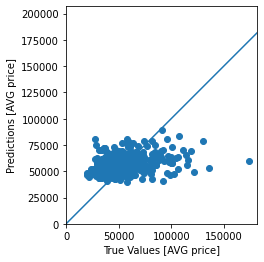

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [AVG price]')
plt.ylabel('Predictions [AVG price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-300000, 300000], [-300000, 300000])


In [ ]:
test_predictions, test_labels

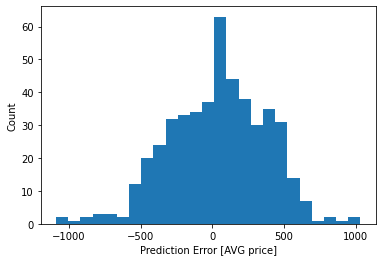

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [AVG price]")
_ = plt.ylabel("Count")

## RandomForestRegressor



In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 배추_특_반입_경락_시장_날씨_Holy_유가.xlsx to 배추_특_반입_경락_시장_날씨_Holy_유가.xlsx


In [ ]:
dataset = pd.read_excel('/content/고추_상.xlsx')
dataset.head()

dataset = dataset.drop(['일자'], axis=1)

품목명     반입량    품목코드    평균가격  ...  평균 지면온도(°C)  평균 5cm 지중온도(°C)  유무    유가 전국평균가격
0  양파  977000  120100  1190.0  ...          1.5              2.6   0  1496.451765
1  양파  574000  120100  1283.0  ...          3.0              3.4   0  1501.224706
2  양파  592000  120100  1355.0  ...          2.4              2.7   0  1503.653529
3  양파  712000  120100  1387.0  ...          4.6              4.5   0  1505.745294
4  양파  709000  120100  1420.0  ...          3.0              3.5   0  1507.400000

[5 rows x 16 columns]

In [ ]:
y_target = dataset['평균가격']
X_data = dataset.drop(['평균가격'], axis=1, inplace=False)

In [ ]:
normed_train_X_data = (X_data - np.mean(X_data,axis = 0))/ np.std(X_data,axis = 0)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                    test_size=0.2, random_state=150)
print(X_train.shape, X_test.shape)

(1675, 10) (419, 10)


In [ ]:
normed_train_data = (X_train - np.mean(X_train,axis = 0))/ np.std(X_train,axis = 0)
normed_test_data = (X_test - np.mean(X_test,axis = 0))/ np.std(X_test,axis = 0)

In [ ]:
rf.fit(normed_train_data, y_train)
score = rf.score(normed_train_data, y_train)
print('score : ', score)

score :  0.9269995318541591


In [ ]:
scores = cross_val_score(rf, normed_train_data, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.45


In [ ]:
ypred = rf.predict(normed_test_data)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 327381923.67
RMSE: 18093.70


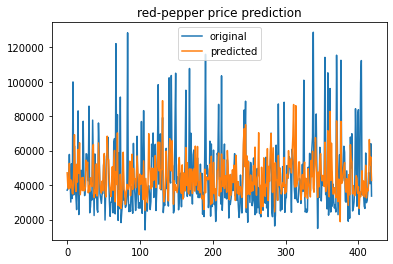

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("red-pepper price prediction")
plt.legend()
plt.show()

In [ ]:
print('5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 교차 검증의 개별 RMSE : ', format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores :  [-4.20123143e+08 -6.01930421e+08 -5.65076149e+08 -2.85896935e+08
 -4.54918814e+08]
5 교차 검증의 개별 RMSE scores :  [20496.91 24534.27 23771.33 16908.49 21328.83]
5 교차 검증의 개별 RMSE :  21407.963881043826


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_

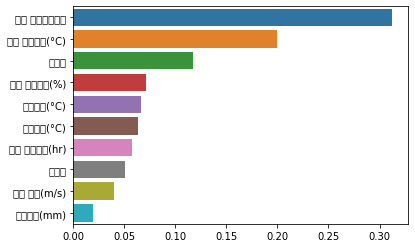

In [ ]:

import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(normed_train_X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=normed_train_X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

## XgboostRegressor

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 고추_상.xlsx to 고추_상.xlsx


In [ ]:
dataset = pd.read_excel('/content/고추_상.xlsx')
dataset.head()

일자    반입량   평균가격  ...  합계 일조시간(hr)  평균 지면온도(°C)    유가 전국평균가격
0 2013-01-03  45380  76836  ...          8.9         -2.9  1927.557647
1 2013-01-04  22930  73930  ...          8.9         -3.5  1928.578235
2 2013-01-05  24350  68310  ...          6.9         -3.5  1928.207647
3 2013-01-07  34110  67429  ...          5.6         -3.1  1927.256471
4 2013-01-08  12780  61331  ...          7.8         -3.1  1928.202353

[5 rows x 11 columns]

In [ ]:
dataset = dataset.set_index('일자')
y_label = dataset['평균가격']
x_features = dataset.drop('평균가격', axis=1)



In [ ]:
x_features
y_label

일자
2013-01-03    76836
2013-01-04    73930
2013-01-05    68310
2013-01-07    67429
2013-01-08    61331
              ...  
2020-10-27    42082
2020-10-28    46302
2020-10-29    45086
2020-10-30    48760
2020-10-31    46112
Name: 평균가격, Length: 2094, dtype: int64

In [ ]:
# dataset = dataset.set_index('일자')

X_train, X_test, y_train, y_test = train_test_split(x_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(1675, 9) (419, 9)


In [ ]:
normed_train_data = (X_train - np.mean(X_train,axis = 0))/ np.std(X_train,axis = 0)
normed_test_data = (X_test - np.mean(X_test,axis = 0))/ np.std(X_test,axis = 0)

In [ ]:
dataset.columns

Index(['반입량', '평균가격', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일조시간(hr)', '평균 지면온도(°C)', '유가 전국평균가격'],
      dtype='object')

In [ ]:
kf = KFold(n_splits=3, random_state=40, shuffle=True)
folds = list(kf.split(x_features))

In [ ]:
# dtrain = xgb.DMatrix(data=X_train, label=y_train)
# dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
model = xgb.XGBRegressor(learning_rate=0.1,
                             max_depth=5,
                             n_estimators=100)

In [ ]:
model.fit(normed_train_data, y_train)
score = model.score(normed_train_data, y_train)
print('score : ', score)

[05:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score :  0.824480217674067


In [ ]:
scores = cross_val_score(model, normed_train_data, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

[05:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, normed_train_data, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[05:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
ypred = model.predict(normed_test_data)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 349133067.57
RMSE: 18685.10


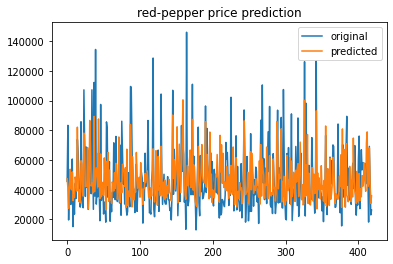

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("red-pepper price prediction")
plt.legend()
plt.show()

# 소비자가격 데이터 전처리

## 시장 데이터

In [ ]:
import pandas as pd
import numpy as np
import glob
import sys
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 서울시장
서울시장 = pd.read_excel('C:/Users/Think/Downloads/최종/서울전역시장마트데이터(구분포함,23월포함).xlsx')

서울시장_무 = 서울시장[(서울시장['구분']=='시장') & (서울시장['품목']=='무')]
서울시장_배추 = 서울시장[(서울시장['구분']=='시장') & (서울시장['품목']=='배추')]
서울시장_양파 = 서울시장[(서울시장['구분']=='시장') & (서울시장['품목']=='양파')]

In [ ]:
서울시장_배추.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14512 entries, 2 to 135475
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   조사일     14512 non-null  datetime64[ns]
 1   품목      14512 non-null  object        
 2   단위      14420 non-null  object        
 3   가격      14512 non-null  int64         
 4   비고      10329 non-null  object        
 5   지역구     14512 non-null  object        
 6   장소      14512 non-null  object        
 7   구분      14512 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1020.4+ KB


In [ ]:
서울시장_무 = pd.DataFrame(서울시장_무.groupby(['조사일'])['가격'].mean())
서울시장_배추 = pd.DataFrame(서울시장_배추.groupby(['조사일'])['가격'].mean())
서울시장_양파 = pd.DataFrame(서울시장_양파.groupby(['조사일'])['가격'].mean())

서울시장_무.reset_index(inplace=True)
서울시장_배추.reset_index(inplace=True)
서울시장_양파.reset_index(inplace=True)
서울시장_양파.head()

조사일           가격
0 2017-01-02  3032.173913
1 2017-01-04  2166.666667
2 2017-01-05  3183.571429
3 2017-01-09  3233.478261
4 2017-01-11  2900.000000

In [ ]:
서울날씨 = pd.read_excel('C:/Users/Think/Downloads/최종/seoul_weather.xlsx')
서울날씨.head()

일시  최저기온(°C)  최고기온(°C)  일강수량(mm)  최대 풍속(m/s)  평균 풍속(m/s)  \
0 2013-01-01      -8.7       0.0       3.1         5.8         3.2   
1 2013-01-02     -15.1      -4.8       0.0         7.8         4.2   
2 2013-01-03     -16.4      -9.3       0.0         5.0         2.8   
3 2013-01-04     -14.8      -5.8       0.0         4.3         1.8   
4 2013-01-05     -12.1      -1.2       0.0         4.6         2.3   

   평균 상대습도(%)  합계 일조시간(hr)  평균 지면온도(°C)  평균 5cm 지중온도(°C)  
0        73.5          4.6         -1.9             -1.7  
1        40.8          9.1         -1.8             -1.7  
2        42.8          9.1         -3.6             -3.4  
3        44.3          9.2         -3.8             -3.5  
4        59.4          7.5         -3.1             -2.9

In [ ]:
# 반입량
배추_반입량 = pd.read_excel('C:/Users/Think/Downloads/최종/배추 반입량(2017~20201031).xlsx')
양파_반입량 = pd.read_excel('C:/Users/Think/Downloads/최종/양파 반입량(2017~20201031).xlsx')
무_반입량 = pd.read_excel('C:/Users/Think/Downloads/최종/무 반입량(2017~20201031).xlsx')
양파_반입량.head()

거래일자 품목명     반입량    품목코드
0  20170103  양파  977000  120100
1  20170104  양파  574000  120100
2  20170105  양파  592000  120100
3  20170106  양파  712000  120100
4  20170107  양파  709000  120100

In [ ]:
# 경락가
무_상 = pd.read_excel('C:/Users/Think/Downloads/최종/무_상.xlsx')
무_특 = pd.read_excel('C:/Users/Think/Downloads/최종/무_특.xlsx')
무_상 = 무_상.drop(['평균가격'],axis=1,inplace=False)
무_상 = 무_상.rename(columns={'가격' : '평균가격'}, inplace=False)
무_특 = 무_특.drop(['평균가격'],axis=1,inplace=False)
무_특 = 무_특.rename(columns={'가격' : '평균가격'}, inplace=False)

배추_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/배추(상) 경락가 통합2013-2020.xlsx')
배추_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/배추(특) 경락가 통합2013-2020.xlsx')
양파_상 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/양파(상) 경락가 통합2013-2020.xlsx')
양파_특 = pd.read_excel('C:/Users/Think/Downloads/반입량 데이터/2013-2020 경락가/양파(특) 경락가 통합2013-2020.xlsx')

In [ ]:
무_특

일자    평균가격
0    2013-01-03  664.10
1    2013-01-04  749.20
2    2013-01-05  715.60
3    2013-01-07  602.05
4    2013-01-08  579.45
...         ...     ...
2387 2020-10-27  671.75
2388 2020-10-28  643.20
2389 2020-10-29  629.25
2390 2020-10-30  631.75
2391 2020-10-31  601.95

[2392 rows x 2 columns]

In [ ]:
Holiday = pd.read_excel('C:/Users/Think/Downloads/최종/holiday.xlsx')
Holiday.head()

일자  유무
0 2013-01-01   0
1 2013-01-02   0
2 2013-01-03   0
3 2013-01-04   0
4 2013-01-05   0

In [ ]:
유가정보 = pd.read_excel('C:/Users/Think/Downloads/최종/주유소_평균판매가격.xlsx')
유가정보.tail()

일자    유가 전국평균가격
2882 2020-11-22  1318.300000
2883 2020-11-23  1318.422353
2884 2020-11-24  1318.726471
2885 2020-11-25  1319.401176
2886 2020-11-26  1320.815882

In [ ]:
# 반입량 데이터도 일자 변환해주기

in_data = [무_반입량, 배추_반입량, 양파_반입량]
# in_data = [배추_반입량, 양파_반입량]

for i in in_data:
    i['거래일자'] = i.거래일자.astype(str)
    i['거래일자'] = pd.to_datetime(i['거래일자'])
    i.rename(columns={'거래일자' : '일자'}, inplace=True)
# for i in in_data:
#     i['일자'] = i.일자.astype(str)
#     i['일자'] = pd.to_datetime(i['일자'])

# 기상 데이터도 일자 변환해주기
weather_list = [서울날씨]

# print(weather_list)
for i in weather_list:
    i['일시'] = i.일시.astype(str)
    i['일시'] = pd.to_datetime(i['일시'])
    i.rename(columns={'일시' : '일자'}, inplace=True)
#     i.drop(['지점', '지점명'], axis=1, inplace=True)


# 가격데이터 일자 컬럼 -> 날짜데이터로 변환
in_data_sang = [서울시장_무, 서울시장_배추, 서울시장_양파]
# in_data_sang = [서울시장_배추, 서울시장_양파]


for i in in_data_sang:
    i['조사일'] = i.조사일.astype(str)
    i['조사일'] = pd.to_datetime(i['조사일'])
    i.rename(columns={'조사일' : '일자'}, inplace=True)
# for i in in_data_top:
#     i['일자'] = i.일자.astype(str)
#     i['일자'] = pd.to_datetime(i['일자'])

# 경락가
경락_list_상 = [무_상, 배추_상, 양파_상]
# 경락_list_상 = [배추_상, 양파_상]
경락_list_특 = [무_특, 배추_특, 양파_특]
# 경락_list_특 = [배추_특, 양파_특]

in_data_sang = [서울시장_무, 서울시장_배추, 서울시장_양파]
# in_data_sang = [서울시장_배추, 서울시장_양파]

for i in 경락_list_상:
    i['일자'] = i.일자.astype(str)
    i['일자'] = pd.to_datetime(i['일자'])
    
for i in 경락_list_특:
    i['일자'] = i.일자.astype(str)
    i['일자'] = pd.to_datetime(i['일자'])
    
    
    
# Holiday 유무

Holiday['일자'] = Holiday.일자.astype(str)
Holiday['일자'] = pd.to_datetime(Holiday['일자'])


# 유가정보

유가정보['일자'] = 유가정보.일자.astype(str)
유가정보['일자'] = pd.to_datetime(유가정보['일자'])

### 시장 데이터 + 변수 데이터 합치기

In [ ]:
# 경락가 + 반입량 + 시장가격 합치기
경락_상_list = []
for a,b,c in zip(in_data_sang, in_data, 경락_list_상):
    d = pd.merge(pd.merge(a,b,how='left', on='일자'), c, how='left', on='일자')
    경락_상_list.append(d)

    
경락_특_list = []
for a,b,c in zip(in_data_sang, in_data, 경락_list_특):
    d = pd.merge(pd.merge(a,b,how='left', on='일자'), c, how='left', on='일자')
    경락_특_list.append(d)

In [ ]:
# 경락가 + 반입량 + 시장가격 합치기
무_상_반입_경락_시장 = 경락_상_list[0]
배추_상_반입_경락_시장 = 경락_상_list[1]
양파_상_반입_경락_시장 = 경락_상_list[2]

무_특_반입_경락_시장 = 경락_특_list[0]
배추_특_반입_경락_시장 = 경락_특_list[1]
양파_특_반입_경락_시장 = 경락_특_list[2]

In [ ]:
무_특_반입_경락_시장

일자           가격  품목명       반입량      품목코드     평균가격
0   2017-01-02  2383.913043  NaN       NaN       NaN      NaN
1   2017-01-04  2100.000000    무  545000.0  110100.0  1402.55
2   2017-01-05  2349.512195    무  735000.0  110100.0  1291.05
3   2017-01-09  2384.666667    무  615000.0  110100.0  1086.05
4   2017-01-11  2333.333333    무  559000.0  110100.0   968.70
..         ...          ...  ...       ...       ...      ...
576 2020-10-13  3480.000000    무  688000.0  110100.0   927.40
577 2020-10-15  2719.111111    무  689000.0  110100.0   943.35
578 2020-10-19  2515.777778    무  925000.0  110100.0   813.90
579 2020-10-22  2375.238095    무  642000.0  110100.0   789.05
580 2020-10-26  2505.909091    무  720000.0  110100.0   692.60

[581 rows x 6 columns]

In [ ]:
# 반입량 + 경락가 + 시장가격 dropna
무_상_반입_경락_시장 = 무_상_반입_경락_시장.dropna()
배추_상_반입_경락_시장 = 배추_상_반입_경락_시장.dropna()
양파_상_반입_경락_시장 = 양파_상_반입_경락_시장.dropna()
무_특_반입_경락_시장 = 무_특_반입_경락_시장.dropna()
배추_특_반입_경락_시장 = 배추_특_반입_경락_시장.dropna()
양파_특_반입_경락_시장 = 양파_특_반입_경락_시장.dropna()

In [ ]:
wholesale = pd.read_csv('C:/Users/Think/Downloads/최종/baechu_wholesalePrice.csv', encoding='euc-kr')
wholesale = wholesale[['date','wholesale_price(1kg)']]
wholesale = wholesale.rename(columns={'date' : '일자'}, inplace=False)
wholesale['일자'] = wholesale.일자.astype(str)
wholesale['일자'] = pd.to_datetime(wholesale['일자'])
wholesale.head()

일자  wholesale_price(1kg)
0 2013-01-02                  1300
1 2013-01-03                  1200
2 2013-01-04                  1200
3 2013-01-07                  1300
4 2013-01-08                  1300

In [ ]:
# 반입량 + 경락가 + 시장가격 + 날씨 + holiday + 유가정보 + wholesale(도매)
data_list = []
a_list = [무_상_반입_경락_시장, 무_특_반입_경락_시장, 배추_상_반입_경락_시장, 배추_특_반입_경락_시장, 양파_상_반입_경락_시장, 양파_특_반입_경락_시장]
for delta in a_list:
#     print(delta)
    data = pd.merge(pd.merge(pd.merge(pd.merge(delta,서울날씨, how='left', on='일자'), Holiday, how='left', on='일자'), 유가정보, how='left', on='일자'), wholesale, how='left', on='일자')
    data_list.append(data)

In [ ]:
# 반입 경락 시장 날씨 할리데이 유가 도매 to excel

무_상_반입_경락_시장_날씨_Holy_유가_도매 = data_list[0]
무_특_반입_경락_시장_날씨_Holy_유가_도매 = data_list[1]
배추_상_반입_경락_시장_날씨_Holy_유가_도매 = data_list[2]
배추_특_반입_경락_시장_날씨_Holy_유가_도매 = data_list[3]
양파_상_반입_경락_시장_날씨_Holy_유가_도매 = data_list[4]
양파_특_반입_경락_시장_날씨_Holy_유가_도매 = data_list[5]

무_상_반입_경락_시장_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_시장_날씨_Holy/다른파일/무_상_시장_통합.xlsx', header=True, index=False)
무_특_반입_경락_시장_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_시장_날씨_Holy/다른파일/무_특_시장_통합.xlsx', header=True, index=False)
배추_상_반입_경락_시장_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_시장_날씨_Holy/다른파일/배추_상_시장_통합.xlsx', header=True, index=False)
배추_특_반입_경락_시장_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_시장_날씨_Holy/다른파일/배추_특_시장_통합.xlsx', header=True, index=False)
양파_상_반입_경락_시장_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_시장_날씨_Holy/다른파일/양파_상_시장_통합.xlsx', header=True, index=False)
양파_특_반입_경락_시장_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_시장_날씨_Holy/다른파일/양파_특_시장_통합.xlsx', header=True, index=False)

In [ ]:
무_특_반입_경락_시장_날씨_Holy_유가

일자           가격 품목명       반입량      품목코드     평균가격  최저기온(°C)  \
0   2017-01-04  2100.000000   무  545000.0  110100.0  1402.55       1.0   
1   2017-01-05  2349.512195   무  735000.0  110100.0  1291.05      -0.1   
2   2017-01-09  2384.666667   무  615000.0  110100.0  1086.05      -3.1   
3   2017-01-11  2333.333333   무  559000.0  110100.0   968.70      -9.4   
4   2017-01-12  2412.142857   무  524000.0  110100.0   940.20      -6.1   
..         ...          ...  ..       ...       ...      ...       ...   
468 2020-10-13  3480.000000   무  688000.0  110100.0   927.40       8.6   
469 2020-10-15  2719.111111   무  689000.0  110100.0   943.35       6.5   
470 2020-10-19  2515.777778   무  925000.0  110100.0   813.90       9.8   
471 2020-10-22  2375.238095   무  642000.0  110100.0   789.05       8.4   
472 2020-10-26  2505.909091   무  720000.0  110100.0   692.60       8.0   

     최고기온(°C)  일강수량(mm)  최대 풍속(m/s)  평균 풍속(m/s)  평균 상대습도(%)  합계 일조시간(hr)  \
0         8.9       0.0         4.0         1.7        55.0          8.6   
1         7.3       0.0         5.6         3.1        52.3          0.0   
2         4.3       0.0         5.8         3.3        60.8          6.2   
3         1.5       0.0         5.4         2.1        36.4          9.2   
4         1.0       0.0         6.5         3.1        43.1          8.6   
..        ...       ...         ...         ...         ...          ...   
468      18.4       0.0         4.7         2.2        52.3          7.1   
469      18.5       0.0         3.7         1.5        41.8          7.2   
470      21.3       0.0         3.4         1.7        74.4          9.8   
471      18.2       0.0         5.7         2.8        66.0          5.4   
472      19.0       0.0         4.4         1.6        71.6          9.2   

     평균 지면온도(°C)  평균 5cm 지중온도(°C)  유무    유가 전국평균가격  
0            3.0              3.4   0  1501.224706  
1            2.4              2.7   0  1503.653529  
2            3.6              4.4   0  1509.990588  
3           -2.2             -0.7   0  1513.195882  
4           -0.4              0.4   1  1514.122941  
..           ...              ...  ..          ...  
468         14.2             16.6   0  1335.235294  
469         13.1             15.2   0  1334.100000  
470         14.3             15.8   0  1332.626471  
471         15.2             15.9   0  1330.771765  
472         11.9             13.8   0  1329.245294  

[473 rows x 17 columns]

## 마트 데이터

In [ ]:
서울마트_무 = 서울마트[(서울마트['구분']=='마트') & (서울마트['품목']=='무')]
서울마트_배추 = 서울마트[(서울마트['구분']=='마트') & (서울마트['품목']=='배추')]
서울마트_양파 = 서울마트[(서울마트['구분']=='마트') & (서울마트['품목']=='양파')]

In [ ]:
서울마트_무 = pd.DataFrame(서울마트_무.groupby(['조사일'])['가격'].mean())
서울마트_배추 = pd.DataFrame(서울마트_배추.groupby(['조사일'])['가격'].mean())
서울마트_양파 = pd.DataFrame(서울마트_양파.groupby(['조사일'])['가격'].mean())

서울마트_무.reset_index(inplace=True)
서울마트_배추.reset_index(inplace=True)
서울마트_양파.reset_index(inplace=True)
서울마트_양파.head()

In [ ]:
# 가격데이터 일자 컬럼 -> 날짜데이터로 변환
in_data_sang = [서울마트_무, 서울마트_배추, 서울마트_양파]
# in_data_sang = [서울시장_배추, 서울시장_양파]


for i in in_data_sang:
    i['조사일'] = i.조사일.astype(str)
    i['조사일'] = pd.to_datetime(i['조사일'])
    i.rename(columns={'조사일' : '일자'}, inplace=True)

### 마트 데이터 + 변수 데이터 합치기

In [ ]:
# 경락가 + 반입량 + 시장가격 합치기
경락_상_list = []
for a,b,c in zip(in_data_sang, in_data, 경락_list_상):
    d = pd.merge(pd.merge(a,b,how='left', on='일자'), c, how='left', on='일자')
    경락_상_list.append(d)

    
경락_특_list = []
for a,b,c in zip(in_data_sang, in_data, 경락_list_특):
    d = pd.merge(pd.merge(a,b,how='left', on='일자'), c, how='left', on='일자')
    경락_특_list.append(d)

In [ ]:
# 반입량 + 경락가 + 시장가격
무_상_반입_경락_마트 = 경락_상_list[0]
배추_상_반입_경락_마트 = 경락_상_list[1]
양파_상_반입_경락_마트 = 경락_상_list[2]

무_특_반입_경락_마트 = 경락_특_list[0]
배추_특_반입_경락_마트 = 경락_특_list[1]
양파_특_반입_경락_마트 = 경락_특_list[2]

In [ ]:
# 반입량 + 경락가 + 시장가격 dropna
무_상_반입_경락_마트 = 무_상_반입_경락_마트.dropna()
배추_상_반입_경락_마트 = 배추_상_반입_경락_마트.dropna()
양파_상_반입_경락_마트 = 양파_상_반입_경락_마트.dropna()
무_특_반입_경락_마트 = 무_특_반입_경락_마트.dropna()
배추_특_반입_경락_마트 = 배추_특_반입_경락_마트.dropna()
양파_특_반입_경락_마트 = 양파_특_반입_경락_마트.dropna()

In [ ]:
# 반입량 + 경락가 + 시장가격 + 날씨 + holiday + 유가정보 + wholesale(도매)
data_list = []
a_list = [무_상_반입_경락_마트, 무_특_반입_경락_마트, 배추_상_반입_경락_마트, 배추_특_반입_경락_마트, 양파_상_반입_경락_마트, 양파_특_반입_경락_마트]
for delta in a_list:
#     print(delta)
    data = pd.merge(pd.merge(pd.merge(pd.merge(delta,서울날씨, how='left', on='일자'), Holiday, how='left', on='일자'), 유가정보, how='left', on='일자'), wholesale, how='left', on='일자')
    data_list.append(data)

In [ ]:
# 반입 경락 시장 날씨 할리데이 유가 도매 to excel

무_상_반입_경락_마트_날씨_Holy_유가_도매 = data_list[0]
무_특_반입_경락_마트_날씨_Holy_유가_도매 = data_list[1]
배추_상_반입_경락_마트_날씨_Holy_유가_도매 = data_list[2]
배추_특_반입_경락_마트_날씨_Holy_유가_도매 = data_list[3]
양파_상_반입_경락_마트_날씨_Holy_유가_도매 = data_list[4]
양파_특_반입_경락_마트_날씨_Holy_유가_도매 = data_list[5]

무_상_반입_경락_마트_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_마트_날씨_Holy//무_상_마트_통합.xlsx', header=True, index=False)
무_특_반입_경락_마트_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_마트_날씨_Holy/무_특_마트_통합.xlsx', header=True, index=False)
배추_상_반입_경락_마트_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_마트_날씨_Holy/배추_상_마트_통합.xlsx', header=True, index=False)
배추_특_반입_경락_마트_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_마트_날씨_Holy/배추_특_마트_통합.xlsx', header=True, index=False)
양파_상_반입_경락_마트_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_마트_날씨_Holy/양파_상_마트_통합.xlsx', header=True, index=False)
양파_특_반입_경락_마트_날씨_Holy_유가_도매.to_excel('C:/Users/Think/Downloads/최종/반입_경락_마트_날씨_Holy/양파_특_마트_통합.xlsx', header=True, index=False)


# 소비자 가격 예측



## 6가지 Regression을 통한 소비자 가격 예측

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 양파_특_마트_통합.xlsx to 양파_특_마트_통합.xlsx


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,747 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144793 files and d

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
dataset = pd.read_excel('/content/양파_특_마트_통합.xlsx')
# dataset = pd.merge(dataset, wholesale, how='left', on='일자' )
# dataset.head()
# dataset = pd.read_excel('/content/무_특_반입_경락_시장_날씨_Holy_유가.xlsx')
# dataset = dataset.drop(['일자','품목명','품목코드','유무','평균 5cm 지중온도(°C)','평균 지면온도(°C)','최고기온(°C)','합계 일조시간(hr)','최저기온(°C)'], axis=1)
# dataset = dataset.drop(['일자', '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)', '여부'], axis=1)
# dataset = dataset[['도매가격', '100g가격', '유가 전국평균가격', '평균 풍속(m/s)', '여부', '최고기온(°C)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)', '일강수량(mm)', '반입량']]
# dataset = dataset.drop(['일자','Unnamed: 0'], axis=1)
dataset = dataset.drop(['일자'], axis=1)
dataset = dataset.dropna()
dataset.head()
# dataset.corr()

가격     반입량  경락가가격  ...  유무    유가 전국평균가격    도매가격
0  3320.000000  574000   1283  ...   0  1501.224706  1000.0
1  3286.071429  592000   1355  ...   0  1503.653529  1000.0
2  3318.709677  698000   1431  ...   0  1509.990588   900.0
3  3320.000000  761000   1377  ...   0  1513.195882  1000.0
4  3531.035714  845000   1347  ...   1  1514.122941  1000.0

[5 rows x 15 columns]

In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   가격               444 non-null    float64
 1   반입량              444 non-null    int64  
 2   경락가가격            444 non-null    int64  
 3   최저기온(°C)         444 non-null    float64
 4   최고기온(°C)         444 non-null    float64
 5   일강수량(mm)         444 non-null    float64
 6   최대 풍속(m/s)       444 non-null    float64
 7   평균 풍속(m/s)       444 non-null    float64
 8   평균 상대습도(%)       444 non-null    float64
 9   합계 일조시간(hr)      444 non-null    float64
 10  평균 지면온도(°C)      444 non-null    float64
 11  평균 5cm 지중온도(°C)  444 non-null    float64
 12  유무               444 non-null    int64  
 13  유가 전국평균가격        444 non-null    float64
 14  도매가격             444 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 55.5 KB


In [ ]:
# 변수들의 describe
train_stats = dataset.describe()
train_stats.pop("가격")
train_stats = train_stats.transpose()
train_stats

count           mean  ...            75%           max
반입량              444.0  794069.819820  ...  897250.000000  1.587000e+06
경락가가격            444.0    1041.144144  ...    1289.250000  2.127000e+03
최저기온(°C)         444.0       9.903153  ...      19.725000  3.030000e+01
최고기온(°C)         444.0      18.846171  ...      27.725000  3.960000e+01
일강수량(mm)         444.0       4.107658  ...       0.500000  1.445000e+02
최대 풍속(m/s)       444.0       4.469595  ...       5.300000  8.500000e+00
평균 풍속(m/s)       444.0       2.045495  ...       2.400000  4.200000e+00
평균 상대습도(%)       444.0      58.926351  ...      68.825000  9.700000e+01
합계 일조시간(hr)      444.0       6.975676  ...      10.100000  1.360000e+01
평균 지면온도(°C)      444.0      15.974324  ...      26.250000  4.010000e+01
평균 5cm 지중온도(°C)  444.0      15.303378  ...      24.800000  3.400000e+01
유무               444.0       0.090090  ...       0.000000  1.000000e+00
유가 전국평균가격        444.0    1498.262489  ...    1553.895294  1.692826e+03
도매가격             444.0     895.731982  ...    1085.000000  2.760000e+03

[14 rows x 8 columns]

In [ ]:
# 시장가격에 경우
y_target = dataset['가격']
X_data = dataset.drop(['가격'], axis=1, inplace=False)

print(X_data)
print(y_target)
# 마트가격에 경우
# y_target = dataset['마트']
# X_data = dataset.drop(['마트'], axis=1, inplace=False)

        반입량  경락가가격  최저기온(°C)  ...  유무    유가 전국평균가격    도매가격
0    574000   1283       1.0  ...   0  1501.224706  1000.0
1    592000   1355      -0.1  ...   0  1503.653529  1000.0
2    698000   1431      -3.1  ...   0  1509.990588   900.0
3    761000   1377      -9.4  ...   0  1513.195882  1000.0
4    845000   1347      -6.1  ...   1  1514.122941  1000.0
..      ...    ...       ...  ...  ..          ...     ...
457  948000   1326       8.6  ...   0  1335.235294  1110.0
458  758000   1287       6.5  ...   0  1334.100000  1060.0
459  607000   1287       9.8  ...   0  1332.626471   850.0
460  566000   1322       8.4  ...   0  1330.771765   720.0
461  758000   1310       8.0  ...   0  1329.245294   680.0

[444 rows x 14 columns]
0      3320.000000
1      3286.071429
2      3318.709677
3      3320.000000
4      3531.035714
          ...     
457    3980.000000
458    3983.750000
459    4067.741935
460    4105.937500
461    4150.000000
Name: 가격, Length: 444, dtype: float64


In [ ]:
# train_test_split 활용
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.15, random_state=140)
print(X_train.shape, X_test.shape)

(377, 14) (67, 14)


In [ ]:
# KFold 활용
kf = KFold(n_splits=5)

In [ ]:

# 검증해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  model.fit(X_data, y_target)
  score = model.score(X_data, y_target)
  kf_cv_scores = cross_val_score(model, X_data, y_target, cv=3 )
  print('#### ', model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
  print('score : ', score)
  print("K-fold CV scores : {}" .format(kf_cv_scores))
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
# 모델 생성 및 예측
lm_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(colsample_bytree = 0.5, 
                       gamma = 0.1,
                       learning_rate = 0.1,
                       max_depth = 3,
                       min_child_weight = 5,
                       n_estimators = 100,
                       objective = 'reg:squarederror',
                       subsample = 0.5)
lgb_reg = LGBMRegressor(n_estimators=1000)


models = [lm_reg, dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  LinearRegression  ####
 5 교차 검증의 평균 RMSE : 356.057 
score :  0.6582195513088132
K-fold CV scores : [0.63855151 0.71721392 0.50982055]
K-fold CV average score: 0.62
####  DecisionTreeRegressor  ####
 5 교차 검증의 평균 RMSE : 358.952 
score :  0.7529863446085929
K-fold CV scores : [0.5869627  0.70602272 0.54565134]
K-fold CV average score: 0.61
####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 290.146 
score :  0.9662357777067638
K-fold CV scores : [0.70867996 0.836679   0.6932659 ]
K-fold CV average score: 0.75
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 302.450 
score :  0.9999608681085316
K-fold CV scores : [0.68704037 0.80718426 0.6804585 ]
K-fold CV average score: 0.72
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 296.876 
score :  0.9098047932491293
K-fold CV scores : [0.71086536 0.81892595 0.69875757]
K-fold CV average score: 0.74
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 299.114 
score :  0.9999547969331316
K-fold CV scores : [0.6716364  0.78006741 0.66343745

### cross_val_score가 가장 잘나온 RandomForestRegression

In [ ]:
ypred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 81467.02
RMSE: 285.42


In [ ]:
# models = [lm_reg, dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


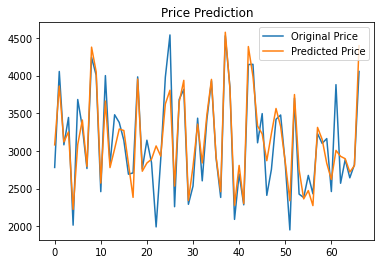

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### 2번째로 좋은 cross_val_score : Xgboost Regression

In [ ]:
ypred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 78040.86
RMSE: 279.36


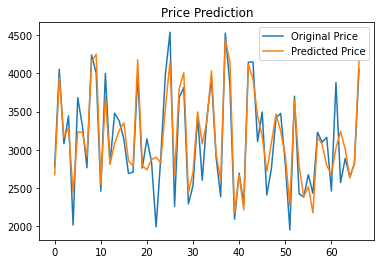

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
  y_test[y_test >= 8500]

Series([], Name: 가격, dtype: float64)

### **Tensorflow Keras 회귀**


In [ ]:
normed_train_data = (X_train - np.mean(X_train,axis = 0))/ np.std(X_train,axis = 0)
normed_test_data = (X_test - np.mean(X_test,axis = 0))/ np.std(X_test,axis = 0)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss         mae           mse  ...     val_mae        val_mse  epoch
995  73026.031250  187.994858  73026.031250  ...  275.882599  129390.039062    995
996  73069.281250  187.202133  73069.281250  ...  275.890503  129632.921875    996
997  72853.179688  187.400650  72853.179688  ...  272.918091  128354.898438    997
998  72978.421875  187.770737  72978.421875  ...  274.185028  129092.882812    998
999  72923.562500  187.802765  72923.562500  ...  275.940826  129864.562500    999

[5 rows x 7 columns]

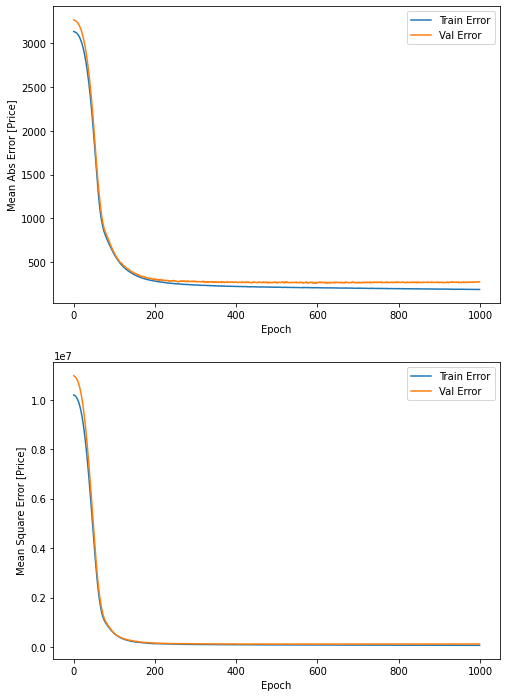

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  # plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Price]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  # plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
...........................................

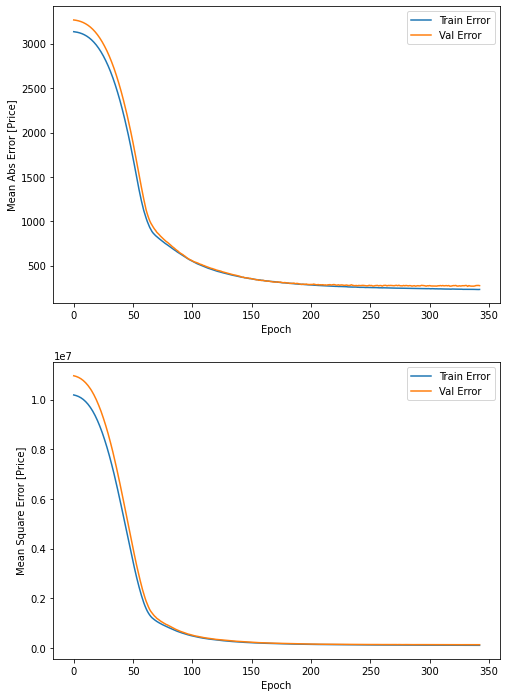

In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} 평균가격".format(mae))

3/3 - 0s - loss: 182852.4062 - mae: 312.5667 - mse: 182852.4062
테스트 세트의 평균 절대 오차: 312.57 평균가격


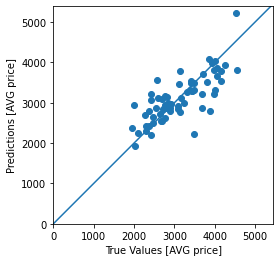

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [AVG price]')
plt.ylabel('Predictions [AVG price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-10000, 10000], [-10000, 10000])


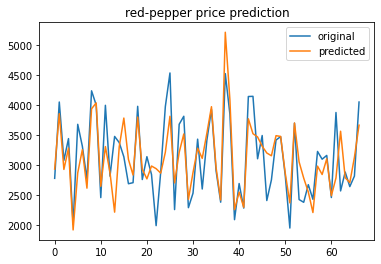

In [ ]:
x_ax = range(len(test_predictions))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, test_predictions, label="predicted")
plt.title("red-pepper price prediction")
plt.legend()
plt.show()

# 소비자가격 실제 예측 진행

## 채소 : 무

### Model Hyper-Parameter

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor


import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 무_마트.xlsx to 무_마트.xlsx


In [ ]:
dataset = pd.read_excel('/content/무_마트.xlsx')
dataset2 = pd.read_excel('/content/무_더미데이터.xlsx')
# dataset = pd.merge(dataset, wholesale, how='left', on='일자' )
# dataset.head()
# dataset = pd.read_excel('/content/무_특_반입_경락_시장_날씨_Holy_유가.xlsx')
# dataset = dataset.drop(['일자','품목명','품목코드','유무','평균 5cm 지중온도(°C)','평균 지면온도(°C)','최고기온(°C)','합계 일조시간(hr)','최저기온(°C)'], axis=1)
# dataset = dataset.drop(['일자', '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)', '여부'], axis=1)
# dataset = dataset[['도매가격', '100g가격', '유가 전국평균가격', '평균 풍속(m/s)', '여부', '최고기온(°C)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)', '일강수량(mm)', '반입량']]

# dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.drop(['Unnamed: 0',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
# dataset = dataset.drop(['일자',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
# dataset = dataset.dropna()
dataset.head()
for_test = dataset2.drop(['일자', '가격'], axis=1)
for_test.head()
# dataset.corr()

반입량  경락가평균가격    유가 전국평균가격  서울평균도매가격  유무  최저기온(°C)  최고기온(°C)  일강수량(mm)
0  319000.0   498.15  1328.495294     460.0   0      -3.6       6.7         0
1  220000.0   496.85  1329.663529     480.0   0       0.5       6.1         0
2  332000.0   611.40  1331.149412     440.0   0      -2.3       4.2         0
3  451000.0   511.10  1333.091765     460.0   0      -4.6       4.4         0
4  433000.0   632.30  1338.520588     520.0   0      -0.7       6.3         0

In [ ]:
dataset3=dataset[['가격','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

dataset3['가격']= np.log1p(dataset3['가격'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
# 더미데이터용

# dataset3=dataset2[['가격예측','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3=dataset2[['경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

# dataset3['가격예측']= np.log1p(dataset3['가격예측'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset2[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset2=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
y_target = dataset['가격']
X_data = dataset.drop(['가격'], axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.15, random_state=140)
print(X_train.shape, X_test.shape)

(377, 8) (67, 8)


In [ ]:
real_test = for_test

In [ ]:
# 검증해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  model.fit(X_data, y_target)
  score = model.score(X_data, y_target)
  kf_cv_scores = cross_val_score(model, X_data, y_target)
  print('#### ', model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
  print('score : ', score)
  print("K-fold CV scores : {}" .format(kf_cv_scores))
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
# models' Hypter Parameter Tuning
def XGBhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        'gamma' : [0.1, 0.2, 0.3, 0.4],

    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def RFRhyperParameterTuning(X_train, y_train):
    param_tuning = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    
    }

    rf_model = RandomForestRegressor()

    gsearch = GridSearchCV(estimator = rf_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_samples' : [10, 20, 30],
        'subsample' : [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['regression'],
        'gamma' : [0.1, 0.2, 0.3],
        'num_leaves' : [6, 8, 10]

    }

    lgbm = LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def GBRhyperParameterTuning(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]

    }

    gb_model = GradientBoostingRegressor()

    gsearch = GridSearchCV(estimator = gb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
xgb_parameter = XGBhyperParameterTuning(X_train, y_train)
xgb_parameter

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:  5.2min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [ ]:
rf_parameter = RFRhyperParameterTuning(X_train, y_train)
rf_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.3min finished


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
lgbm_parameter = LGBMhyperParameterTuning(X_train, y_train)
lgbm_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 11664 out of 11664 | elapsed:  6.5min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_samples': 10,
 'n_estimators': 200,
 'num_leaves': 6,
 'objective': 'regression',
 'subsample': 0.5}

In [ ]:
gbr_parameter = GBRhyperParameterTuning(X_train, y_train)
gbr_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   35.0s finished


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}

### Hyper-Parameter를 기반으로 모델 생성 및 train / test

In [ ]:
# 모델 생성 및 예측

# 0.85
xgb_reg = XGBRegressor(colsample_bytree = 0.7, 
                       gamma = 0.2,
                       learning_rate = 0.03,
                       max_depth = 7,
                       min_child_weight = 1,
                       n_estimators = 500,
                       objective = 'reg:squarederror',
                       subsample = 0.5)

# 0.82
rf_reg = RandomForestRegressor(random_state=0, 
                               bootstrap = [True],
                               max_depth = 10,
                               max_features = 3,
                               min_samples_leaf = 3,
                               min_samples_split = 8,
                               n_estimators = 200
                               )
# 0.85
lgb_reg = LGBMRegressor(colsample_bytree = 0.7,
                        gamma = 0.1,
                        learning_rate = 0.03,
                        max_depth = 5,
                        min_child_samples = 10,
                        n_estimators = 500,
                        num_leaves =6,
                        objective = 'regression',
                        subsample = 0.5)

# 0.84
gb_reg = GradientBoostingRegressor(random_state=0, 
                                   learning_rate=0.1,
                                   max_depth=5,
                                   n_estimators=200,
                                   subsample=0.7
                                   )


models = [rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 254.641 
score :  0.9312507630103111
K-fold CV scores : [0.7802591  0.82028944 0.86943602 0.82244983 0.8229489 ]
K-fold CV average score: 0.82
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 242.681 
score :  0.9995026275471233
K-fold CV scores : [0.81896862 0.8205781  0.87259146 0.83349061 0.85618799]
K-fold CV average score: 0.84
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 236.115 
score :  0.9988911295424379
K-fold CV scores : [0.80510509 0.82460234 0.88968432 0.85166347 0.86657401]
K-fold CV average score: 0.85
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 235.085 
score :  0.9582872337551962
K-fold CV scores : [0.835807   0.82577735 0.89742552 0.84279622 0.84348501]
K-fold CV average score: 0.85


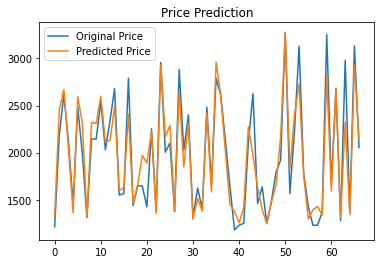

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 진행

In [ ]:
# VotingRegressor 해보기
er = VotingRegressor([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])
y_pred = er.fit(X_train, y_train).predict(X_test)
y_pred

array([1339.53427013, 2441.36072666, 2644.21822489, 2079.81976437,
       1352.1719064 , 2594.96813722, 2352.6020207 , 1362.65869618,
       2291.39900748, 2386.98255723, 2543.49946785, 2082.55090395,
       2255.80893994, 2464.60110158, 1571.33360494, 1671.69946917,
       2381.67516522, 1436.50697508, 1579.41272993, 2062.72026024,
       1920.21032952, 2282.99878031, 1347.34780382, 2768.28943167,
       2141.7932429 , 2238.19619192, 1434.51218383, 2439.63263487,
       2112.99425506, 2338.27376445, 1316.71476379, 1501.3458159 ,
       1369.12723744, 2488.48090026, 1543.23626795, 2845.19743027,
       2566.40524777, 2120.04834784, 1419.98485508, 1387.47667899,
       1283.21203482, 1403.15570758, 2312.02136244, 1989.46527014,
       1608.57778428, 1435.88280404, 1283.29791467, 1429.15526979,
       1619.52100235, 2287.94395702, 3310.35167373, 1856.81331243,
       2324.87251217, 2724.06746386, 1719.55694082, 1351.76049693,
       1399.72267272, 1414.62206222, 1378.1414808 , 2806.36202

{'XGBRegressor': [      Value    Feature
  0  0.026677   일강수량(mm)
  1  0.030980        반입량
  2  0.037230   최고기온(°C)
  3  0.045654   최저기온(°C)
  4  0.055686         유무
  5  0.081455  유가 전국평균가격
  6  0.193340    경락가평균가격
  7  0.528978   서울평균도매가격]}

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('보팅 회귀 모델 최종 RMSE : ', rmse)

보팅 회귀 모델 최종 RMSE :  214.95321380556527


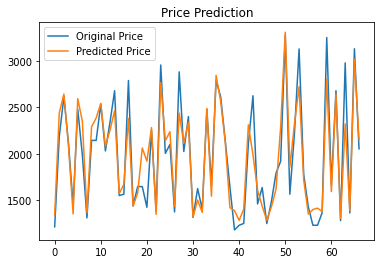

In [ ]:
# 보팅 모델 그래프
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, y_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 보팅 모델 Score 0.85
models = [er]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  VotingRegressor  ####
 5 교차 검증의 평균 RMSE : 233.257 
score :  0.9848524859022377
K-fold CV scores : [0.82592208 0.83414184 0.89234973 0.8459782  0.86065979]
K-fold CV average score: 0.85


### StackingRegressor 진행

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
# 스태킹 해보기 (simple Version)
from sklearn.ensemble import StackingRegressor
estimators= ([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])

In [ ]:
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))

In [ ]:
reg_pred = reg.fit(X_train, y_train).predict(X_test)
reg_pred

array([1332.76278769, 2549.04224604, 2764.86041667, 2140.82619048,
       1268.54159979, 2555.45477151, 1995.0090312 , 1294.22527473,
       2217.80769231, 1931.63546798, 2466.21451613, 2004.90899471,
       2299.62757296, 2382.82625661, 1559.35022605, 1548.74519837,
       2278.44428453, 1472.97708333, 1494.51338326, 1981.70714286,
       1963.14657258, 2312.43377644, 1282.84921439, 2968.25042563,
       2079.25187922, 2345.60921987, 1436.19626323, 2319.92190476,
       2272.59898952, 2013.172622  , 1368.35599078, 1441.8345976 ,
       1448.32272325, 2340.43070292, 1550.47592593, 2791.33525538,
       2391.69288793, 2356.11607143, 1334.05162441, 1176.58759733,
       1383.03062397, 1298.88183498, 2130.26157982, 1995.41524676,
       1658.63331413, 1418.95574223, 1384.64039939, 1467.46596361,
       1652.56428571, 2183.1888751 , 3277.86949072, 2105.25528034,
       2651.16625   , 2496.00271164, 1644.41293103, 1344.94750502,
       1369.44380587, 1325.2172427 , 1329.81799858, 2893.42582

In [ ]:
# cross_val_score로 확인하기 0.81
models = [reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  StackingRegressor  ####
 5 교차 검증의 평균 RMSE : 264.039 
score :  0.9587283856540723
K-fold CV scores : [0.74979656 0.76624241 0.85415315 0.83701528 0.8362484 ]
K-fold CV average score: 0.81


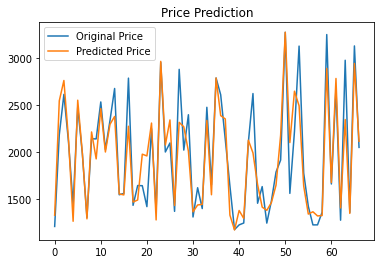

In [ ]:
# 스태킹 모델로 그래프 그리기
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, reg_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 스태킹 kfold로 나눠서 해보기
rf_final = RandomForestRegressor(n_estimators=10, random_state=100)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, ' model 시작')
    
  for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
      #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
      print('\t 폴드 세트: ',folder_counter,' 시작 ')
      X_tr = X_train_n[train_index] 
      y_tr = y_train_n[train_index] 
      X_te = X_train_n[valid_index]  
      
      #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
      model.fit(X_tr , y_tr)       
      #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
      train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
      #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
      test_pred[:, folder_counter] = model.predict(X_test_n)
          
  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
  
  #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred , test_pred_mean

In [ ]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [ ]:
# CV스태킹 알고리즘 각 모델에 적용
xgb_reg_train, xgb_reg_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 3)
rf_reg_train, rf_reg_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 3)
lgb_reg_train, lgb_reg_test = get_stacking_base_datasets(lgb_reg, X_train_n, y_train_n, X_test_n,  3)    
gb_reg_train, gb_reg_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 3)

# CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
Stack_final_X_train = np.concatenate((xgb_reg_train, rf_reg_train, lgb_reg_train, gb_reg_train), axis=1)
Stack_final_X_test = np.concatenate((xgb_reg_test, rf_reg_test, lgb_reg_test, gb_reg_test), axis=1)

# 메타 모델 학습
rf_final.fit(Stack_final_X_train, y_train)
stack_final = rf_final.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, stack_final)
rmse = np.sqrt(rmse)
print('스태킹 회귀 모델의 최종 RMSE 값은 : ', rmse)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
RandomForestRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LGBMRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
GradientBoostingRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
스태킹 회귀 모델의 최종 RMSE 값은 :  14.66128281582363


In [ ]:
models = [rf_final]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 263.619 
score :  0.9727770405895867
K-fold CV scores : [0.73408136 0.79857115 0.85197578 0.84796132 0.81045495]
K-fold CV average score: 0.81


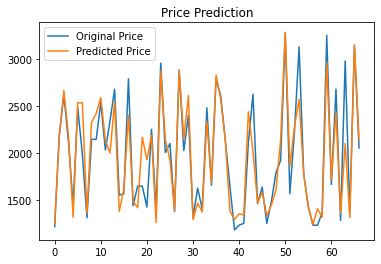

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, stack_final, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 미래 예측값 뽑아내기

In [ ]:
ypred = er.predict(real_test)
dataset2['예측가격'] = y_pred
dataset2['품종'] = '무'
dataset2.to_excel('/content/무_예측.xlsx', header=True, index=False)

### Feature_importance 값들 뽑아내기

In [ ]:
abc = []
for alg in er.named_estimators:
    clf = er.named_estimators[alg]
    a = clf.__class__.__name__
    b = [pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])]
    abc.append({a:b})

# VotingRegression cross_val_score와 가장 유사한 값을 가지는
# 개별 모델에 feature_importance 사용
abc

## 채소 : 배추

### Model Hyper-Parameter

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor


import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 배추_특_마트_통합.xlsx to 배추_특_마트_통합.xlsx


In [ ]:
dataset = pd.read_excel('/content/배추_특_마트_통합.xlsx')
dataset2 = pd.read_excel('/content/배추_더미데이터.xlsx')
# dataset = pd.merge(dataset, wholesale, how='left', on='일자' )
# dataset.head()
# dataset = pd.read_excel('/content/무_특_반입_경락_시장_날씨_Holy_유가.xlsx')
# dataset = dataset.drop(['일자','품목명','품목코드','유무','평균 5cm 지중온도(°C)','평균 지면온도(°C)','최고기온(°C)','합계 일조시간(hr)','최저기온(°C)'], axis=1)
# dataset = dataset.drop(['일자', '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)', '여부'], axis=1)
# dataset = dataset[['도매가격', '100g가격', '유가 전국평균가격', '평균 풍속(m/s)', '여부', '최고기온(°C)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)', '일강수량(mm)', '반입량']]

# dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.drop(['Unnamed: 0',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
# dataset = dataset.drop(['일자',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
dataset = dataset.dropna()
for_test = dataset2.drop(['일자 ','가격'], axis=1)
dataset.head()
for_test.head()
# dataset.corr()

반입량  경락가평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  유무    유가 전국평균가격   도매가격
0  720000.0    434.8      -3.6       6.7         0   0  1328.495294  400.0
1  637000.0    400.9       0.5       6.1         0   0  1329.663529  500.0
2  509000.0    589.7      -2.3       4.2         0   0  1331.149412  540.0
3  856000.0    621.1      -4.6       4.4         0   0  1333.091765  480.0
4  729000.0    489.6      -0.7       6.3         0   0  1338.520588  500.0

In [ ]:
dataset3=dataset[['가격','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

dataset3['가격']= np.log1p(dataset3['가격'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
# 더미데이터용

# dataset3=dataset2[['가격예측','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3=dataset2[['경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

# dataset3['가격예측']= np.log1p(dataset3['가격예측'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset2[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset2=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
y_target = dataset['가격']
X_data = dataset.drop(['가격'], axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.15, random_state=140)
print(X_train.shape, X_test.shape)

(376, 8) (67, 8)


In [ ]:
# 검증해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  model.fit(X_data, y_target)
  score = model.score(X_data, y_target)
  kf_cv_scores = cross_val_score(model, X_data, y_target)
  print('#### ', model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
  print('score : ', score)
  print("K-fold CV scores : {}" .format(kf_cv_scores))
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

### Hyper-Parameter를 기반으로 모델 생성 및 train / test

In [ ]:
# XGBoost Hypter Parameter Tuning
def XGBhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        'gamma' : [0.1, 0.2, 0.3, 0.4],

    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def RFRhyperParameterTuning(X_train, y_train):
    param_tuning = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    
    }

    rf_model = RandomForestRegressor()

    gsearch = GridSearchCV(estimator = rf_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_samples' : [10, 20, 30],
        'subsample' : [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['regression'],
        'gamma' : [0.1, 0.2, 0.3],
        'num_leaves' : [6, 8, 10]

    }

    lgbm = LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def GBRhyperParameterTuning(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]

    }

    gb_model = GradientBoostingRegressor()

    gsearch = GridSearchCV(estimator = gb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
xgb_parameter = XGBhyperParameterTuning(X_train, y_train)
xgb_parameter

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:  5.2min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [ ]:
rf_parameter = RFRhyperParameterTuning(X_train, y_train)
rf_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.3min finished


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
lgbm_parameter = LGBMhyperParameterTuning(X_train, y_train)
lgbm_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 11664 out of 11664 | elapsed:  6.5min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_samples': 10,
 'n_estimators': 200,
 'num_leaves': 6,
 'objective': 'regression',
 'subsample': 0.5}

In [ ]:
gbr_parameter = GBRhyperParameterTuning(X_train, y_train)
gbr_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   35.0s finished


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}

In [ ]:
# 모델 생성 및 예측

xgb_reg = XGBRegressor(colsample_bytree = 0.7, 
                       gamma = 0.4,
                       learning_rate = 0.1,
                       max_depth = 7,
                       min_child_weight = 3,
                       n_estimators = 500,
                       objective = 'reg:squarederror',
                       subsample = 0.7)

rf_reg = RandomForestRegressor(random_state=0, 
                               bootstrap = [True],
                               max_depth = 10,
                               max_features = 3,
                               min_samples_leaf = 3,
                               min_samples_split = 8,
                               n_estimators = 100
                               )

lgb_reg = LGBMRegressor(colsample_bytree = 0.7,
                        gamma = 0.1,
                        learning_rate = 0.1,
                        max_depth = 7,
                        min_child_samples = 10,
                        n_estimators = 200,
                        num_leaves =10,
                        objective = 'regression',
                        subsample = 0.5)

gb_reg = GradientBoostingRegressor(random_state=0, 
                                   learning_rate=0.05,
                                   max_depth=7,
                                   n_estimators=200,
                                   subsample=0.7
                                   )


models = [rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 461.518 
score :  0.926398255574202
K-fold CV scores : [0.88664924 0.81900163 0.83460903 0.82696059 0.78076153]
K-fold CV average score: 0.83
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 420.303 
score :  0.9998246359376985
K-fold CV scores : [0.87946777 0.83213141 0.88681571 0.88830792 0.79534069]
K-fold CV average score: 0.86
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 400.746 
score :  0.9999997008006782
K-fold CV scores : [0.859815   0.889514   0.88772565 0.88759657 0.82098712]
K-fold CV average score: 0.87
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 407.973 
score :  0.9904961206853019
K-fold CV scores : [0.87807296 0.88575996 0.86798084 0.87919243 0.8157661 ]
K-fold CV average score: 0.87


In [ ]:
ypred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

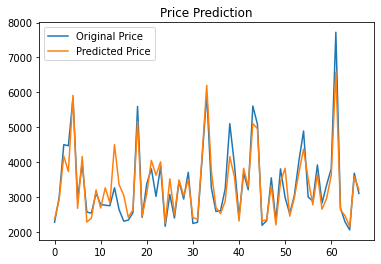

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 진행

In [ ]:
# VotingRegressor 해보기
er = VotingRegressor([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])
y_pred = er.fit(X_train, y_train).predict(X_test)
y_pred

array([2360.33610292, 2985.38514567, 4169.48977607, 3795.72223051,
       5883.71410177, 2746.38423945, 3672.36100641, 2307.44395987,
       2428.56993432, 3262.10901287, 2681.41918779, 3221.30421989,
       2801.967455  , 4311.80215087, 3253.92965956, 2977.79249953,
       2527.38303798, 2583.59966952, 4971.22074599, 2462.58743783,
       3218.58462605, 3965.99948519, 3714.93171629, 4018.87962967,
       2223.80267832, 3417.98135561, 2450.37914427, 3667.41473052,
       3138.46384364, 3605.50411618, 2296.54917808, 2318.94432149,
       4170.00317558, 5921.09784201, 3525.97535466, 2755.33191447,
       2570.81424652, 3006.0669388 , 4026.10306899, 3570.67707295,
       2330.8361514 , 3952.68098091, 3216.15833902, 4930.79600449,
       5049.98220955, 2297.11551499, 2348.46059624, 3323.75501339,
       2168.517705  , 3452.49755339, 3768.67838844, 2480.66127006,
       3022.57322954, 3773.24092369, 4402.33607333, 3578.23604653,
       2867.14551615, 3677.21420584, 2755.74753617, 3160.55259

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('보팅 회귀 모델 최종 RMSE : ', rmse)

보팅 회귀 모델 최종 RMSE :  362.1042914176719


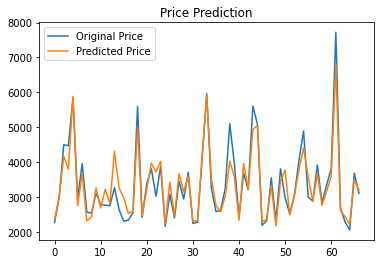

In [ ]:
# 보팅 모델 그래프
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, y_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 보팅 모델 Score 0.59
models = [er]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  VotingRegressor  ####
 5 교차 검증의 평균 RMSE : 396.761 
score :  0.9922701671707076
K-fold CV scores : [0.89453631 0.87442335 0.89101441 0.88210828 0.82209621]
K-fold CV average score: 0.87


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

### StackingRegressor 진행

In [ ]:
# 스태킹 해보기 (simple Version)
from sklearn.ensemble import StackingRegressor
estimators= ([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])

In [ ]:
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))

In [ ]:
reg_pred = reg.fit(X_train, y_train).predict(X_test)
reg_pred

array([2395.72977622, 3072.88355438, 3897.96534839, 4057.25185185,
       6141.45434783, 2797.62114122, 3846.56846449, 2252.34433598,
       2449.16282051, 3362.99962668, 2767.53399907, 3249.09117241,
       2735.39963054, 4175.03607645, 3783.38922294, 2994.86402362,
       2633.81187634, 2711.73704433, 5225.1981746 , 2463.20305419,
       3530.81137351, 3801.65243305, 3464.94036883, 3834.05642491,
       2234.38571429, 4194.64025936, 2269.36      , 3622.08102564,
       3349.66638177, 3482.56050903, 2459.2657037 , 2360.33255428,
       5385.65426215, 5848.69475783, 3490.85948276, 2640.23117132,
       2414.15858595, 2985.33296703, 3702.6892381 , 3682.11448276,
       2333.46344824, 3901.34678836, 3060.02962963, 5312.86542857,
       5467.535     , 2255.41596273, 2390.00777622, 3282.35071009,
       2137.52624704, 3617.65896552, 4121.37037037, 2325.65489655,
       3165.927849  , 4057.25185185, 4273.48199333, 3426.77014778,
       2939.00307389, 3770.66898988, 2813.53090312, 3097.71956

In [ ]:
# cross_val_score로 확인하기
models = [reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  StackingRegressor  ####
 5 교차 검증의 평균 RMSE : 410.987 
score :  0.9786551270876089
K-fold CV scores : [0.87651266 0.90508154 0.82603959 0.90961395 0.77741486]
K-fold CV average score: 0.86


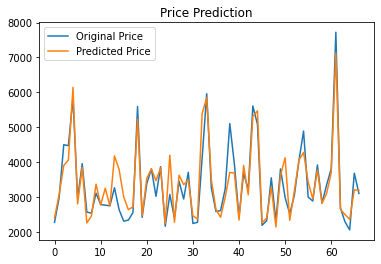

In [ ]:
# 스태킹 모델로 그래프 그리기
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, reg_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 스태킹 kfold로 나눠서 해보기
rf_final = RandomForestRegressor(n_estimators=10, random_state=100)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, ' model 시작')
    
  for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
      #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
      print('\t 폴드 세트: ',folder_counter,' 시작 ')
      X_tr = X_train_n[train_index] 
      y_tr = y_train_n[train_index] 
      X_te = X_train_n[valid_index]  
      
      #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
      model.fit(X_tr , y_tr)       
      #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
      train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
      #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
      test_pred[:, folder_counter] = model.predict(X_test_n)
          
  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
  
  #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred , test_pred_mean

In [ ]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [ ]:
# CV스태킹 알고리즘 각 모델에 적용
xgb_reg_train, xgb_reg_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 3)
rf_reg_train, rf_reg_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 3)
lgb_reg_train, lgb_reg_test = get_stacking_base_datasets(lgb_reg, X_train_n, y_train_n, X_test_n,  3)    
gb_reg_train, gb_reg_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 3)

# CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
Stack_final_X_train = np.concatenate((xgb_reg_train, rf_reg_train, lgb_reg_train, gb_reg_train), axis=1)
Stack_final_X_test = np.concatenate((xgb_reg_test, rf_reg_test, lgb_reg_test, gb_reg_test), axis=1)

# 메타 모델 학습
rf_final.fit(Stack_final_X_train, y_train)
stack_final = rf_final.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, stack_final)
rmse = np.sqrt(rmse)
print('스태킹 회귀 모델의 최종 RMSE 값은 : ', rmse)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
RandomForestRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LGBMRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
GradientBoostingRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
스태킹 회귀 모델의 최종 RMSE 값은 :  19.02903811067895


In [ ]:
models = [rf_final]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 465.493 
score :  0.9695889093454771
K-fold CV scores : [0.85470969 0.81062011 0.83660037 0.85422651 0.77389345]
K-fold CV average score: 0.83


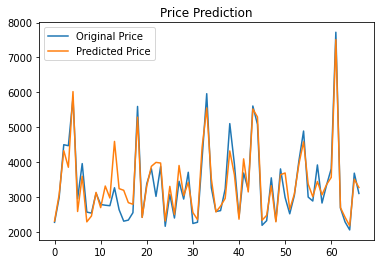

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, stack_final, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 미래 예측값 뽑아내기

In [ ]:
dataset2['예측가격'] = y_pred
dataset2['품종'] = '배추'
dataset2.to_excel('/content/배추_예측.xlsx', header=True, index=False)

### Feature_importance 값들 뽑아내기

In [ ]:
abc = []
for alg in er.named_estimators:
    clf = er.named_estimators[alg]
    a = clf.__class__.__name__
    b = [pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])]
    abc.append({a:b})

# VotingRegression cross_val_score와 가장 유사한 값을 가지는
# 개별 모델에 feature_importance 사용
abc

## 채소 : 양파

### Model Hyper-Parameter

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor


import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 양파_더미데이터.xlsx to 양파_더미데이터.xlsx


In [ ]:
dataset = pd.read_excel('/content/양파_특_마트_통합본.xlsx')
dataset2 = pd.read_excel('/content/양파_더미데이터.xlsx')
# dataset = pd.merge(dataset, wholesale, how='left', on='일자' )
# dataset.head()
# dataset = pd.read_excel('/content/무_특_반입_경락_시장_날씨_Holy_유가.xlsx')
# dataset = dataset.drop(['일자','품목명','품목코드','유무','평균 5cm 지중온도(°C)','평균 지면온도(°C)','최고기온(°C)','합계 일조시간(hr)','최저기온(°C)'], axis=1)
# dataset = dataset.drop(['일자', '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)', '여부'], axis=1)
# dataset = dataset[['도매가격', '100g가격', '유가 전국평균가격', '평균 풍속(m/s)', '여부', '최고기온(°C)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)', '일강수량(mm)', '반입량']]

# dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.drop(['Unnamed: 0',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
# dataset = dataset.drop(['일자',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
dataset = dataset.dropna()
for_test = dataset2.drop(['일자 ','가격'], axis=1)
dataset.head()
for_test.head()
# dataset.corr()

반입량  경락가평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  유무    유가 전국평균가격    도매가격
0  1272000.0   1453.0      -3.6       6.7         0   0  1328.495294  1455.0
1   664000.0   1469.0       0.5       6.1         0   0  1329.663529  1455.0
2  1134000.0   1500.0      -2.3       4.2         0   0  1331.149412  1425.0
3  1219000.0   1521.0      -4.6       4.4         0   0  1333.091765  1445.0
4   519000.0   1666.0      -0.7       6.3         0   0  1338.520588  1425.0

In [ ]:
dataset3=dataset[['가격','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

dataset3['가격']= np.log1p(dataset3['가격'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
# 더미데이터용

# dataset3=dataset2[['가격예측','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3=dataset2[['경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

# dataset3['가격예측']= np.log1p(dataset3['가격예측'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset2[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset2=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
y_target = dataset['가격']
X_data = dataset.drop(['가격'], axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.15, random_state=140)
print(X_train.shape, X_test.shape)

(377, 8) (67, 8)


In [ ]:
# 검증해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  model.fit(X_data, y_target)
  score = model.score(X_data, y_target)
  kf_cv_scores = cross_val_score(model, X_data, y_target)
  print('#### ', model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
  print('score : ', score)
  print("K-fold CV scores : {}" .format(kf_cv_scores))
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

### Hyper-Parameter를 기반으로 모델 생성 및 train / test

In [ ]:
# XGBoost Hypter Parameter Tuning
def XGBhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        'gamma' : [0.1, 0.2, 0.3, 0.4],

    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def RFRhyperParameterTuning(X_train, y_train):
    param_tuning = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    
    }

    rf_model = RandomForestRegressor()

    gsearch = GridSearchCV(estimator = rf_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_samples' : [10, 20, 30],
        'subsample' : [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['regression'],
        'gamma' : [0.1, 0.2, 0.3],
        'num_leaves' : [6, 8, 10]

    }

    lgbm = LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def GBRhyperParameterTuning(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]

    }

    gb_model = GradientBoostingRegressor()

    gsearch = GridSearchCV(estimator = gb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
xgb_parameter = XGBhyperParameterTuning(X_train, y_train)
xgb_parameter

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 1698 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3098 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4898 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:  5.2min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
rf_parameter = RFRhyperParameterTuning(X_train, y_train)
rf_parameter

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.5min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
lgbm_parameter = LGBMhyperParameterTuning(X_train, y_train)
lgbm_parameter

Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 11664 out of 11664 | elapsed:  6.9min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_samples': 10,
 'n_estimators': 200,
 'num_leaves': 8,
 'objective': 'regression',
 'subsample': 0.5}

In [ ]:
gbr_parameter = GBRhyperParameterTuning(X_train, y_train)
gbr_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   36.1s finished


{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}

In [ ]:
# 모델 생성 및 예측

xgb_reg = XGBRegressor(colsample_bytree = 0.7, 
                       gamma = 0.1,
                       learning_rate = 0.01,
                       max_depth = 10,
                       min_child_weight = 3,
                       n_estimators = 500,
                       objective = 'reg:squarederror',
                       subsample = 0.7)

rf_reg = RandomForestRegressor(random_state=0, 
                               bootstrap = [True],
                               max_depth = 10,
                               max_features = 3,
                               min_samples_leaf = 3,
                               min_samples_split = 8,
                               n_estimators = 200
                               )

lgb_reg = LGBMRegressor(colsample_bytree = 0.7,
                        gamma = 0.1,
                        learning_rate = 0.03,
                        max_depth = 7,
                        min_child_samples = 10,
                        n_estimators = 200,
                        num_leaves =8,
                        objective = 'regression',
                        subsample = 0.5)

gb_reg = GradientBoostingRegressor(random_state=0, 
                                   learning_rate=0.01,
                                   max_depth=10,
                                   n_estimators=500,
                                   subsample=0.5
                                   )


models = [rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 283.117 
score :  0.8947755030783713
K-fold CV scores : [0.79818997 0.70711448 0.81368795 0.77979077 0.70838495]
K-fold CV average score: 0.76
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 290.993 
score :  0.995565959645074
K-fold CV scores : [0.76148163 0.69174208 0.81980306 0.75797852 0.71558268]
K-fold CV average score: 0.75
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 284.342 
score :  0.9565547561420801
K-fold CV scores : [0.78063409 0.70417425 0.82481106 0.79802405 0.6805367 ]
K-fold CV average score: 0.76
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 279.774 
score :  0.8927028547407758
K-fold CV scores : [0.78822497 0.7145359  0.81965109 0.80472729 0.70254544]
K-fold CV average score: 0.77


In [ ]:
ypred = lgb_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

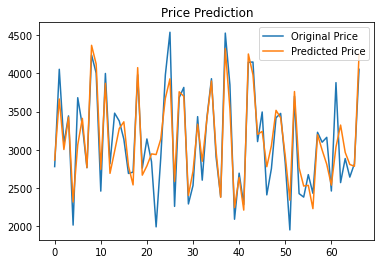

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 진행

In [ ]:
# VotingRegressor 해보기
er = VotingRegressor([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])
y_pred = er.fit(X_train, y_train).predict(X_test)
y_pred

array([2812.69993282, 3633.77106228, 2983.1204058 , 3366.85627259,
       2310.44981483, 3016.11322165, 3381.6181929 , 2749.18293158,
       4231.96935722, 4043.68276501, 2627.70574586, 3862.21635579,
       2722.21496725, 2943.90278252, 3233.99638334, 3335.95593285,
       2796.66665063, 2503.57609519, 4042.79821053, 2719.74748043,
       2847.18456335, 2918.81266164, 2892.36062693, 3001.74896992,
       3679.35178865, 3864.91595526, 2539.31811788, 3686.10012856,
       3642.08866343, 2356.30537312, 2795.18848137, 3344.43922285,
       2812.46909645, 3408.01339896, 3908.27132097, 2984.1005777 ,
       2383.60161359, 4516.50764037, 3611.59097216, 2267.21326682,
       2683.50880882, 2249.57977949, 4221.05008453, 3928.48505506,
       3233.31173491, 3264.05930589, 2707.7078896 , 2934.73724985,
       3516.4123677 , 3407.29364864, 2902.31493485, 2324.68775479,
       3745.46997957, 2727.72604513, 2482.58921946, 2467.98015   ,
       2254.55318986, 3261.68160549, 2996.05856206, 2856.14399

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('보팅 회귀 모델 최종 RMSE : ', rmse)

보팅 회귀 모델 최종 RMSE :  274.2354997001087


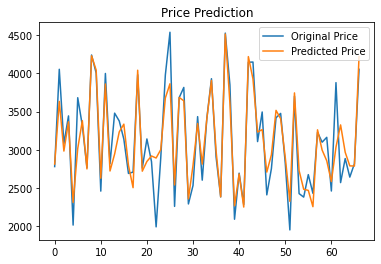

In [ ]:
# 보팅 모델 그래프
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, y_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 보팅 모델 Score 0.59
models = [er]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  VotingRegressor  ####
 5 교차 검증의 평균 RMSE : 277.819 
score :  0.9490059491081669
K-fold CV scores : [0.79103547 0.71237764 0.83117578 0.79764722 0.71720472]
K-fold CV average score: 0.77


### StackingRegressor 진행

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
# 스태킹 해보기 (simple Version)
from sklearn.ensemble import StackingRegressor
estimators= ([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])

In [ ]:
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))

In [ ]:
reg_pred = reg.fit(X_train, y_train).predict(X_test)
reg_pred

array([2774.05381588, 3404.45714286, 2807.4136063 , 3365.97422414,
       2358.11191842, 2870.92485735, 3401.69192552, 2589.73690471,
       4650.69505495, 4031.12982596, 2620.17522065, 4048.85484543,
       2756.51770115, 3001.92210369, 3730.13062678, 3338.61898833,
       2950.32587097, 2358.6432703 , 4060.35754808, 2662.06149602,
       2843.28777295, 2698.21521448, 2857.33978047, 3024.40100518,
       3600.93640212, 3936.25606855, 2221.0040844 , 3940.17040786,
       3677.31837963, 2289.7949269 , 2927.1129207 , 3359.76013684,
       2809.02633535, 3415.05476637, 3936.8583908 , 3031.43627934,
       2365.18086649, 4387.78276353, 3562.83760511, 2376.60392082,
       2924.84099003, 2323.38394317, 4473.3914008 , 4033.68297414,
       3424.90430108, 3164.51975621, 2826.93855016, 2704.55410509,
       3572.46028126, 3380.75592093, 2758.52180862, 2263.50367075,
       3757.70247391, 2872.85482759, 2371.60102336, 2430.07987069,
       2392.85697637, 3441.00451196, 2870.28776418, 2728.24800

In [ ]:
# cross_val_score로 확인하기
models = [reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  StackingRegressor  ####
 5 교차 검증의 평균 RMSE : 306.542 
score :  0.835947300081345
K-fold CV scores : [0.75387167 0.67779922 0.78438931 0.76664964 0.6040661 ]
K-fold CV average score: 0.72


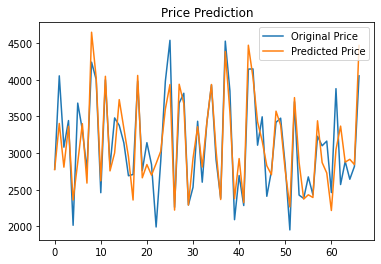

In [ ]:
# 스태킹 모델로 그래프 그리기
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, reg_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 스태킹 kfold로 나눠서 해보기
rf_final = RandomForestRegressor(n_estimators=10, random_state=100)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, ' model 시작')
    
  for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
      #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
      print('\t 폴드 세트: ',folder_counter,' 시작 ')
      X_tr = X_train_n[train_index] 
      y_tr = y_train_n[train_index] 
      X_te = X_train_n[valid_index]  
      
      #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
      model.fit(X_tr , y_tr)       
      #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
      train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
      #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
      test_pred[:, folder_counter] = model.predict(X_test_n)
          
  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
  
  #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred , test_pred_mean

In [ ]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [ ]:
# CV스태킹 알고리즘 각 모델에 적용
xgb_reg_train, xgb_reg_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 3)
rf_reg_train, rf_reg_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 3)
lgb_reg_train, lgb_reg_test = get_stacking_base_datasets(lgb_reg, X_train_n, y_train_n, X_test_n,  3)    
gb_reg_train, gb_reg_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 3)

# CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
Stack_final_X_train = np.concatenate((xgb_reg_train, rf_reg_train, lgb_reg_train, gb_reg_train), axis=1)
Stack_final_X_test = np.concatenate((xgb_reg_test, rf_reg_test, lgb_reg_test, gb_reg_test), axis=1)

# 메타 모델 학습
rf_final.fit(Stack_final_X_train, y_train)
stack_final = rf_final.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, stack_final)
rmse = np.sqrt(rmse)
print('스태킹 회귀 모델의 최종 RMSE 값은 : ', rmse)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
RandomForestRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LGBMRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
GradientBoostingRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
스태킹 회귀 모델의 최종 RMSE 값은 :  16.560057357995735


In [ ]:
models = [rf_final]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 294.030 
score :  0.951480138492524
K-fold CV scores : [0.76263905 0.67859267 0.81305247 0.75395885 0.71153413]
K-fold CV average score: 0.74


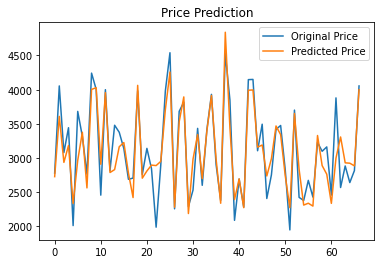

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, stack_final, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 미래 예측값 뽑아내기

In [ ]:
dataset2['예측가격'] = y_pred
dataset2['품종'] = '양파'
dataset2.to_excel('/content/양파_예측.xlsx', header=True, index=False)

### Feature_importance 값들 뽑아내기

In [ ]:
abc = []
for alg in er.named_estimators:
    clf = er.named_estimators[alg]
    a = clf.__class__.__name__
    b = [pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])]
    abc.append({a:b})

# VotingRegression cross_val_score와 가장 유사한 값을 가지는
# 개별 모델에 feature_importance 사용
abc

## 채소 : 오이

### Model Hyper-Parameter

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor


import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 오이_마트.xlsx to 오이_마트.xlsx


In [ ]:
dataset = pd.read_excel('/content/오이_마트.xlsx')
dataset2 = pd.read_excel('/content/오이_더미데이터.xlsx')
# dataset = pd.merge(dataset, wholesale, how='left', on='일자' )
# dataset.head()
# dataset = pd.read_excel('/content/무_특_반입_경락_시장_날씨_Holy_유가.xlsx')
# dataset = dataset.drop(['일자','품목명','품목코드','유무','평균 5cm 지중온도(°C)','평균 지면온도(°C)','최고기온(°C)','합계 일조시간(hr)','최저기온(°C)'], axis=1)
# dataset = dataset.drop(['일자', '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)', '여부'], axis=1)
# dataset = dataset[['도매가격', '100g가격', '유가 전국평균가격', '평균 풍속(m/s)', '여부', '최고기온(°C)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)', '일강수량(mm)', '반입량']]

# dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.drop(['Unnamed: 0',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
# dataset = dataset.drop(['일자',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
dataset = dataset.dropna()
for_test = dataset2.drop(['일자 ','가격'], axis=1)
dataset.head()
for_test.head()
# dataset.corr()

반입량  경락가평균가격  최저기온(°C)  최고기온(°C)  일강수량(mm)  유무    유가 전국평균가격        도매가격
0  111000.0   587.40      -3.6       6.7         0   0  1328.495294  550.000000
1  117000.0   527.57       0.5       6.1         0   0  1329.663529  573.000000
2   79000.0   582.40      -2.3       4.2         0   0  1331.149412  583.000000
3  115000.0   657.13      -4.6       4.4         0   0  1333.091765  568.666667
4  198000.0   659.89      -0.7       6.3         0   0  1338.520588  670.000000

In [ ]:
dataset3=dataset[['가격','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

dataset3['가격']= np.log1p(dataset3['가격'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
# 더미데이터용

# dataset3=dataset2[['가격예측','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3=dataset2[['경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

# dataset3['가격예측']= np.log1p(dataset3['가격예측'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset2[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset2=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
y_target = dataset['가격']
X_data = dataset.drop(['가격'], axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.15, random_state=140)
print(X_train.shape, X_test.shape)

(377, 8) (67, 8)


In [ ]:
# 검증해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  model.fit(X_data, y_target)
  score = model.score(X_data, y_target)
  kf_cv_scores = cross_val_score(model, X_data, y_target)
  print('#### ', model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
  print('score : ', score)
  print("K-fold CV scores : {}" .format(kf_cv_scores))
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

### Hyper-Parameter를 기반으로 모델 생성 및 train / test

In [ ]:
# XGBoost Hypter Parameter Tuning
def XGBhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        'gamma' : [0.1, 0.2, 0.3, 0.4],

    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def RFRhyperParameterTuning(X_train, y_train):
    param_tuning = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    
    }

    rf_model = RandomForestRegressor()

    gsearch = GridSearchCV(estimator = rf_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_samples' : [10, 20, 30],
        'subsample' : [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['regression'],
        'gamma' : [0.1, 0.2, 0.3],
        'num_leaves' : [6, 8, 10]

    }

    lgbm = LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def GBRhyperParameterTuning(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]

    }

    gb_model = GradientBoostingRegressor()

    gsearch = GridSearchCV(estimator = gb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
xgb_parameter = XGBhyperParameterTuning(X_train, y_train)
xgb_parameter

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 366 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 1566 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2466 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3566 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4866 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:  6.0min finished


{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [ ]:
rf_parameter = RFRhyperParameterTuning(X_train, y_train)
rf_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.1min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
lgbm_parameter = LGBMhyperParameterTuning(X_train, y_train)
lgbm_parameter

Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 11664 out of 11664 | elapsed:  7.7min finished


{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 30,
 'n_estimators': 100,
 'num_leaves': 6,
 'objective': 'regression',
 'subsample': 0.5}

In [ ]:
gbr_parameter = GBRhyperParameterTuning(X_train, y_train)
gbr_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   39.7s finished


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [ ]:
# 모델 생성 및 예측

xgb_reg = XGBRegressor(colsample_bytree = 0.5, 
                       gamma = 0.1,
                       learning_rate = 0.03,
                       max_depth = 7,
                       min_child_weight = 5,
                       n_estimators = 200,
                       objective = 'reg:squarederror',
                       subsample = 0.5)

rf_reg = RandomForestRegressor(random_state=0, 
                               bootstrap = [True],
                               max_depth = 10,
                               max_features = 2,
                               min_samples_leaf = 3,
                               min_samples_split = 8,
                               n_estimators = 1000
                               )

lgb_reg = LGBMRegressor(colsample_bytree = 0.5,
                        gamma = 0.1,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_samples = 30,
                        n_estimators = 100,
                        num_leaves =6,
                        objective = 'regression',
                        subsample = 0.5)

gb_reg = GradientBoostingRegressor(random_state=0, 
                                   learning_rate=0.01,
                                   max_depth=5,
                                   n_estimators=200,
                                   subsample=0.5
                                   )


models = [rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 158.550 
score :  0.8122867758789605
K-fold CV scores : [0.6193617  0.65096667 0.48744206 0.63644571 0.58277388]
K-fold CV average score: 0.60
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 163.377 
score :  0.8374013436278641
K-fold CV scores : [0.60034495 0.60900273 0.41033364 0.64973414 0.5811578 ]
K-fold CV average score: 0.57
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 159.716 
score :  0.9017963745703589
K-fold CV scores : [0.60555606 0.65980117 0.47926699 0.65931783 0.52145004]
K-fold CV average score: 0.59
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 162.423 
score :  0.7900011734334789
K-fold CV scores : [0.58295799 0.62121898 0.48314846 0.64882318 0.52458318]
K-fold CV average score: 0.57


In [ ]:
# Average Score 가장 높은 모델활용 0.59 xgboost
ypred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

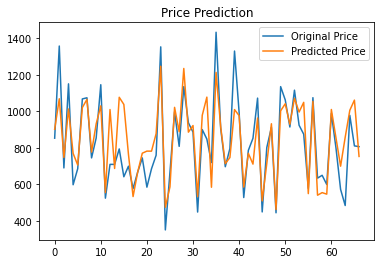

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 진행

In [ ]:
# VotingRegressor 해보기
er = VotingRegressor([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])
y_pred = er.fit(X_train, y_train).predict(X_test)
y_pred

array([ 875.61224704, 1065.07041499,  737.39270826,  980.31860201,
        746.03680043,  703.32509264, 1006.37798021, 1033.93677339,
        786.60115592,  931.18962289, 1037.81109975,  543.02258856,
        988.04643955,  678.67766759, 1100.224941  , 1073.66367853,
        756.42545743,  539.35585989,  672.81013373,  772.84760908,
        787.55297869,  771.19602828,  880.89394105, 1240.0396758 ,
        473.19608695,  583.33952294, 1039.22928571,  920.77306008,
       1229.90120628,  879.10254344,  894.91810039,  505.62236992,
        967.38423887, 1119.18216147,  601.63716098, 1198.28774288,
        905.10643867,  690.72620475,  734.99932802,  994.34368414,
        966.58468513,  536.74695213,  782.673182  ,  715.6472219 ,
        948.17007218,  492.87035557,  710.65518688,  917.17665287,
        452.80963724,  999.14348921, 1090.14340115,  929.28372221,
       1053.57713092,  974.10045443, 1094.45172522,  548.81070512,
       1044.39270834,  531.11320881,  587.09692564,  547.27462

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('보팅 회귀 모델 최종 RMSE : ', rmse)

보팅 회귀 모델 최종 RMSE :  137.86464457151237


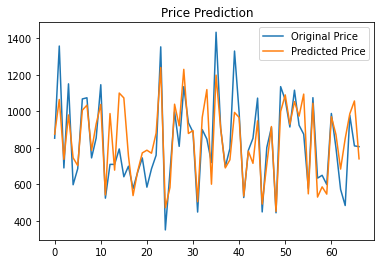

In [ ]:
# 보팅 모델 그래프
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, y_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 보팅 모델 Score 0.59
models = [er]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  VotingRegressor  ####
 5 교차 검증의 평균 RMSE : 158.494 
score :  0.846745229524342
K-fold CV scores : [0.61241745 0.64875997 0.4755571  0.65922976 0.57704981]
K-fold CV average score: 0.59


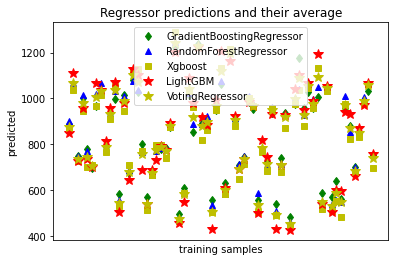

In [ ]:
# votingRegression value predict 하는 방법 시각화
pred1 = gb_reg.predict(X_test)
pred2 = rf_reg.predict(X_test)
pred3 = xgb_reg.predict(X_test)
pred4 = lgb_reg.predict(X_test)
pred5 = er.predict(X_test)


plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='Xgboost')
plt.plot(pred4, 'r*', ms=10, label='LightGBM')
plt.plot(pred5, 'y*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()
# VotingRegression은 개별 모델들의 prediction 값들의 평균을 가져오는 듯 보임.

### StackingRegressor 진행

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
# 스태킹 해보기 (simple Version)
from sklearn.ensemble import StackingRegressor
estimators= ([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])

In [ ]:
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))

In [ ]:
# 이값을 잘 못믿겠습니다
reg.fit(X_train, y_train).score(X_test, y_test)

0.5695893096221164

In [ ]:
reg_pred = reg.fit(X_train, y_train).predict(X_test)
reg_pred

array([ 970.25551541, 1081.64052303,  827.30371071, 1071.07356907,
        736.07529478,  822.41910406, 1091.46420123,  919.42038932,
        718.98943729,  854.07924731, 1035.05190488,  553.67504837,
        868.10269231,  760.44973598, 1066.64175115, 1118.8660074 ,
        876.04900538,  585.24845975,  876.43154688,  785.94950739,
        792.35059006,  800.39313187,  837.88374069, 1463.17354167,
        472.35948718,  583.56643875, 1035.59780315, 1105.73500185,
       1402.73333333, 1252.14049761,  804.59258065,  413.07507246,
        993.85665159, 1107.88290323,  574.70784722, 1511.44791667,
        848.03568434,  707.82520833,  794.28051555,  975.30346929,
       1103.04723342,  539.15020067,  737.75983694,  773.92542241,
       1020.85220245,  316.03225806,  902.7545    ,  775.55013322,
        378.61421744, 1175.1888172 , 1118.4974319 ,  839.06625554,
       1054.59454467, 1137.74409722, 1086.81730769,  563.03806268,
        909.09586481,  564.85358111,  634.25284542,  534.40093

In [ ]:
# cross_val_score로 확인하기
models = [reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  StackingRegressor  ####
 5 교차 검증의 평균 RMSE : 176.571 
score :  0.7305152167966663
K-fold CV scores : [0.66039698 0.56886264 0.35016418 0.55944262 0.25124978]
K-fold CV average score: 0.48


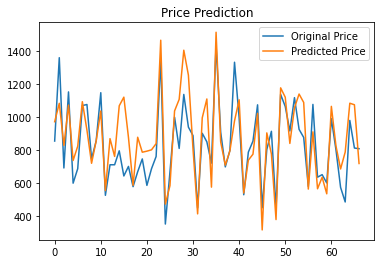

In [ ]:
# 스태킹 모델로 그래프 그리기
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, reg_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 스태킹 kfold로 나눠서 해보기
rf_final = RandomForestRegressor(n_estimators=10, random_state=100)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, ' model 시작')
    
  for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
      #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
      print('\t 폴드 세트: ',folder_counter,' 시작 ')
      X_tr = X_train_n[train_index] 
      y_tr = y_train_n[train_index] 
      X_te = X_train_n[valid_index]  
      
      #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
      model.fit(X_tr , y_tr)       
      #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
      train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
      #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
      test_pred[:, folder_counter] = model.predict(X_test_n)
          
  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
  
  #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred , test_pred_mean

In [ ]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [ ]:
# CV스태킹 알고리즘 각 모델에 적용
xgb_reg_train, xgb_reg_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 3)
rf_reg_train, rf_reg_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 3)
lgb_reg_train, lgb_reg_test = get_stacking_base_datasets(lgb_reg, X_train_n, y_train_n, X_test_n,  3)    
gb_reg_train, gb_reg_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 3)

# CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
Stack_final_X_train = np.concatenate((xgb_reg_train, rf_reg_train, lgb_reg_train, gb_reg_train), axis=1)
Stack_final_X_test = np.concatenate((xgb_reg_test, rf_reg_test, lgb_reg_test, gb_reg_test), axis=1)

# 메타 모델 학습
rf_final.fit(Stack_final_X_train, y_train)
stack_final = rf_final.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, stack_final)
rmse = np.sqrt(rmse)
print('스태킹 회귀 모델의 최종 RMSE 값은 : ', rmse)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
RandomForestRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LGBMRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
GradientBoostingRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
스태킹 회귀 모델의 최종 RMSE 값은 :  11.741577601477255


In [ ]:
models = [rf_final]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 173.852 
score :  0.9284278552918994
K-fold CV scores : [0.53861301 0.58246436 0.36925061 0.59194032 0.47290471]
K-fold CV average score: 0.51


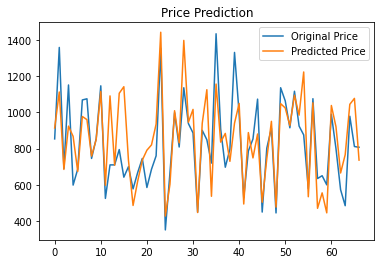

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, stack_final, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 미래 예측값 뽑아내기

In [ ]:
dataset2['예측가격'] = y_pred
dataset2['품종'] = '오이'
dataset2.to_excel('/content/오이_예측.xlsx', header=True, index=False)

### Feature_importance 값들 뽑아내기

In [ ]:
abc = []
for alg in er.named_estimators:
    clf = er.named_estimators[alg]
    a = clf.__class__.__name__
    b = [pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])]
    abc.append({a:b})

# VotingRegression cross_val_score와 가장 유사한 값을 가지는
# 개별 모델에 feature_importance 사용
abc

## 채소 : 상추

### Model Hyper-Parameter

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor


import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 상추_더미데이터.xlsx to 상추_더미데이터.xlsx


In [ ]:
dataset = pd.read_excel('/content/상추_마트_통합본.xlsx')
dataset2 = pd.read_excel('/content/상추_더미데이터.xlsx')
# dataset = pd.merge(dataset, wholesale, how='left', on='일자' )
# dataset.head()
# dataset = pd.read_excel('/content/무_특_반입_경락_시장_날씨_Holy_유가.xlsx')
# dataset = dataset.drop(['일자','품목명','품목코드','유무','평균 5cm 지중온도(°C)','평균 지면온도(°C)','최고기온(°C)','합계 일조시간(hr)','최저기온(°C)'], axis=1)
# dataset = dataset.drop(['일자', '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)', '여부'], axis=1)
# dataset = dataset[['도매가격', '100g가격', '유가 전국평균가격', '평균 풍속(m/s)', '여부', '최고기온(°C)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)', '일강수량(mm)', '반입량']]

# dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.drop(['Unnamed: 0',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
# dataset = dataset.drop(['일자',  '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)'], axis=1)
dataset = dataset.dropna()
dataset.head()
for_test = dataset2.drop(['일자 ', '가격'], axis=1)
for_test.head()
dataset.head()
# dataset.corr()

가격     반입량  경락가평균가격  최저기온(°C)  ...  일강수량(mm)  유무    유가 전국평균가격   도매가격
0  1083.333333   83000  218.550       1.0  ...       0.0   0  1501.224706  300.0
1   996.785714   86000  217.250      -0.1  ...       0.0   0  1503.653529  300.0
2   994.838710  106000  209.000      -3.1  ...       0.0   0  1509.990588  300.0
3  1120.000000   91000  217.925      -9.4  ...       0.0   0  1513.195882  300.0
4   963.285714   87000  188.100      -6.1  ...       0.0   1  1514.122941  250.0

[5 rows x 9 columns]

In [ ]:
dataset3=dataset[['가격','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

dataset3['가격']= np.log1p(dataset3['가격'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
# 더미데이터용

# dataset3=dataset2[['가격예측','경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3=dataset2[['경락가평균가격','반입량','유가 전국평균가격','도매가격']]
dataset3.head() #위 변수들만 dataset2로 지정 log 변환해줌

# dataset3['가격예측']= np.log1p(dataset3['가격예측'])
dataset3['경락가평균가격']= np.log1p(dataset3['경락가평균가격'])
dataset3['반입량']= np.log1p(dataset3['반입량'])
dataset3['유가 전국평균가격']= np.log1p(dataset3['유가 전국평균가격'])
dataset3['도매가격']= np.log1p(dataset3['도매가격'])

dataset1=dataset2[['유무','최저기온(°C)','최고기온(°C)','일강수량(mm)']]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset1[:]=scalar.fit_transform(dataset1[:]) #전부다 MinMax로 

dataset2=pd.concat([dataset1,dataset3],axis=1)


In [ ]:
y_target = dataset['가격']
X_data = dataset.drop(['가격'], axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.15, random_state=140)
print(X_train.shape, X_test.shape)

(377, 8) (67, 8)


In [ ]:
real_test = for_test

In [ ]:
# 검증해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  model.fit(X_data, y_target)
  score = model.score(X_data, y_target)
  kf_cv_scores = cross_val_score(model, X_data, y_target)
  print('#### ', model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
  print('score : ', score)
  print("K-fold CV scores : {}" .format(kf_cv_scores))
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

### Hyper-Parameter를 기반으로 모델 생성 및 train / test

In [ ]:
# XGBoost Hypter Parameter Tuning
def XGBhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        'gamma' : [0.1, 0.2, 0.3, 0.4],

    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def RFRhyperParameterTuning(X_train, y_train):
    param_tuning = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    
    }

    rf_model = RandomForestRegressor()

    gsearch = GridSearchCV(estimator = rf_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_samples' : [10, 20, 30],
        'subsample' : [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['regression'],
        'gamma' : [0.1, 0.2, 0.3],
        'num_leaves' : [6, 8, 10]

    }

    lgbm = LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def GBRhyperParameterTuning(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]

    }

    gb_model = GradientBoostingRegressor()

    gsearch = GridSearchCV(estimator = gb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
xgb_parameter = XGBhyperParameterTuning(X_train, y_train)
xgb_parameter

In [ ]:
rf_parameter = RFRhyperParameterTuning(X_train, y_train)
rf_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.3min finished


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
lgbm_parameter = LGBMhyperParameterTuning(X_train, y_train)
lgbm_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 11664 out of 11664 | elapsed:  6.5min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_samples': 10,
 'n_estimators': 200,
 'num_leaves': 6,
 'objective': 'regression',
 'subsample': 0.5}

In [ ]:
gbr_parameter = GBRhyperParameterTuning(X_train, y_train)
gbr_parameter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   35.0s finished


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}

In [ ]:
# 모델 생성 및 예측

# 0.48

xgb_reg = XGBRegressor(colsample_bytree = 0.7, 
                       gamma = 0.1,
                       learning_rate = 0.03,
                       max_depth = 10,
                       min_child_weight = 3,
                       n_estimators = 200,
                       objective = 'reg:squarederror',
                       subsample = 0.5)

# 0.48
rf_reg = RandomForestRegressor(random_state=0, 
                               bootstrap = [True],
                               max_depth = 7,
                               max_features = 3,
                               min_samples_leaf = 3,
                               min_samples_split = 8,
                               n_estimators = 100
                               )
# 0.51
lgb_reg = LGBMRegressor(colsample_bytree = 0.7,
                        gamma = 0.1,
                        learning_rate = 0.03,
                        max_depth = 3,
                        min_child_samples = 10,
                        n_estimators = 200,
                        num_leaves =6,
                        objective = 'regression',
                        subsample = 0.5)

# 0.52
gb_reg = GradientBoostingRegressor(random_state=0, 
                                   learning_rate=0.01,
                                   max_depth=3,
                                   n_estimators=500,
                                   subsample=0.7
                                   )



models = [rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 361.667 
score :  0.7333678813038242
K-fold CV scores : [0.46366017 0.50266999 0.54014002 0.44186977 0.46695617]
K-fold CV average score: 0.48
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 349.339 
score :  0.819088554997579
K-fold CV scores : [0.48497448 0.50875643 0.5441471  0.55479524 0.48790718]
K-fold CV average score: 0.52
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 363.006 
score :  0.9268066287907093
K-fold CV scores : [0.45289787 0.47152547 0.49260006 0.50934335 0.46978277]
K-fold CV average score: 0.48
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 353.874 
score :  0.7462245104879098
K-fold CV scores : [0.47675264 0.52399497 0.49929694 0.50370196 0.54094649]
K-fold CV average score: 0.51


In [ ]:
ypred = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

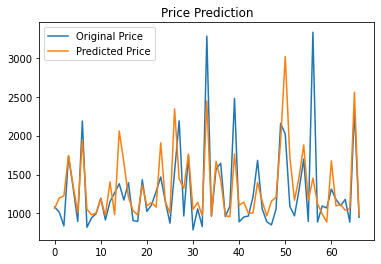

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 진행

In [ ]:
# VotingRegressor 해보기
er = VotingRegressor([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])
y_pred = er.fit(X_train, y_train).predict(X_test)
y_pred

array([1066.9666114 , 1182.79138529, 1233.90428953, 1833.90863682,
       1376.12844857,  985.86598212, 1990.28832674, 1049.72449814,
        977.10744082,  993.36451261, 1210.86349439,  978.61091946,
       1378.01927966,  975.52047355, 1975.15258533, 1742.48937938,
       1147.33101681, 1032.24802597,  984.02985335, 1353.49805008,
       1076.43714655, 1175.23445785, 1078.20290111, 1847.7554395 ,
       1143.47938526,  982.32599223, 1862.20907227, 1451.7844201 ,
       1168.04826279, 1734.83735101, 1047.63049188, 1151.69648004,
        970.0913288 , 2366.59954048,  969.39190611, 1623.5181425 ,
       1414.93565374,  961.78204333,  937.18802104, 1801.55412675,
       1109.96677334, 1165.80566075,  993.51378696, 1029.79588531,
       1404.51709935, 1165.37895672,  948.38774221, 1156.42014622,
       1251.36901293, 2056.79531477, 2628.19689686, 1610.28805522,
       1136.35984531, 1517.68061902, 1886.85776293, 1171.42457534,
       1452.28468012, 1083.26686697,  998.84565005,  860.62845

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('보팅 회귀 모델 최종 RMSE : ', rmse)

보팅 회귀 모델 최종 RMSE :  357.35135690628005


In [ ]:
# 보팅 모델 그래프
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, y_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 보팅 모델 Score 0.51
models = [er]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  VotingRegressor  ####
 5 교차 검증의 평균 RMSE : 351.889 
score :  0.825299316229352
K-fold CV scores : [0.47837768 0.51827637 0.53148301 0.51903423 0.51217564]
K-fold CV average score: 0.51


### StackingRegressor 진행

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
# 스태킹 해보기 (simple Version)
from sklearn.ensemble import StackingRegressor
estimators= ([('xgb_reg', xgb_reg), ('rf_reg', rf_reg), ('lgb_reg', lgb_reg), ('gb_reg', gb_reg)])

In [ ]:
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))

In [ ]:
reg_pred = reg.fit(X_train, y_train).predict(X_test)
reg_pred

array([ 998.76481455, 1122.96833744, 1216.43547619, 1790.27979263,
       1402.13810345,  910.92768712, 2195.05193919, 1468.03095238,
        878.39405216,  951.88719263, 1399.38347701,  876.4715844 ,
       1299.74936828,  984.82320259, 2929.69220033, 1944.73994528,
       1200.4257121 , 1049.40544015, 1032.67133363, 1165.18199405,
       1248.17204301, 1052.36404762, 1003.20635687, 1942.59887206,
        973.15293894,  914.1689165 , 2064.6268221 , 1311.01102165,
       1274.13895151, 1595.74989546, 1146.13860639,  974.48986175,
        980.88931289, 2341.07162197,  876.39375   , 1503.00592428,
       1488.68286252,  967.28858839,  875.61681078, 1616.8290937 ,
       1203.1974359 ,  934.91278802, 1008.13339807, 1022.3477761 ,
       1109.56919951, 1085.08541667,  957.66168981, 1466.39577573,
       1244.37532902, 2195.75047619, 2156.24237548, 1718.01543253,
       1461.86169355, 1276.88022753, 2103.47875205, 1122.62916667,
       1620.05640385, 1111.91383801,  979.99108974,  864.84611

In [ ]:
# cross_val_score로 확인하기 0.45
models = [reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  StackingRegressor  ####
 5 교차 검증의 평균 RMSE : 372.952 
score :  0.5807028664194899
K-fold CV scores : [0.2900055  0.46262005 0.53078314 0.53934512 0.40801775]
K-fold CV average score: 0.45


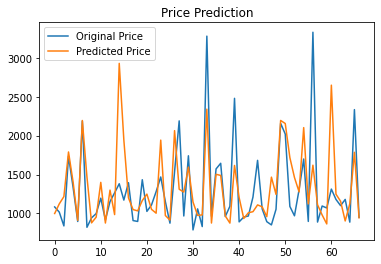

In [ ]:
# 스태킹 모델로 그래프 그리기
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, reg_pred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

In [ ]:
# 스태킹 kfold로 나눠서 해보기 0.44
rf_final = RandomForestRegressor(n_estimators=10, random_state=100)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, ' model 시작')
    
  for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
      #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
      print('\t 폴드 세트: ',folder_counter,' 시작 ')
      X_tr = X_train_n[train_index] 
      y_tr = y_train_n[train_index] 
      X_te = X_train_n[valid_index]  
      
      #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
      model.fit(X_tr , y_tr)       
      #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
      train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
      #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
      test_pred[:, folder_counter] = model.predict(X_test_n)
          
  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
  
  #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred , test_pred_mean

In [ ]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [ ]:
# CV스태킹 알고리즘 각 모델에 적용
xgb_reg_train, xgb_reg_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 3)
rf_reg_train, rf_reg_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 3)
lgb_reg_train, lgb_reg_test = get_stacking_base_datasets(lgb_reg, X_train_n, y_train_n, X_test_n,  3)    
gb_reg_train, gb_reg_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 3)

# CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
Stack_final_X_train = np.concatenate((xgb_reg_train, rf_reg_train, lgb_reg_train, gb_reg_train), axis=1)
Stack_final_X_test = np.concatenate((xgb_reg_test, rf_reg_test, lgb_reg_test, gb_reg_test), axis=1)

# 메타 모델 학습
rf_final.fit(Stack_final_X_train, y_train)
stack_final = rf_final.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, stack_final)
rmse = np.sqrt(rmse)
print('스태킹 회귀 모델의 최종 RMSE 값은 : ', rmse)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
RandomForestRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
LGBMRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
스태킹 회귀 모델의 최종 RMSE 값은 :  18.903739230805108


In [ ]:
models = [rf_final]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 374.464 
score :  0.9005503620172512
K-fold CV scores : [0.40641136 0.39355788 0.4725824  0.55558081 0.36052538]
K-fold CV average score: 0.44


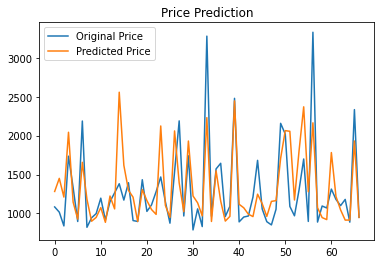

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, stack_final, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()

### VotingRegressor 미래 예측값 뽑아내기

In [ ]:
dataset2['예측가격'] = y_pred
dataset2['품종'] = '상추'
dataset2.to_excel('/content/상추_예측.xlsx', header=True, index=False)

### Feature_importance 값들 뽑아내기

In [ ]:
abc = []
for alg in er.named_estimators:
    clf = er.named_estimators[alg]
    a = clf.__class__.__name__
    b = [pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])]
    abc.append({a:b})

# VotingRegression cross_val_score와 가장 유사한 값을 가지는
# 개별 모델에 feature_importance 사용
abc